<a href="https://colab.research.google.com/github/bbberylll/ESAA_OB/blob/main/OB2_Project1_%ED%95%A9%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

random_seed = 42, test_size = 0.2, dataset: hotel

전처리: 현경 (~ 9/18)

LGBM: 윤주

CatBoost & SVM: 신우

Logistic: 재선

https://www.kaggle.com/datasets/ahsan81/hotel-reservations-classification-dataset

### **Data Dictionary**

- Booking_ID: unique identifier of each booking

- no_of_adults: Number of adults
- no_of_children: Number of Children
- no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
- no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
- type_of_meal_plan: Type of meal plan booked by the customer:
- required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
- room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by INN Hotels.
- lead_time: Number of days between the date of booking and the arrival date
- arrival_year: Year of arrival date
- arrival_month: Month of arrival date
- arrival_date: Date of the month
- market_segment_type: Market segment designation.
- repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
- no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
- no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
- avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
- no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
- **booking_status** (target): Flag indicating if the booking was canceled or not.

## **Import libraries and dataset**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')

## **EDA**

### **현경**

In [ ]:
hotel.shape

(36275, 19)

In [ ]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
hotel.tail()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled
36274,INN36275,2,0,1,2,Meal Plan 1,0,Room_Type 1,207,2018,12,30,Offline,0,0,0,161.67,0,Not_Canceled


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

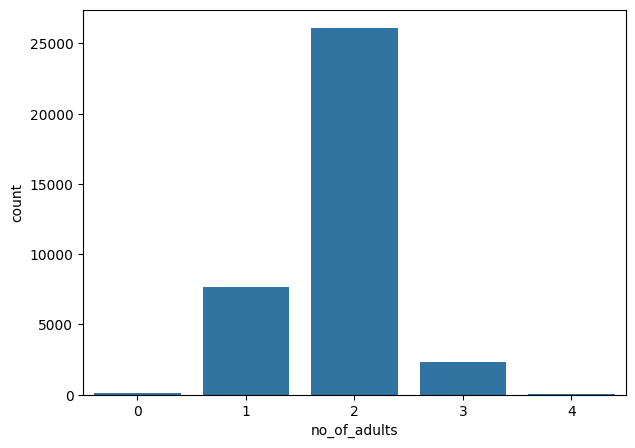

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_adults'])
plt.show()

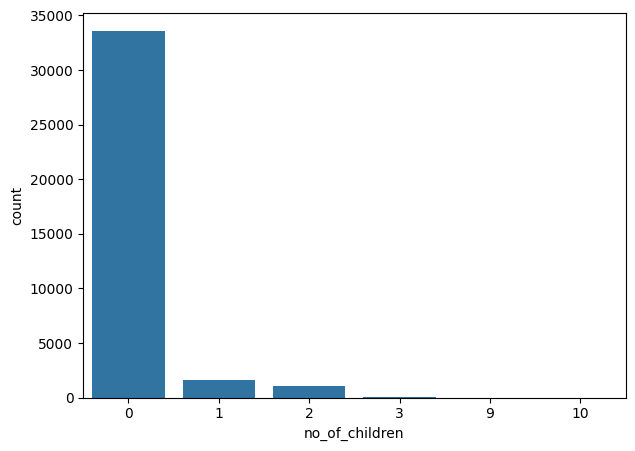

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_children'])
plt.show()

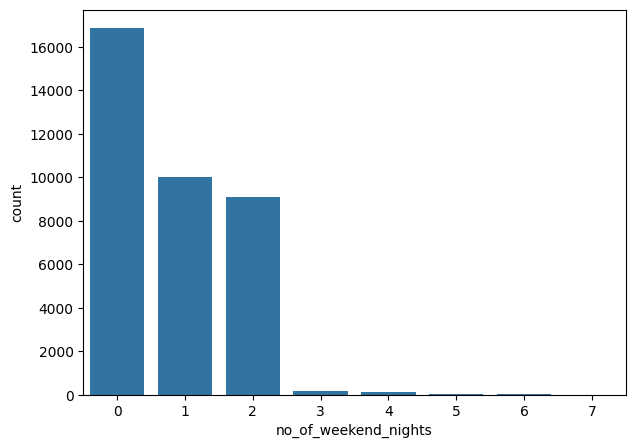

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_weekend_nights'])
plt.show()

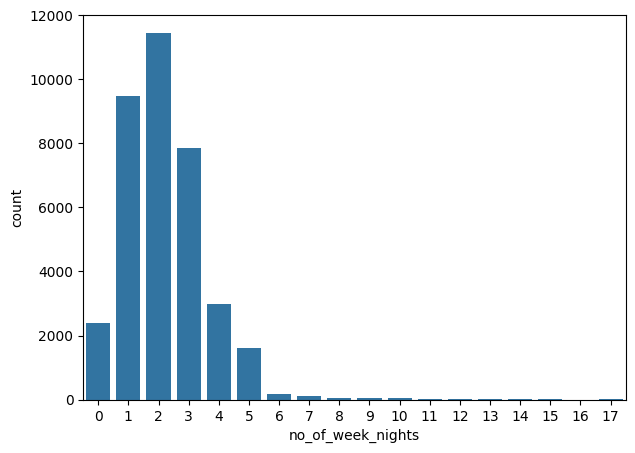

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_week_nights'])
plt.show()

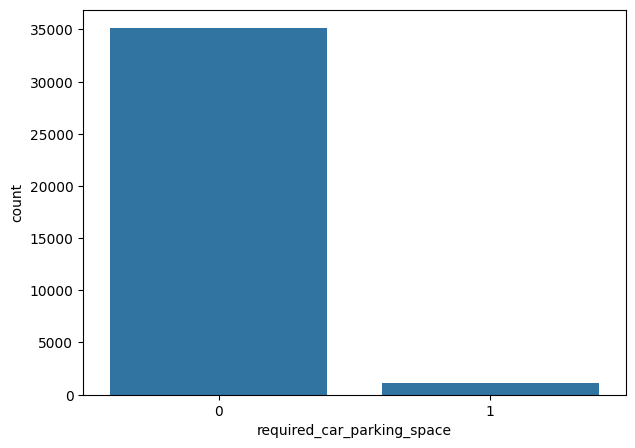

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['required_car_parking_space'])
plt.show()

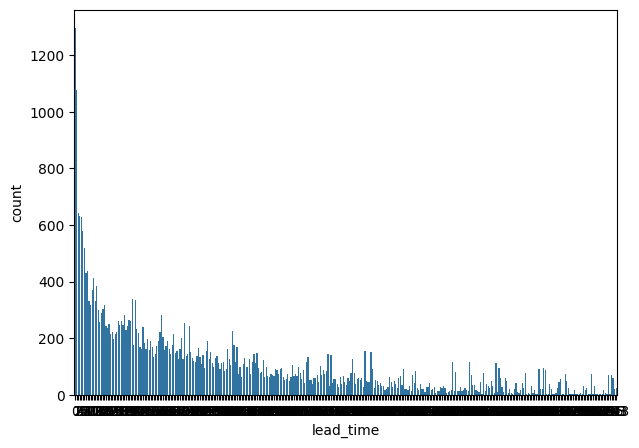

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['lead_time'])
plt.show()

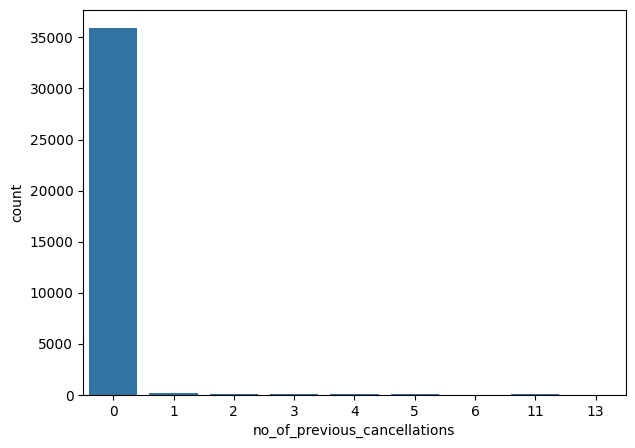

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_previous_cancellations'])
plt.show()

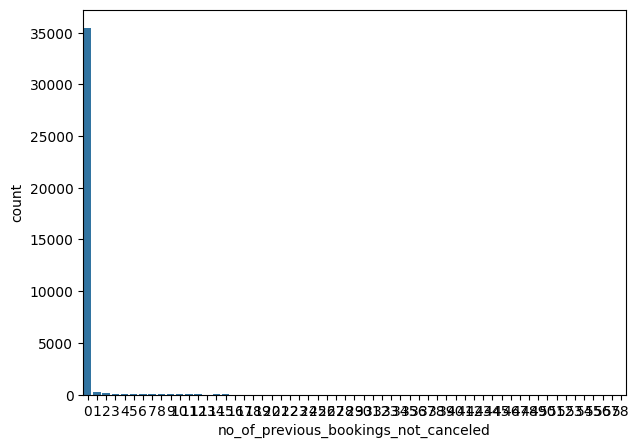

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_previous_bookings_not_canceled'])
plt.show()

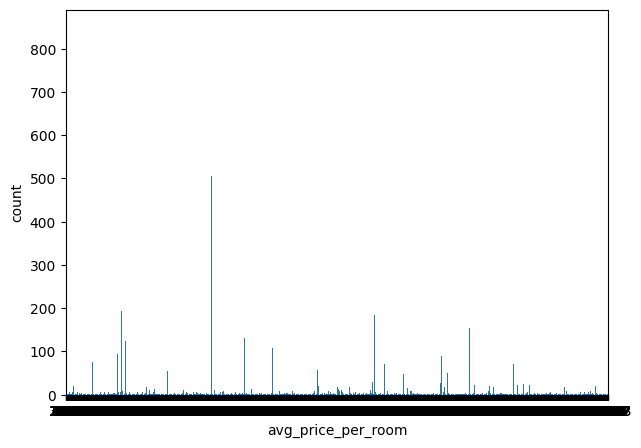

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['avg_price_per_room'])
plt.show()

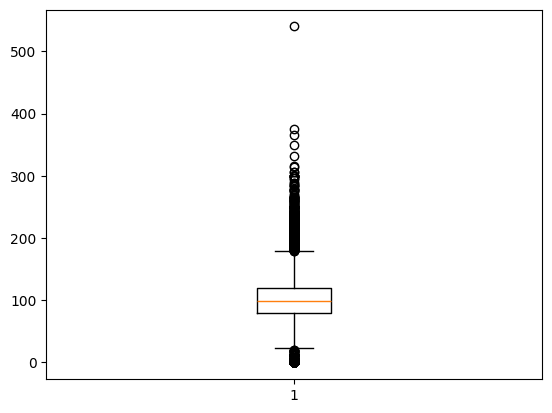

In [ ]:
plt.boxplot(x=hotel['avg_price_per_room'])
plt.show()

In [ ]:
hotel.loc[hotel['avg_price_per_room']>500,]

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
33114,INN33115,2,0,0,1,Meal Plan 1,0,Room_Type 1,35,2018,3,25,Offline,0,0,0,540.0,0,Canceled


위 값은 이상치인 거 같아서 제거해도 괜찮을 거 같아요

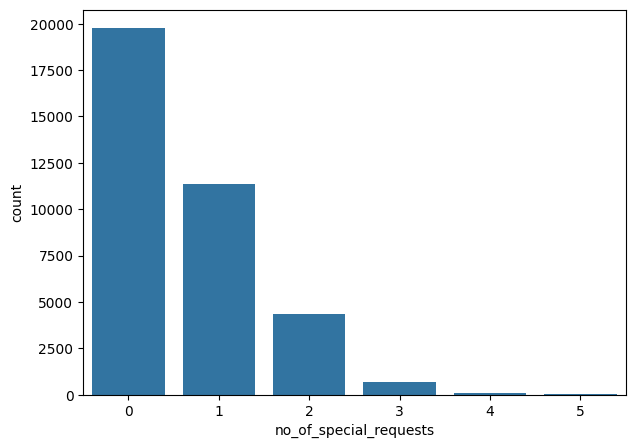

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['no_of_special_requests'])
plt.show()

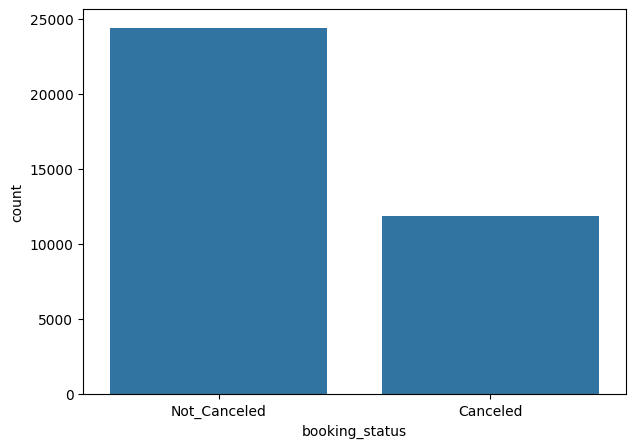

In [ ]:
plt.figure(figsize=(7,5))
sns.countplot(x=hotel['booking_status'])
plt.show()

In [ ]:
hotel['type_of_meal_plan'].value_counts()

,count
type_of_meal_plan,
Meal Plan 1,27835
Not Selected,5130
Meal Plan 2,3305
Meal Plan 3,5


In [ ]:
hotel['room_type_reserved'].value_counts()

,count
room_type_reserved,
Room_Type 1,28130
Room_Type 4,6057
Room_Type 6,966
Room_Type 2,692
Room_Type 5,265
Room_Type 7,158
Room_Type 3,7


In [ ]:
hotel['market_segment_type'].value_counts()

,count
market_segment_type,
Online,23214
Offline,10528
Corporate,2017
Complementary,391
Aviation,125


In [ ]:
hotel['repeated_guest'].value_counts()

,count
repeated_guest,
0,35345
1,930


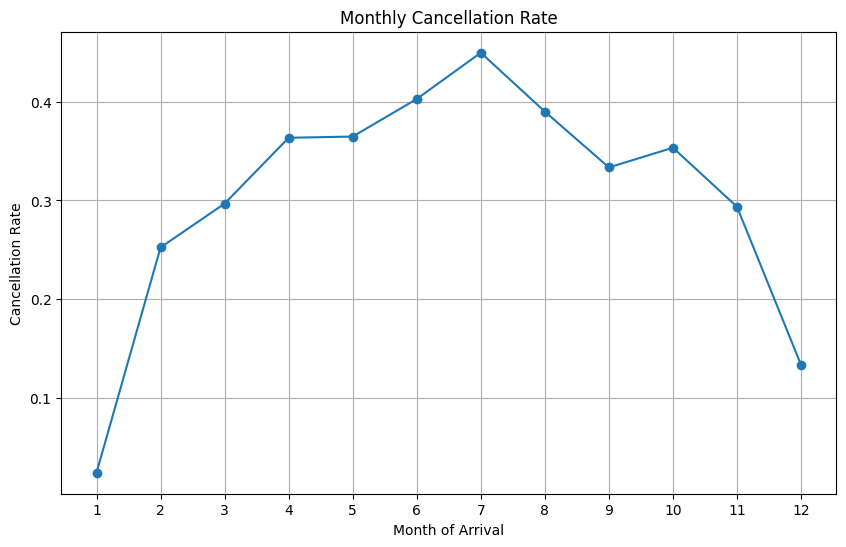

In [ ]:
cancel_rate = hotel.groupby('arrival_month')['booking_status'].apply(lambda x:(x=='Canceled').mean()).reset_index(name='cancel_rate')

plt.figure(figsize=(10,6))
plt.plot(cancel_rate['arrival_month'], cancel_rate['cancel_rate'], marker='o', linestyle="-")
plt.xticks(range(1,13))
plt.xlabel("Month of Arrival")
plt.ylabel("Cancellation Rate")
plt.title("Monthly Cancellation Rate")
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
plt.hist(data['arrival_year'])
plt.show()

#### 파생 변수 제안
1. 총 숙박일수 = no_of_weekend_nights + no_of_week_nights

2. 리드타임 그룹화 = lead_time을 구간화

3. 평균 1박당 가격 = avg_price_per_room / (총 숙박일수)

4. 동반 인원 수 = no_of_adults + no_of_children

5. 자녀 여부 = no_of_children > 0 여부 (이진 변수)

6. 취소 비율 = no_of_previous_cancellations / (no_of_previous_cancellations + no_of_previous_bookings_not_canceled + 1)
** 1은 0으로 나눌 수도 있으니까 더했어욤

7. 이전 예약 경험 여부 = (no_of_previous_cancellations + no_of_previous_bookings_not_canceled > 0)

8. 성수기 여부 = arrival_month → 여름휴가철7-8월, 연말 12월 등 더미 변수화
** 확실히 6~7월에 취소율이 최고를 찍는걸 보면 성수기 시기는 따로 파생 변수를 만들 필요성이 있어 보입니다!

9. 식사 플랜 여부 = type_of_meal_plan == "Not Selected" 여부

10. 객실 타입 그룹화 = room_type_reserved를 고급/일반 카테고리로 묶음.
--> 이걸 하면 좋을 거 같긴 한데,,,, type이 어떤 의미인지 정확한 자료가 안 나와서 일단은 아이디어만 가져와 봤어요!

### 모델별 특징
1. LGBM : 스케일링 필요 없고, 카테고리 변수 처리는 Label encoding만 진행, outlier에 강함

2. XGBoost : 스케일링 필요 없음, 이상치에 강함 + interaction term 굳이?

3. Logistic Regressin : 스케일링 필요함 + 다항식, 로그 변환, interaction term 추가하기

4. Linear Regression : 이상치에 약한 편 + 스케일링 필요함, 로그변환, 다항식, interaction term 추가할 필요 있음

### **윤주**

In [ ]:
hotel.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [ ]:
hotel.describe(include='all')

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
count,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275
unique,36275,NaN,NaN,NaN,NaN,4,NaN,7,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN,NaN,NaN,2
top,INN36275,NaN,NaN,NaN,NaN,Meal Plan 1,NaN,Room_Type 1,NaN,NaN,NaN,NaN,Online,NaN,NaN,NaN,NaN,NaN,Not_Canceled
freq,1,NaN,NaN,NaN,NaN,27835,NaN,28130,NaN,NaN,NaN,NaN,23214,NaN,NaN,NaN,NaN,NaN,24390
mean,NaN,1.844962,0.105279,0.810724,2.204300,NaN,0.030986,NaN,85.232557,2017.820427,7.423653,15.596995,NaN,0.025637,0.023349,0.153411,103.423539,0.619655,NaN
std,NaN,0.518715,0.402648,0.870644,1.410905,NaN,0.173281,NaN,85.930817,0.383836,3.069894,8.740447,NaN,0.158053,0.368331,1.754171,35.089424,0.786236,NaN
min,NaN,0.000000,0.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000,2017.000000,1.000000,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.000000,0.000000,0.000000,1.000000,NaN,0.000000,NaN,17.000000,2018.000000,5.000000,8.000000,NaN,0.000000,0.000000,0.000000,80.300000,0.000000,NaN
50%,NaN,2.000000,0.000000,1.000000,2.000000,NaN,0.000000,NaN,57.000000,2018.000000,8.000000,16.000000,NaN,0.000000,0.000000,0.000000,99.450000,0.000000,NaN
75%,NaN,2.000000,0.000000,2.000000,3.000000,NaN,0.000000,NaN,126.000000,2018.000000,10.000000,23.000000,NaN,0.000000,0.000000,0.000000,120.000000,1.000000,NaN


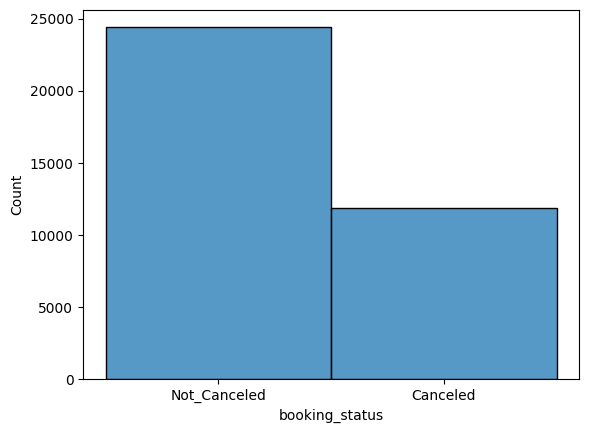

In [ ]:
sns.histplot(hotel['booking_status'])
plt.show()      ## imbalanced

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/Hotel_Reservations.csv')

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

**수치형 변수**

In [ ]:
numeric_cols = ['no_of_adults', 'no_of_children',
                'no_of_weekend_nights', 'no_of_week_nights',
                'required_car_parking_space', 'lead_time',
                'arrival_year','arrival_month','arrival_date',
                'repeated_guest', 'no_of_previous_cancellations',
                'no_of_previous_bookings_not_canceled', 'avg_price_per_room',
                'no_of_special_requests']

categorical_cols = ['type_of_meal_plan', 'room_type_reserved',
                    'market_segment_type', 'booking_status']

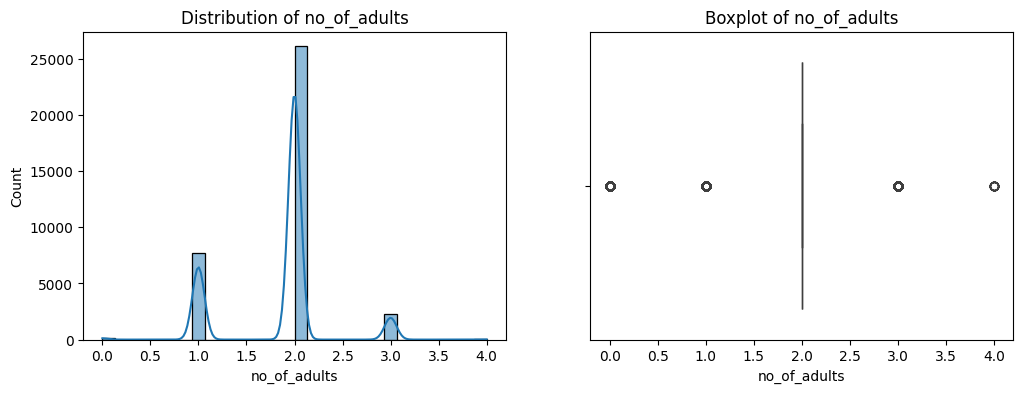

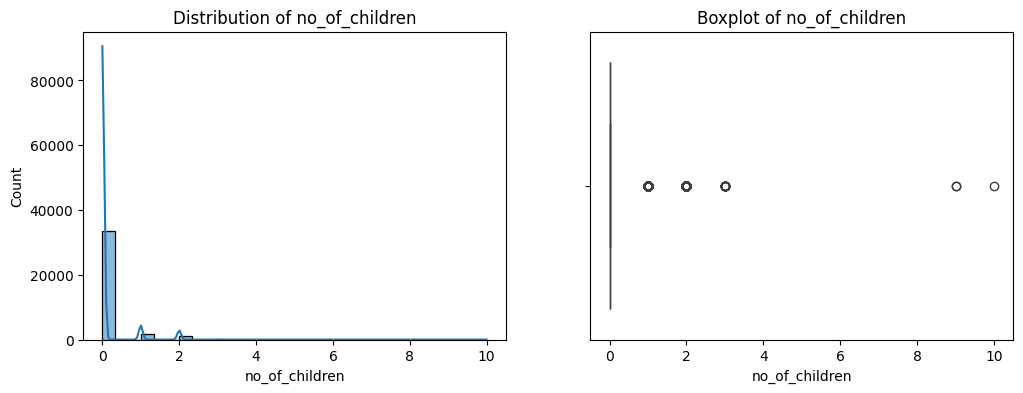

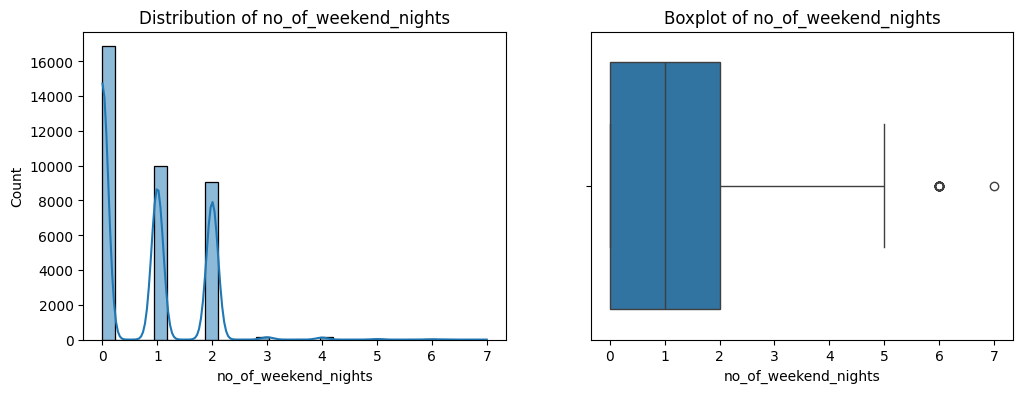

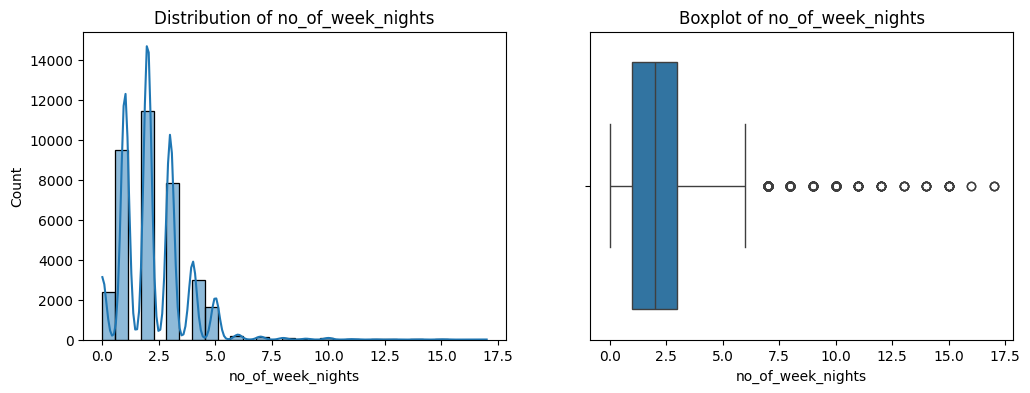

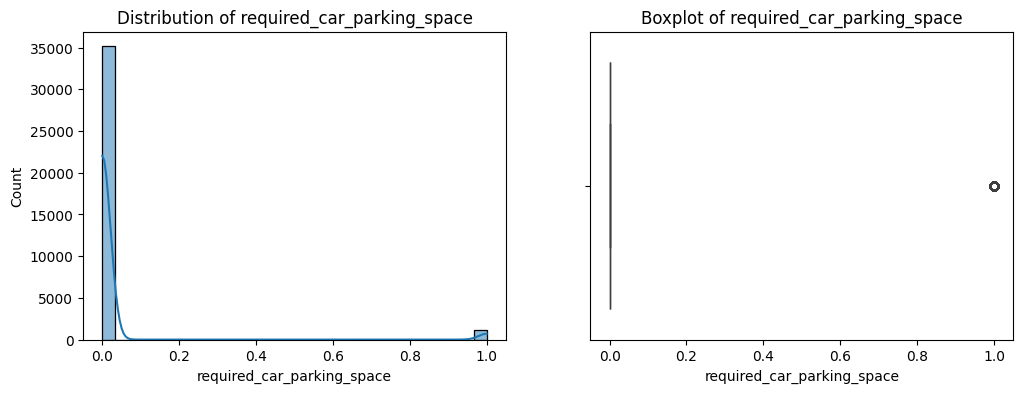

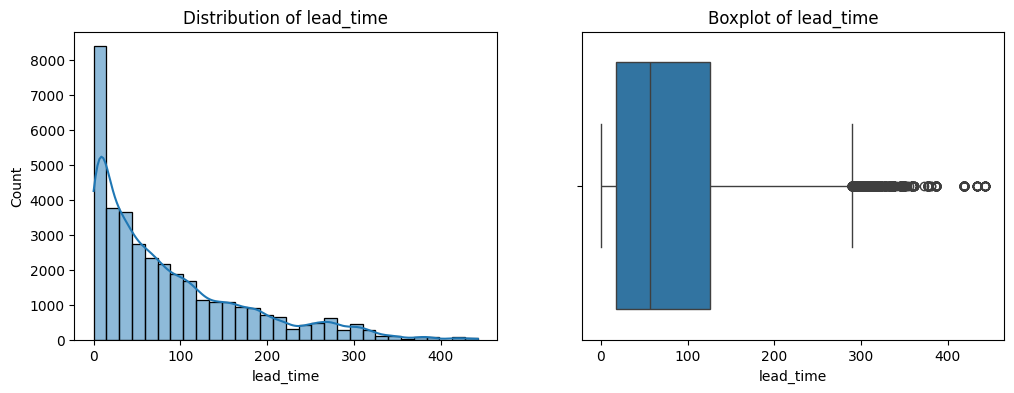

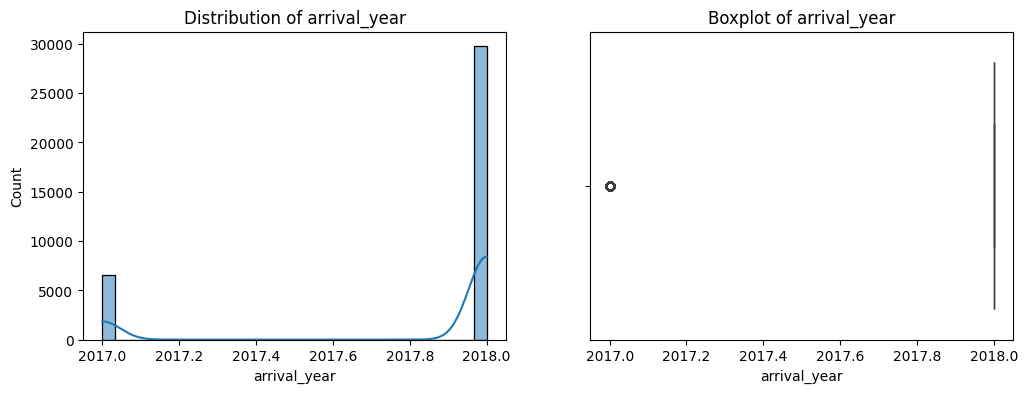

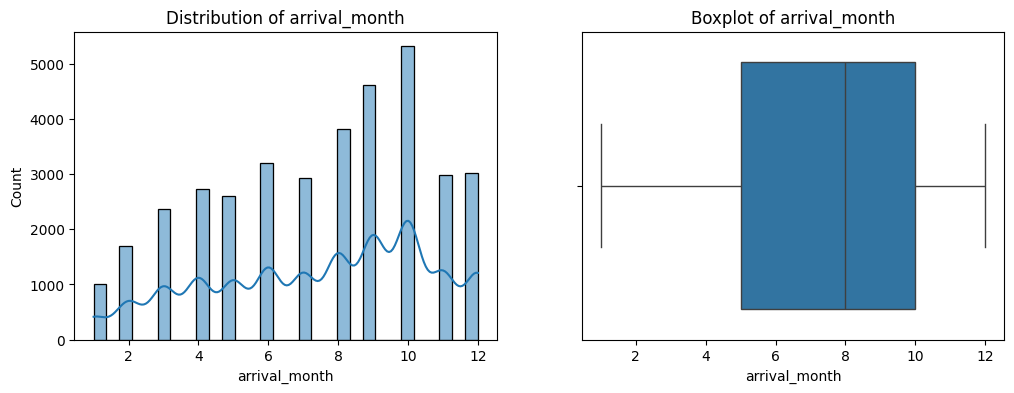

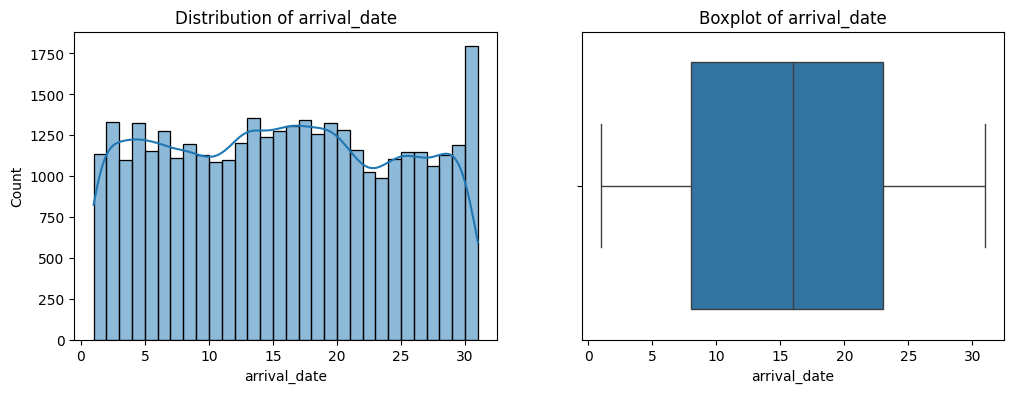

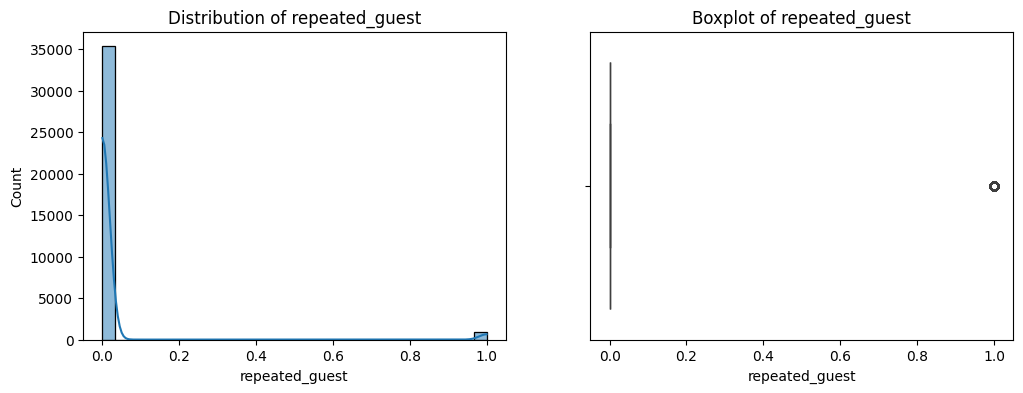

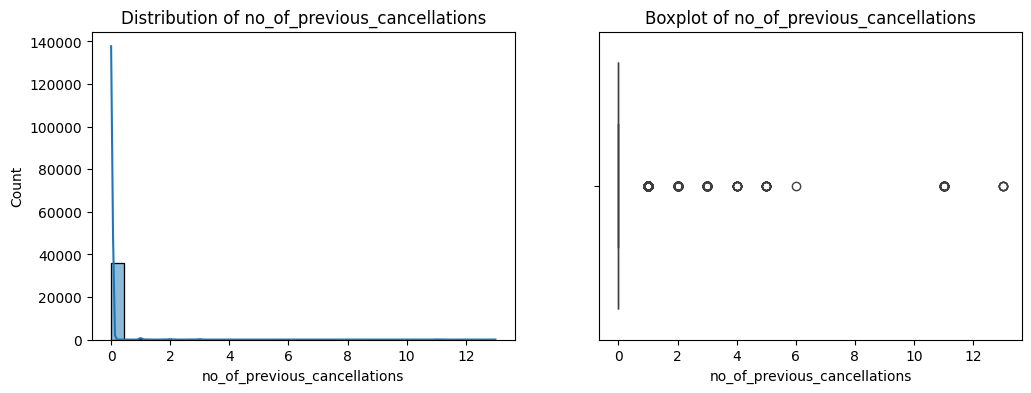

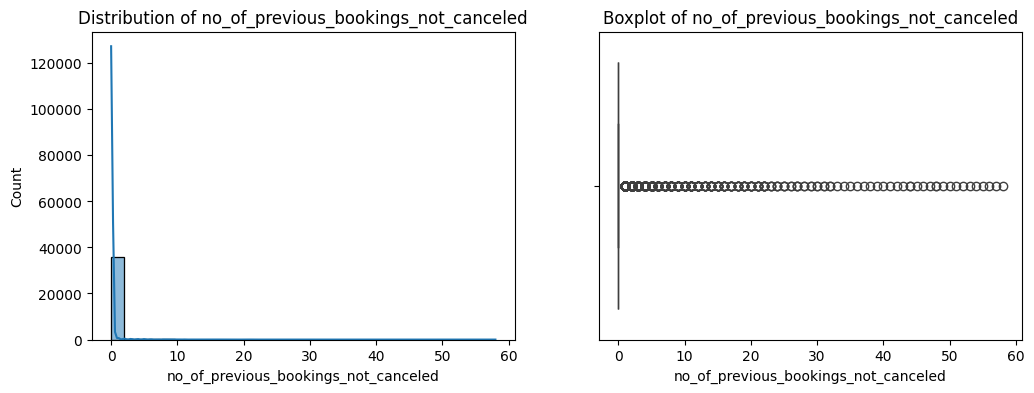

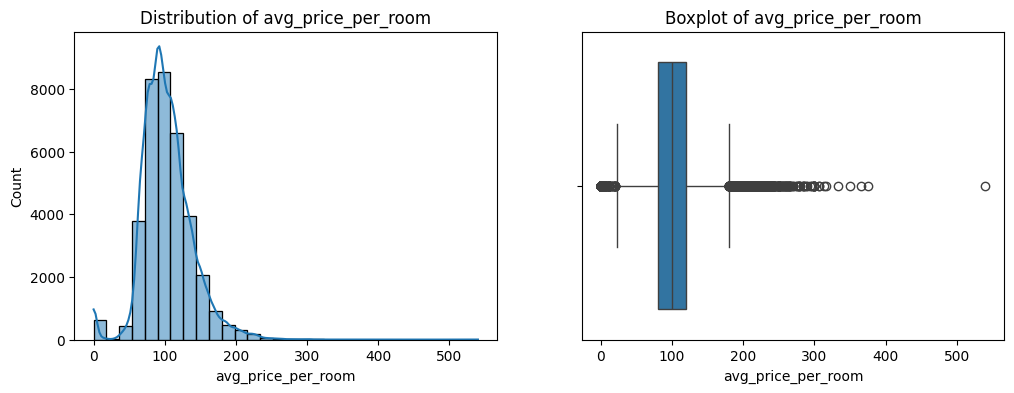

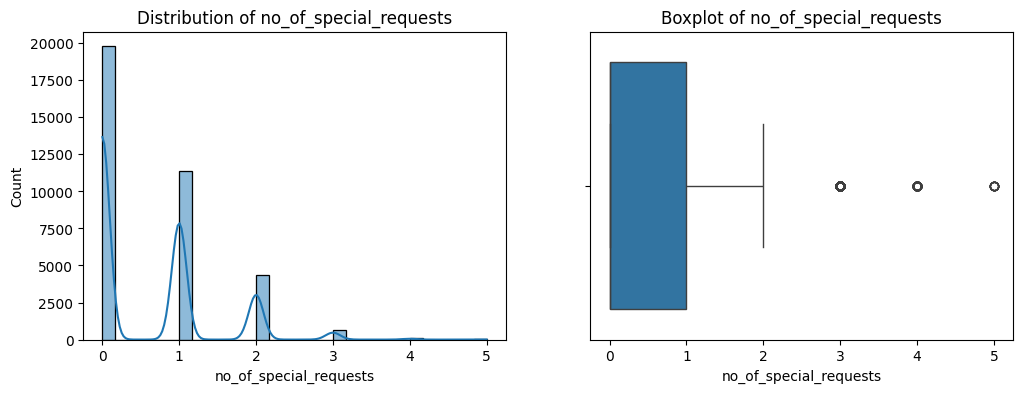

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(12,4))

    plt.subplot(1,2,1)
    sns.histplot(hotel[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")

    plt.subplot(1,2,2)
    sns.boxplot(x=hotel[col])
    plt.title(f"Boxplot of {col}")

    plt.show()

**범주형 변수**

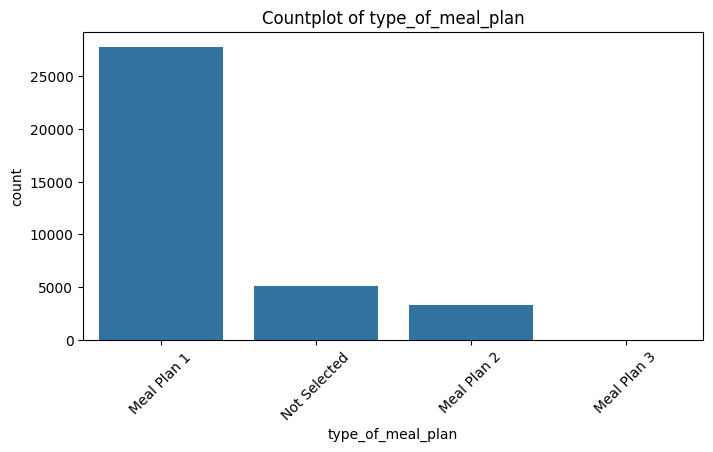

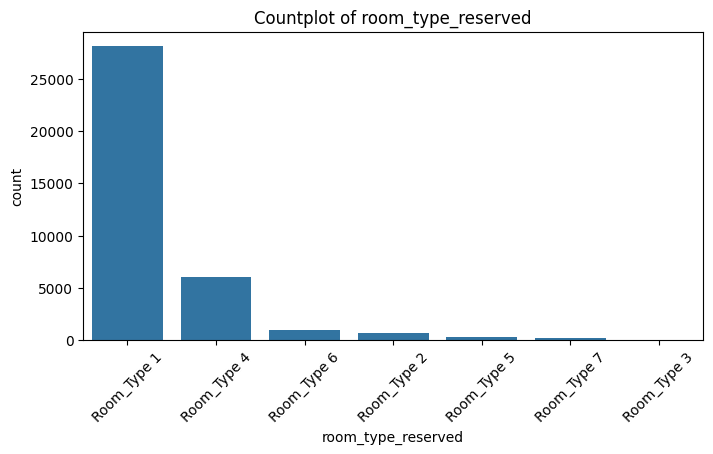

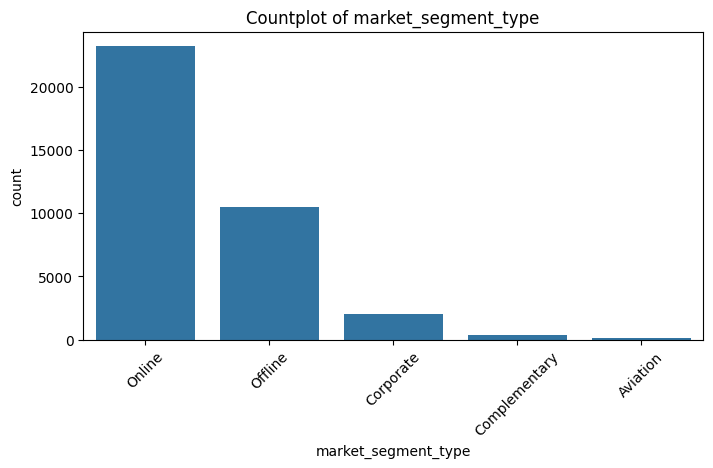

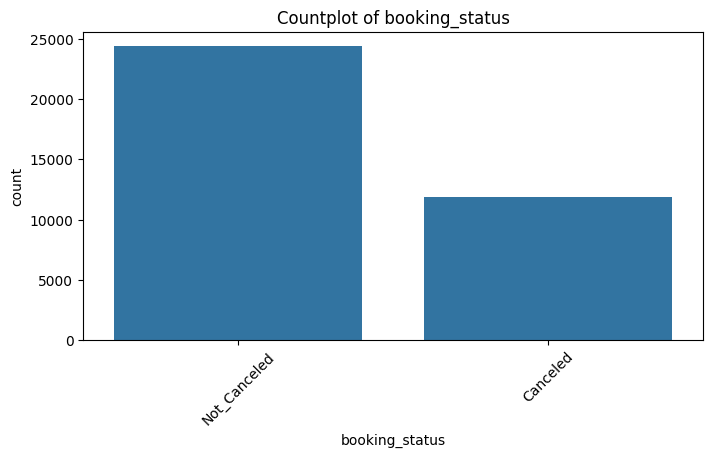

In [ ]:
for col in categorical_cols:
    plt.figure(figsize=(8,4))
    sns.countplot(data=hotel, x=col, order=hotel[col].value_counts().index)
    plt.title(f"Countplot of {col}")
    plt.xticks(rotation=45)
    plt.show()

In [ ]:
!pip install dython

/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/dython/nominal.py:176: RuntimeWarning: Unable to calculate Cramer's V using bias correction. Consider using bias_correction=False (or cramers_v_bias_correction=False if calling from associations)
  war

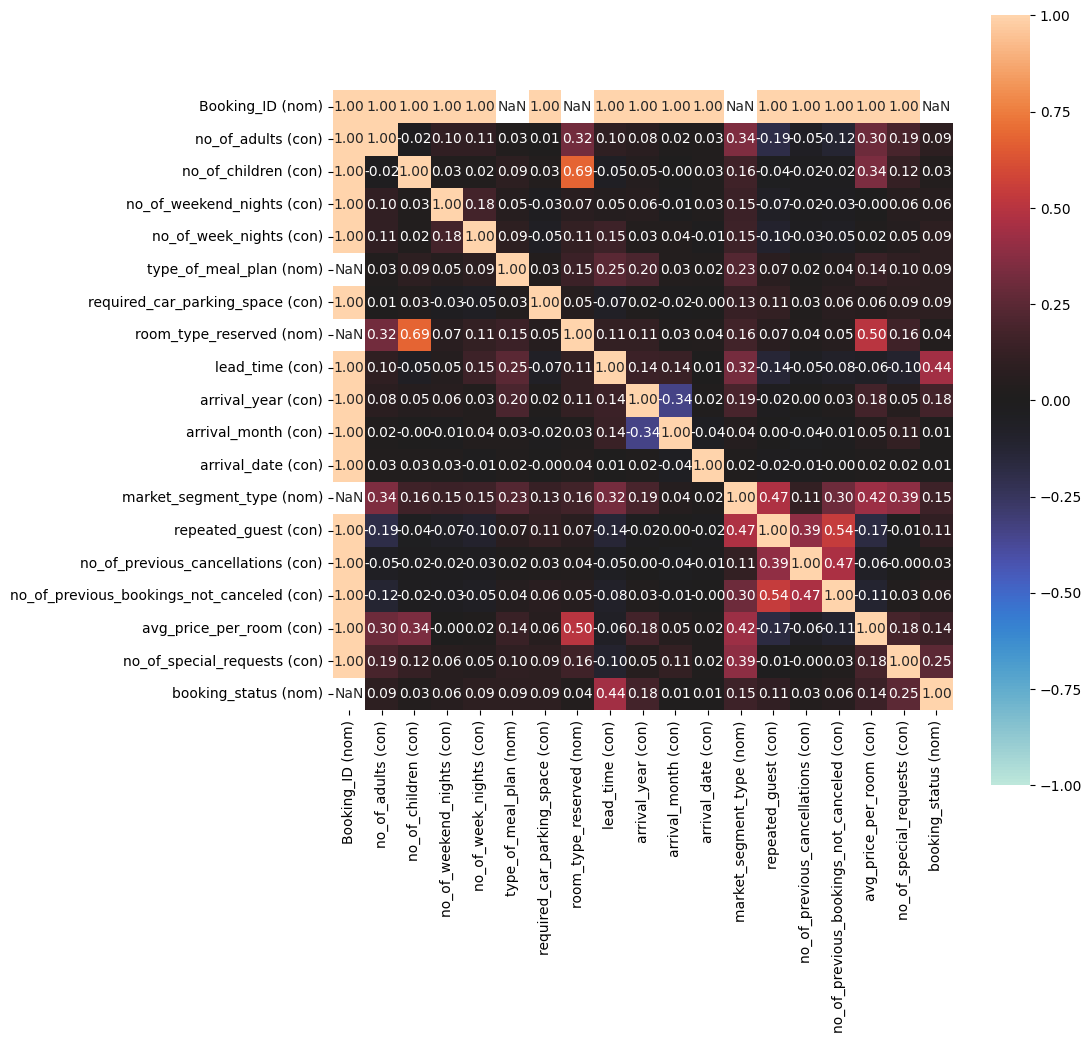

In [ ]:
from dython.nominal import associations

corr = associations(hotel, nominal_columns='auto', figsize=(10,10), mark_columns=True)

**datetime**

In [ ]:
hotel['arrival_datetime'] = pd.to_datetime(
    dict(
        year=hotel['arrival_year'],
        month=hotel['arrival_month'],
        day=hotel['arrival_date']
    ),
    errors='coerce'   # 잘못된 날짜는 NaT로 처리
)


In [ ]:
print(hotel[hotel['arrival_datetime'].isna()][['arrival_year','arrival_month','arrival_date']])


       arrival_year  arrival_month  arrival_date
2626           2018              2            29
3677           2018              2            29
5600           2018              2            29
6343           2018              2            29
7648           2018              2            29
8000           2018              2            29
8989           2018              2            29
9153           2018              2            29
9245           2018              2            29
9664           2018              2            29
9934           2018              2            29
10593          2018              2            29
10652          2018              2            29
10747          2018              2            29
11881          2018              2            29
13958          2018              2            29
14304          2018              2            29
15363          2018              2            29
15438          2018              2            29
17202          2018 

=> 삭제

In [ ]:
for col in numeric_cols:
    print(hotel[hotel[col] < 0])

Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status, arrival_datetime]
Index: []
Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space, room_type_reserved, lead_time, arrival_year, arrival_month, arrival_date, market_segment_type, repeated_guest, no_of_previous_cancellations, no_of_previous_bookings_not_canceled, avg_price_per_room, no_of_special_requests, booking_status, arrival_datetime]
Index: []
Empty DataFrame
Columns: [Booking_ID, no_of_adults, no_of_children, no_of_weekend_nights, no_of_week_nights, type_of_meal_plan, required_car_parking_space

**파생변수 추가**

In [ ]:
## 총 숙박일
hotel['total_nights'] = hotel['no_of_week_nights'] + hotel['no_of_weekend_nights']
hotel['total_nights']

,total_nights
0,3
1,5
2,3
3,2
4,2
...,...
36270,8
36271,4
36272,8
36273,3


In [ ]:
hotel['no_of_guests'] = hotel['no_of_adults'] + hotel['no_of_children']
hotel['no_of_guests']

,no_of_guests
0,2
1,2
2,1
3,2
4,2
...,...
36270,3
36271,2
36272,2
36273,2


no_of_guests => 0 삭제

In [ ]:
## 재방문 여부
hotel['is_repeated_guest'] = hotel['repeated_guest'].apply(lambda x: 1 if x == 1 else 0)
hotel['is_repeated_guest']

,is_repeated_guest
0,0
1,0
2,0
3,0
4,0
...,...
36270,0
36271,0
36272,0
36273,0


In [ ]:
## 평균 숙박비
hotel['price_per_person'] = hotel['avg_price_per_room'] / hotel['no_of_guests'].replace(0, np.nan)
hotel['price_per_person']

,price_per_person
0,32.500000
1,53.340000
2,60.000000
3,50.000000
4,47.250000
...,...
36270,55.933333
36271,45.475000
36272,49.195000
36273,47.250000


In [ ]:
## 성수기(7,8,12,1) 유무
hotel['is_peak_season'] = hotel['arrival_datetime'].dt.month.isin([7, 8, 12, 1]).astype(int)
hotel['is_peak_season']

,is_peak_season
0,0
1,0
2,0
3,0
4,0
...,...
36270,1
36271,0
36272,1
36273,0


knn 이용

In [ ]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

In [ ]:
features = hotel[['lead_time', 'total_nights', 'no_of_guests']]

no_of_children => 어린아이 유무?? 로 바꾸는 건 어떨지?

**원-핫 인코딩**

**라벨 인코딩**

**SMOTE**
- 타깃 불균형 해소

### **재선**

#### **1. 변수 간의 관계**

/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 44228 (\N{HANGUL SYLLABLE GYE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1700244868.py:28: UserWarning: Glyph 52824 (\N{HANGUL SYLLABLE CI}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/

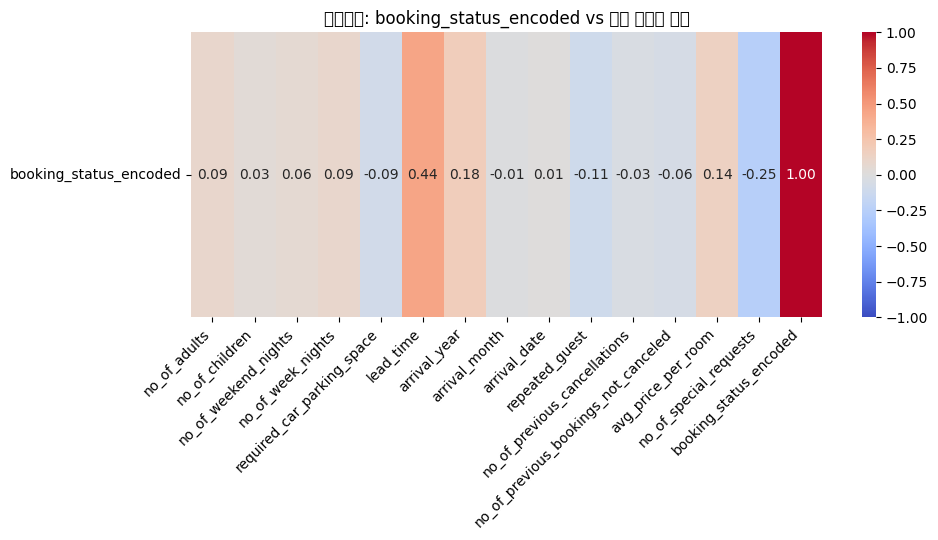

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# booking_status 문자열 ("Not_Canceled"/"Canceled") → 0/1 인코딩
hotel['booking_status_encoded'] = hotel['booking_status'].map({'Not_Canceled': 0, 'Canceled': 1})

# 수치형 변수들만 선택
numeric_hotel = hotel.select_dtypes(include=['int64', 'float64', 'float32', 'float'])

# booking_status_encoded이 numeric_hotel에 들어있지 않으면 추가
if 'booking_status_encoded' not in numeric_hotel.columns:
    numeric_hotel['booking_status_encoded'] = hotel['booking_status_encoded']

# 상관행렬 계산
corr_matrix = numeric_hotel.corr()

# 취소 여부 행만 뽑기: booking_status_encoded와의 상관관계
cancel_corr = corr_matrix.loc[['booking_status_encoded']]  # 1×n 행렬

# 시각화: heatmap으로
plt.figure(figsize=(10, 1 + len(cancel_corr.columns)*0.3))  # 가로로 길게
sns.heatmap(cancel_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar=True, fmt=".2f")

plt.title("상관계수: booking_status_encoded vs 기타 수치형 변수")
plt.yticks(rotation=0)  # y축 라벨이 잘 보이게
plt.xticks(rotation=45, ha='right')  # x축 변수 이름 회전
plt.tight_layout()
plt.show()

#### **1-1. lead_time vs booking_status_encoded**

/tmp/ipython-input-4088084082.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='booking_status_encoded', y='lead_time', data=hotel, palette='Set2')


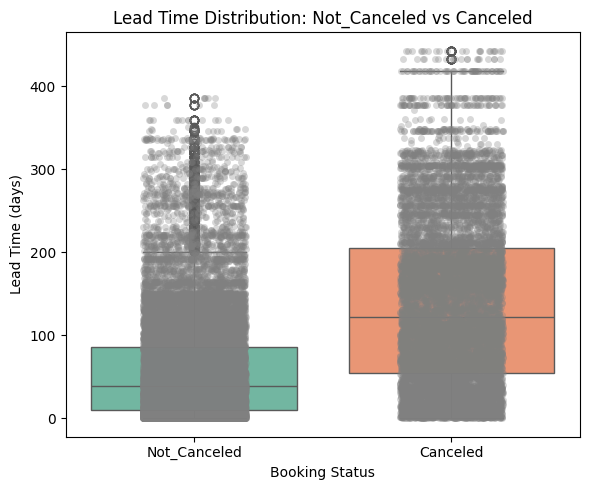

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))

# 박스플롯: 취소 여부별 lead_time 분포
sns.boxplot(x='booking_status_encoded', y='lead_time', data=hotel, palette='Set2')
plt.xticks([0, 1], ['Not_Canceled', 'Canceled'])
plt.title('Lead Time Distribution: Not_Canceled vs Canceled')
plt.xlabel('Booking Status')
plt.ylabel('Lead Time (days)')

# 원하는 경우 개별 데이터 점도 표시
sns.stripplot(x='booking_status_encoded', y='lead_time', data=hotel, color='gray', alpha=0.3, jitter=0.2)

plt.tight_layout()
plt.show()

In [ ]:
# 그룹별 lead_time 통계량 계산 (0: Not_Canceled, 1: Canceled)
lead_time_stats = hotel.groupby('booking_status_encoded')['lead_time'].agg(['count', 'mean', 'median', 'min', 'max'])

print(lead_time_stats)

                        count        mean  median  min  max
booking_status_encoded                                     
0                       24390   58.927224    39.0    0  386
1                       11885  139.215482   122.0    0  443


평균과 중앙값을 보면 Canceled(1)의 lead_time이 두 배 이상 높다.

lead_time이 높을수록 (실제 숙박일보다 미리 예약할수록) 취소할 확률이 높다.

#### **1-2. no_of_weekend_nights (+ no_of_week_nights) vs booking_status_encoded**

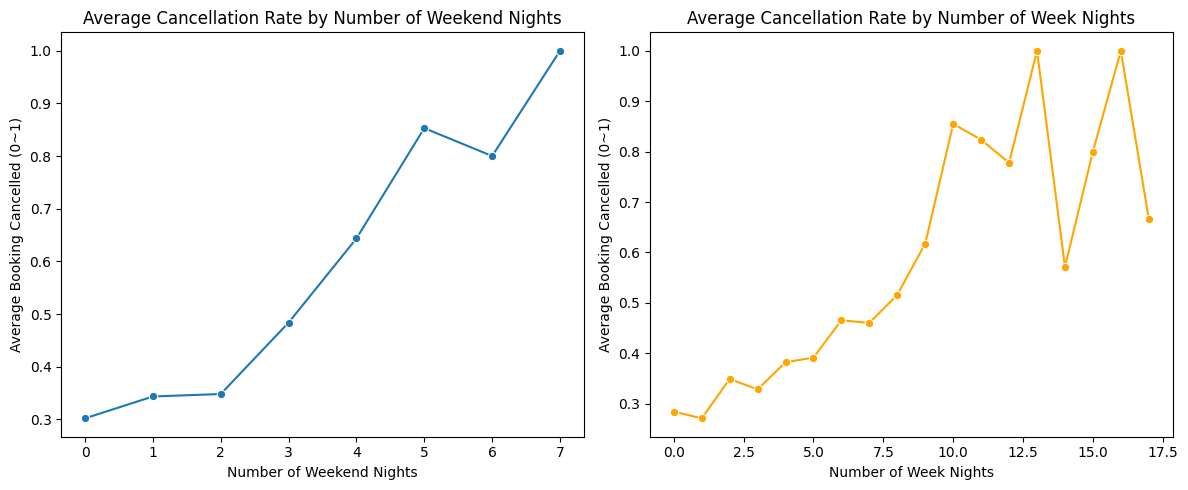

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 5))

# 주말 숙박일 수 vs 취소율
plt.subplot(1, 2, 1)
sns.lineplot(x=weekend_stats.index, y=weekend_stats.values, marker='o')
plt.title('Average Cancellation Rate by Number of Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Average Booking Cancelled (0~1)')

# 주중 숙박일 수 vs 취소율
plt.subplot(1, 2, 2)
sns.lineplot(x=week_stats.index, y=week_stats.values, marker='o', color='orange')
plt.title('Average Cancellation Rate by Number of Week Nights')
plt.xlabel('Number of Week Nights')
plt.ylabel('Average Booking Cancelled (0~1)')

plt.tight_layout()
plt.show()

주말, 주중 모두 숙박일이 증가할수록 취소율도 증가한다.

주말은 6에서, 주중은 13~14 쯤에서 취소율이 떨어지기도 한다.

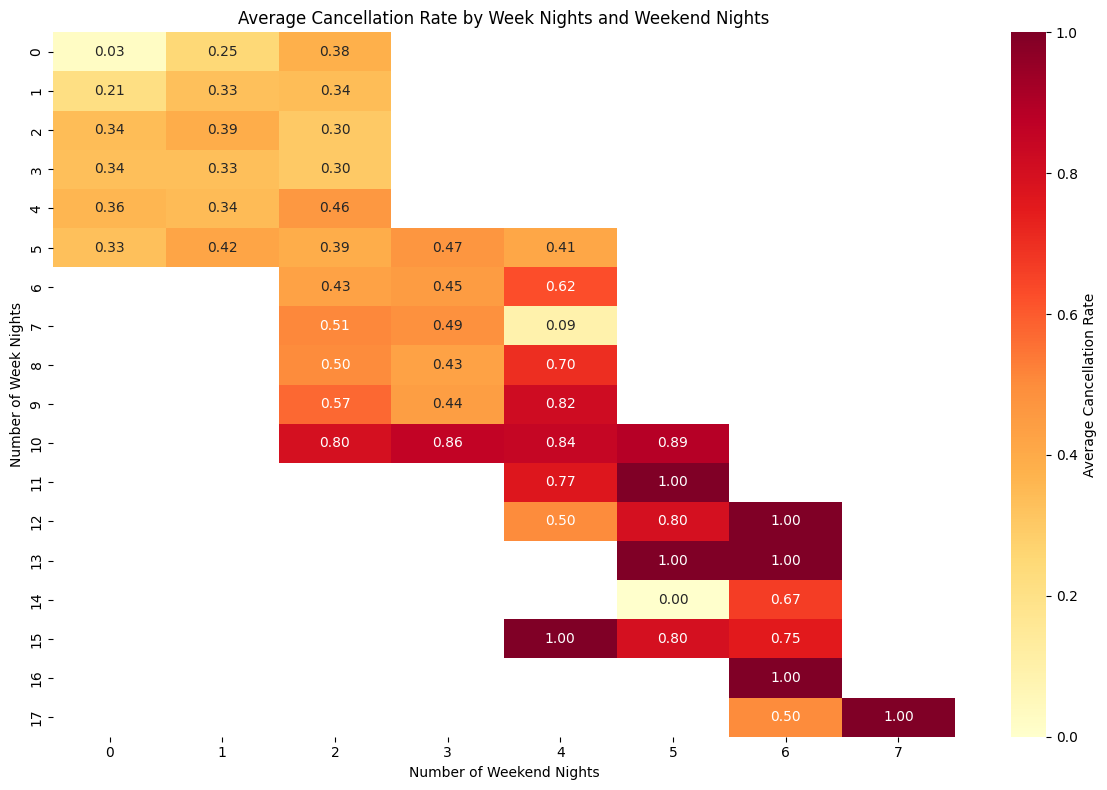

In [ ]:
# 주중, 주말 숙박일 수별 평균 취소율 계산
heatmap_data = hotel.groupby(['no_of_week_nights', 'no_of_weekend_nights'])['booking_status_encoded'].mean().unstack()

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".2f", cmap='YlOrRd', cbar_kws={'label': 'Average Cancellation Rate'})
plt.title('Average Cancellation Rate by Week Nights and Weekend Nights')
plt.xlabel('Number of Weekend Nights')
plt.ylabel('Number of Week Nights')
plt.tight_layout()
plt.show()

우측 하단으로 갈수록 상관관계가 높은 경향이 있다.

주중, 주말 모두 숙박일이 늘어날수록 취소도 많이 하는 경향이 있다.

#### **1-3. market_segment_type vs booking_status_encoded**

In [ ]:
market_counts = hotel['market_segment_type'].value_counts()
print(market_counts)

market_segment_type
Online           23214
Offline          10528
Corporate         2017
Complementary      391
Aviation           125
Name: count, dtype: int64


market_segment_type 인코딩 x

/tmp/ipython-input-1207284316.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x=segment_cancellation.index, y=segment_cancellation.values, palette='Set2')


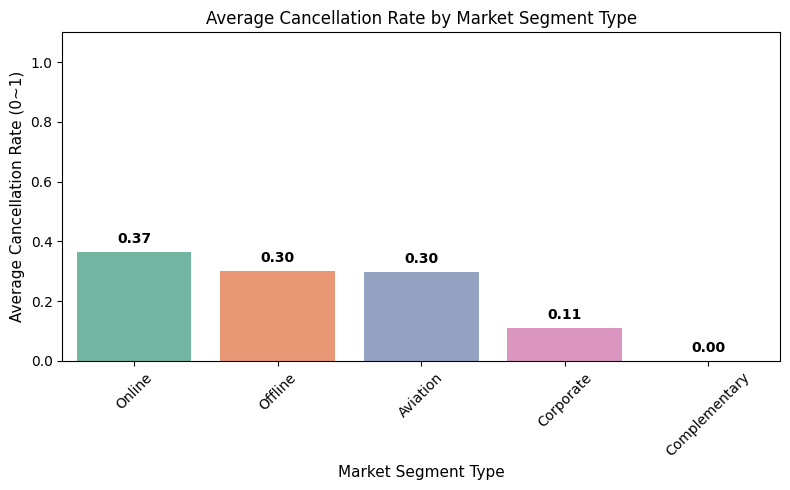

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# market_segment_type별 평균 취소율 계산
segment_cancellation = hotel.groupby('market_segment_type')['booking_status_encoded'].mean().sort_values(ascending=False)

plt.figure(figsize=(8,5))
barplot = sns.barplot(x=segment_cancellation.index, y=segment_cancellation.values, palette='Set2')

# 각 막대 위에 취소율 표시
for i, value in enumerate(segment_cancellation.values):
    barplot.text(i, value + 0.02, f'{value:.2f}', ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Average Cancellation Rate by Market Segment Type', fontsize=12)
plt.xlabel('Market Segment Type', fontsize=11)
plt.ylabel('Average Cancellation Rate (0~1)', fontsize=11)
plt.ylim(0, 1.1)  # 텍스트 표시 공간 확보
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Online > Offline = Aviation >>> Corporate >> Complementary** 순으로 취소율이 높다.

- Aviation -> 항공사 연계 예약 (직원 할인, 마일리지) -> 특정 조건으로 취소율이 낮거나 일정이 안정적인 경우가 많음

- Corporate -> 기업, 출장, 회의 등 -> 예약 취소율이 낮고, 장기 투숙 가능성이 높음

- Complementary -> 무료 제공 예약 (프로모션, 보상 차원에서 제공) -> 취소율과 패턴이 일반 예약과 다를 수 있음

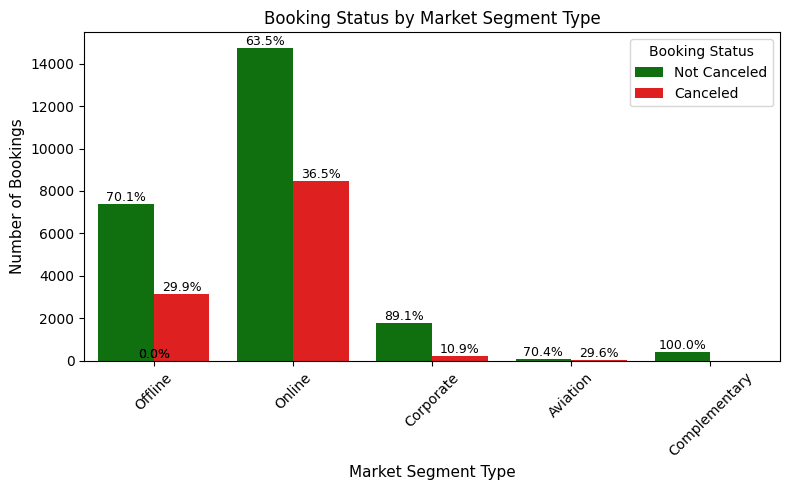

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))

# countplot
barplot = sns.countplot(x='market_segment_type', hue='booking_status_encoded', data=hotel, palette=['green', 'red'])

# 범주별 전체 개수 계산
total_counts = hotel.groupby('market_segment_type')['booking_status_encoded'].count()

# 각 막대 위에 비율 표시
for p in barplot.patches:
    height = p.get_height()
    x = p.get_x() + p.get_width() / 2
    # 전체 개수 가져오기
    total = total_counts[p.get_xdata()[0]] if hasattr(p, 'get_xdata') else None
    # 비율 계산
    segment = p.get_x() + p.get_width() / 2
    # 각 막대가 어떤 카테고리인지 index로 계산
    category_idx = int(p.get_x() + 0.5)  # 대략적인 위치
    category = barplot.get_xticklabels()[category_idx].get_text()
    total = total_counts[category]
    percent = height / total * 100
    barplot.text(x, height + 3, f'{percent:.1f}%', ha='center', va='bottom', fontsize=9)

plt.title('Booking Status by Market Segment Type', fontsize=12)
plt.xlabel('Market Segment Type', fontsize=11)
plt.ylabel('Number of Bookings', fontsize=11)
plt.legend(title='Booking Status', labels=['Not Canceled', 'Canceled'])
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

market_segment_type 인코딩 o

In [ ]:
# One-Hot Encoding
market_encoded = pd.get_dummies(hotel['market_segment_type'], prefix='segment')

# 기존 데이터프레임에 합치기
hotel_encoded = pd.concat([hotel, market_encoded], axis=1)

# 확인
hotel_encoded.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,...,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status,booking_status_encoded,segment_Aviation,segment_Complementary,segment_Corporate,segment_Offline,segment_Online
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,...,0,65.00,0,Not_Canceled,0,False,False,False,True,False
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,...,0,106.68,1,Not_Canceled,0,False,False,False,False,True
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,...,0,60.00,0,Canceled,1,False,False,False,False,True
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,...,0,100.00,0,Canceled,1,False,False,False,False,True
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,...,0,94.50,0,Canceled,1,False,False,False,False,True


In [ ]:
# 인코딩한 세그먼트 컬럼만 선택
segment_cols = market_encoded.columns

# booking_status_encoded와의 상관관계 계산
correlations = hotel_encoded[segment_cols.tolist() + ['booking_status_encoded']].corr()['booking_status_encoded'][segment_cols]
print(correlations.sort_values(ascending=False))

segment_Online           0.106362
segment_Aviation        -0.003964
segment_Offline         -0.038351
segment_Complementary   -0.072867
segment_Corporate       -0.112993
Name: booking_status_encoded, dtype: float64


양수 -> 해당 segment일수록 취소 가능성 높음

음수 -> 해당 segment일수록 취소 가능성 낮음

아주 근소한 차이지만 encoding 전후랑 결과는 같다.

#### **1-4. room_type_reserved vs booking_status_encoded**

In [ ]:
room_counts = hotel['room_type_reserved'].value_counts()
print(room_counts)

room_type_reserved
Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: count, dtype: int64


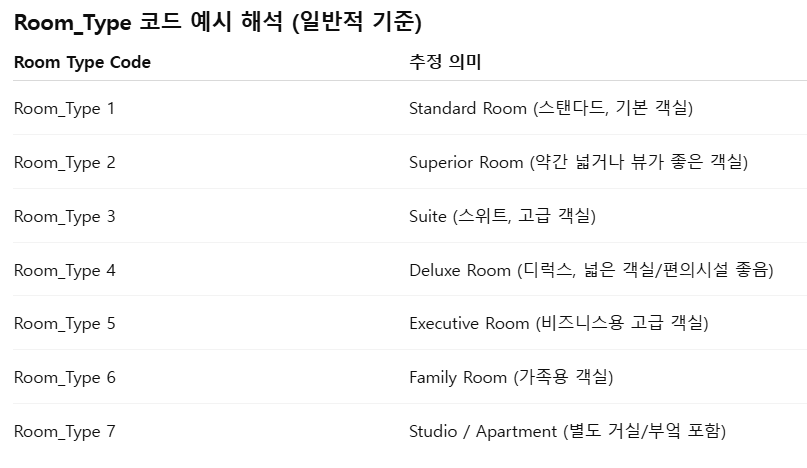

- room_type 1이 가장 많음 -> 스탠다드 객실일 가능성 높음

- room_type 3은 7개로 가장 적음 -> 스위트룸

- room_type 1 (스탠다드) > room_type 4 (디럭스) > room_type 6 (가족용) > room_type 2 (슈페리어) > room_type 5 (비즈니스) > room_type 7 (스튜디오) > room_type 3 (스위트)

In [ ]:
# Room Type별 예약 수와 취소 수
room_stats = hotel.groupby('room_type_reserved')['booking_status_encoded'].agg(
    total_bookings='count',    # 예약 건수
    cancelled='sum'            # 취소된 예약 수
)

# 취소율 계산
room_stats['cancellation_rate'] = room_stats['cancelled'] / room_stats['total_bookings']
print(room_stats)

                    total_bookings  cancelled  cancellation_rate
room_type_reserved                                              
Room_Type 1                  28130       9072           0.322503
Room_Type 2                    692        228           0.329480
Room_Type 3                      7          2           0.285714
Room_Type 4                   6057       2069           0.341588
Room_Type 5                    265         72           0.271698
Room_Type 6                    966        406           0.420290
Room_Type 7                    158         36           0.227848


/tmp/ipython-input-3818215196.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


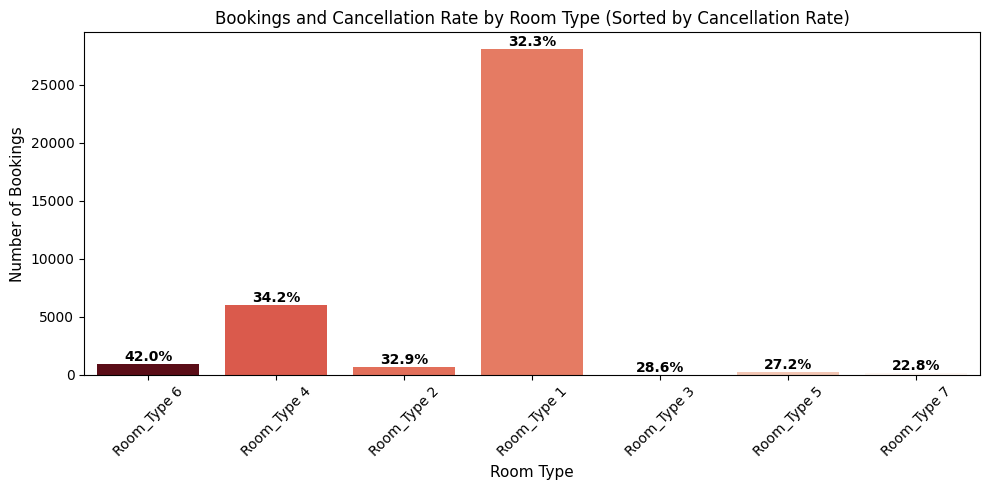

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors

# Room Type별 예약 수와 취소율 계산
room_stats = hotel.groupby('room_type_reserved')['booking_status_encoded'].agg(
    total_bookings='count',
    cancelled='sum'
)
room_stats['cancellation_rate'] = room_stats['cancelled'] / room_stats['total_bookings']

# 취소율 기준 내림차순 정렬
room_stats = room_stats.sort_values('cancellation_rate', ascending=False)

# 색상 맵 생성 (취소율이 높을수록 진한 빨간색)
norm = mcolors.Normalize(vmin=room_stats['cancellation_rate'].min(), vmax=room_stats['cancellation_rate'].max())
colors = [plt.cm.Reds(norm(rate)) for rate in room_stats['cancellation_rate']]

# 막대그래프
plt.figure(figsize=(10,5))
barplot = sns.barplot(
    x=room_stats.index,
    y=room_stats['total_bookings'],
    palette=colors
)

# 막대 위에 취소율 표시
for i, row in enumerate(room_stats.itertuples()):
    barplot.text(i, row.total_bookings + 10, f'{row.cancellation_rate*100:.1f}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Bookings and Cancellation Rate by Room Type (Sorted by Cancellation Rate)', fontsize=12)
plt.xlabel('Room Type', fontsize=11)
plt.ylabel('Number of Bookings', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

특정 room type이 많은 것을 고려해서 room type별 취소율을 구함

6 (가족용) > 4 (디럭스) > 2 (슈페리어) > 1 (스탠다드) > 3 (스위트) > 5 (비즈니스) > 7 (스튜디오) 순으로 취소율이 높음

#### **1-5. type_of_meal_plan vs booking_status_encoded**

식사 여부 (특별 옵션)에 따른 취소율 비교

보통 식사는 미리 결제하니까, 식사를 예약했으면 취소율이 낮은지..

In [ ]:
meal_counts = hotel['type_of_meal_plan'].value_counts()
print(meal_counts)

type_of_meal_plan
Meal Plan 1     27835
Not Selected     5130
Meal Plan 2      3305
Meal Plan 3         5
Name: count, dtype: int64


일반적으로

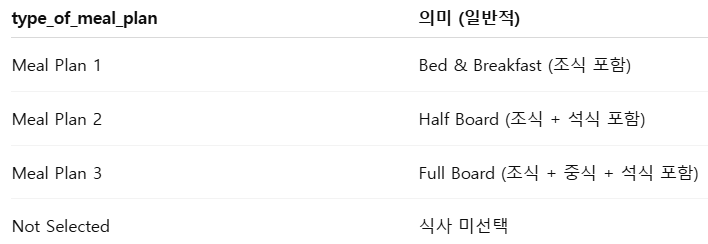

In [ ]:
# 그룹별 예약 건수와 취소율 계산
meal_stats = hotel.groupby('type_of_meal_plan')['booking_status_encoded'].agg(
    total_bookings='count',
    cancelled='sum'
)
meal_stats['cancellation_rate'] = meal_stats['cancelled'] / meal_stats['total_bookings']
meal_stats

,total_bookings,cancelled,cancellation_rate
type_of_meal_plan,,,
Meal Plan 1,27835,8679,0.311802
Meal Plan 2,3305,1506,0.455673
Meal Plan 3,5,1,0.200000
Not Selected,5130,1699,0.331189


/tmp/ipython-input-996712196.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


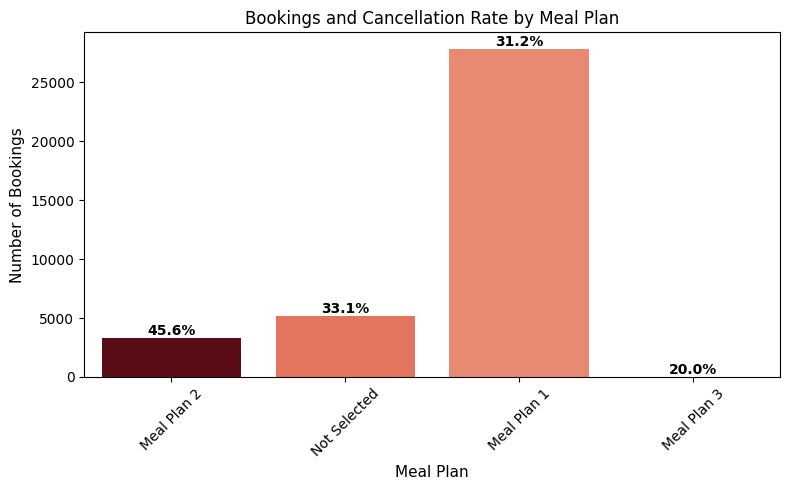

In [ ]:
# 취소율 기준 내림차순 정렬
meal_stats = meal_stats.sort_values('cancellation_rate', ascending=False)

# 색상 맵 생성 (취소율이 높을수록 진한 빨간색)
norm = mcolors.Normalize(vmin=meal_stats['cancellation_rate'].min(), vmax=meal_stats['cancellation_rate'].max())
colors = [plt.cm.Reds(norm(rate)) for rate in meal_stats['cancellation_rate']]

plt.figure(figsize=(8,5))
barplot = sns.barplot(
    x=meal_stats.index,
    y=meal_stats['total_bookings'],
    palette=colors
)

# 막대 위에 취소율 표시
for i, row in enumerate(meal_stats.itertuples()):
    barplot.text(i, row.total_bookings + 10, f'{row.cancellation_rate*100:.1f}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Bookings and Cancellation Rate by Meal Plan', fontsize=12)
plt.xlabel('Meal Plan', fontsize=11)
plt.ylabel('Number of Bookings', fontsize=11)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

#### **1-6. repeated_guest vs booking_status_encoded**

In [ ]:
guest_counts = hotel['repeated_guest'].value_counts()
print(guest_counts)

repeated_guest
0    35345
1      930
Name: count, dtype: int64


- 0이 압도적으로 많으므로 첫방문
- 1은 재방문

In [ ]:
# 그룹별 취소율 계산
guest_stats = hotel.groupby('repeated_guest')['booking_status_encoded'].agg(
    total_bookings='count',
    cancelled='sum'
)
guest_stats['cancellation_rate'] = guest_stats['cancelled'] / guest_stats['total_bookings']
print(guest_stats)

                total_bookings  cancelled  cancellation_rate
repeated_guest                                              
0                        35345      11869           0.335804
1                          930         16           0.017204


확실히 재방문한 사람들은 취소율이 낮다.

/tmp/ipython-input-892425537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


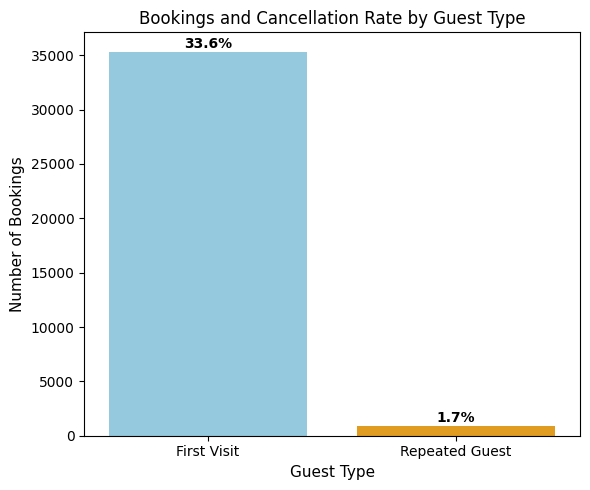

In [ ]:
# 막대그래프
plt.figure(figsize=(6,5))
barplot = sns.barplot(
    x=guest_stats.index.map({0: 'First Visit', 1: 'Repeated Guest'}),
    y=guest_stats['total_bookings'],
    palette=['skyblue', 'orange']
)

# 막대 위에 취소율 표시
for i, row in enumerate(guest_stats.itertuples()):
    barplot.text(i, row.total_bookings + 50, f'{row.cancellation_rate*100:.1f}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Bookings and Cancellation Rate by Guest Type', fontsize=12)
plt.xlabel('Guest Type', fontsize=11)
plt.ylabel('Number of Bookings', fontsize=11)
plt.tight_layout()
plt.show()

#### **1-7. (no_of_adults + no_of_children) vs booking_status_encoded**

어른 수랑 아이 수 각각의 관계를 봐야하겠지만 일단 합쳐봄

In [ ]:
hotel['total_guests'] = hotel['no_of_adults'] + hotel['no_of_children']

/tmp/ipython-input-1238608624.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


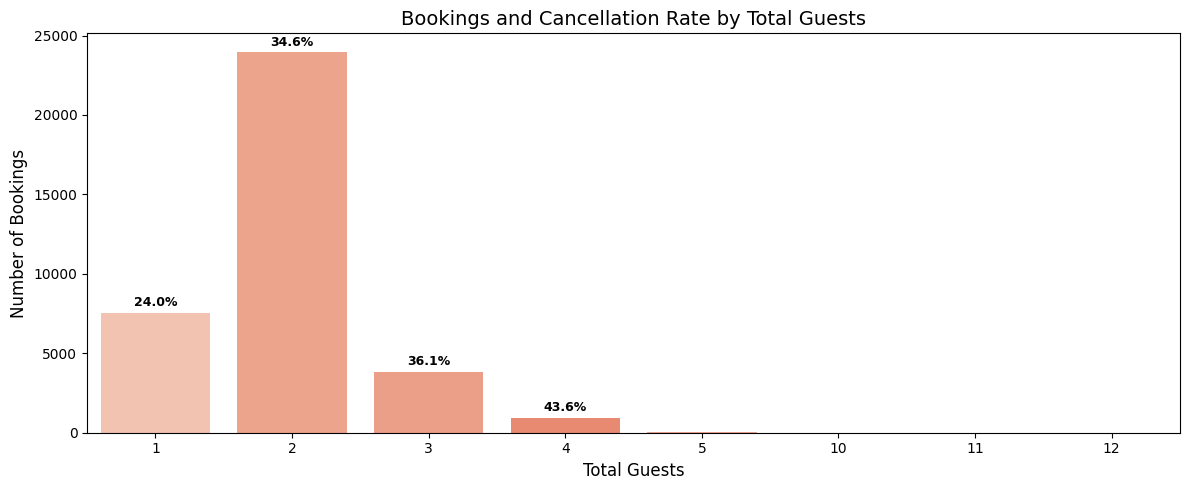

In [ ]:
# 총 인원별 예약 건수와 취소율 계산
guest_stats = hotel.groupby('total_guests')['booking_status_encoded'].agg(
    total_bookings='count',
    cancelled='sum'
)
guest_stats['cancellation_rate'] = guest_stats['cancelled'] / guest_stats['total_bookings']

# 총 인원 기준 오름차순 정렬
guest_stats = guest_stats.sort_index()

# 색상 맵 생성 (취소율이 높을수록 진한 빨간색)
norm = mcolors.Normalize(vmin=guest_stats['cancellation_rate'].min(), vmax=guest_stats['cancellation_rate'].max())
colors = [plt.cm.Reds(norm(rate)) for rate in guest_stats['cancellation_rate']]

# 그래프 그리기
plt.figure(figsize=(12,5))
barplot = sns.barplot(
    x=guest_stats.index,
    y=guest_stats['total_bookings'],
    palette=colors
)

# 막대 위에 취소율 표시 (값이 충분히 큰 경우만)
for i, row in enumerate(guest_stats.itertuples()):
    if row.total_bookings > 50:  # 예약 건수가 적으면 숫자 생략
        barplot.text(i, row.total_bookings + max(guest_stats['total_bookings'])*0.01,
                     f'{row.cancellation_rate*100:.1f}%',
                     ha='center', va='bottom', fontsize=9, fontweight='bold')

plt.title('Bookings and Cancellation Rate by Total Guests', fontsize=14)
plt.xlabel('Total Guests', fontsize=12)
plt.ylabel('Number of Bookings', fontsize=12)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

4명일때 취소율이 가장 높다.

#### **1-8. required_car_parking_space vs booking_status_encoded**

In [ ]:
car_counts = hotel['required_car_parking_space'].value_counts() # 0 - No / 1 - Yes
print(car_counts)

required_car_parking_space
0    35151
1     1124
Name: count, dtype: int64


주차 공간이 필요하지 않은 (0) 고객이 훨씬 많다.

/tmp/ipython-input-3985050359.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(


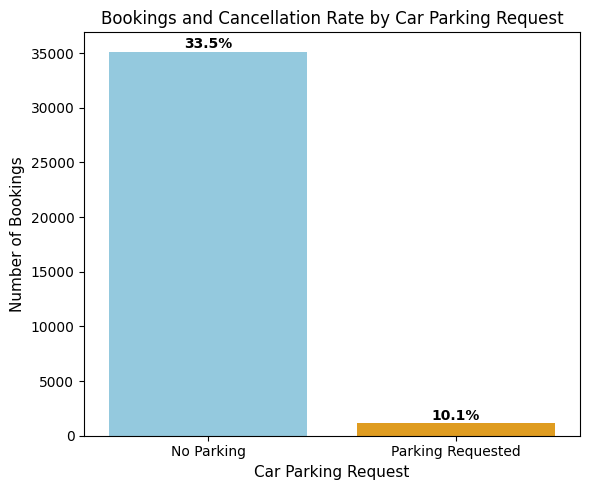

In [ ]:
# 주차 요청 여부별 예약 건수와 취소율 계산
parking_stats = hotel.groupby('required_car_parking_space')['booking_status_encoded'].agg(
    total_bookings='count',
    cancelled='sum'
)
parking_stats['cancellation_rate'] = parking_stats['cancelled'] / parking_stats['total_bookings']

# 막대그래프
plt.figure(figsize=(6,5))
barplot = sns.barplot(
    x=parking_stats.index.map({0: 'No Parking', 1: 'Parking Requested'}),
    y=parking_stats['total_bookings'],
    palette=['skyblue', 'orange']
)

# 막대 위에 취소율 표시
for i, row in enumerate(parking_stats.itertuples()):
    barplot.text(i, row.total_bookings + 5, f'{row.cancellation_rate*100:.1f}%',
                 ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.title('Bookings and Cancellation Rate by Car Parking Request', fontsize=12)
plt.xlabel('Car Parking Request', fontsize=11)
plt.ylabel('Number of Bookings', fontsize=11)
plt.tight_layout()
plt.show()

주차 공간이 필요하지 않은 고객의 취소율이 더 높다.

주차 공간이 필요한 고객은 이미 그런 호텔을 찾아서 예약한 거라서..?

#### **1-9. 과거 예약 관련 vs booking_status_encoded**
#### no_of_previous_cancellations: 과거 취소한 예약 수
#### no_of_previous_bookings_not_canceled: 과거 취소하지 않은 예약 수

In [ ]:
# 과거 총 예약 수
hotel['previous_total'] = hotel['no_of_previous_cancellations'] + hotel['no_of_previous_bookings_not_canceled']

# 과거 취소율 계산
hotel['previous_cancellation_rate'] = hotel['no_of_previous_cancellations'] / hotel['previous_total']
hotel['previous_cancellation_rate'] = hotel['previous_cancellation_rate'].fillna(0)  # 과거 예약이 없는 경우 0으로

/tmp/ipython-input-2413779440.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


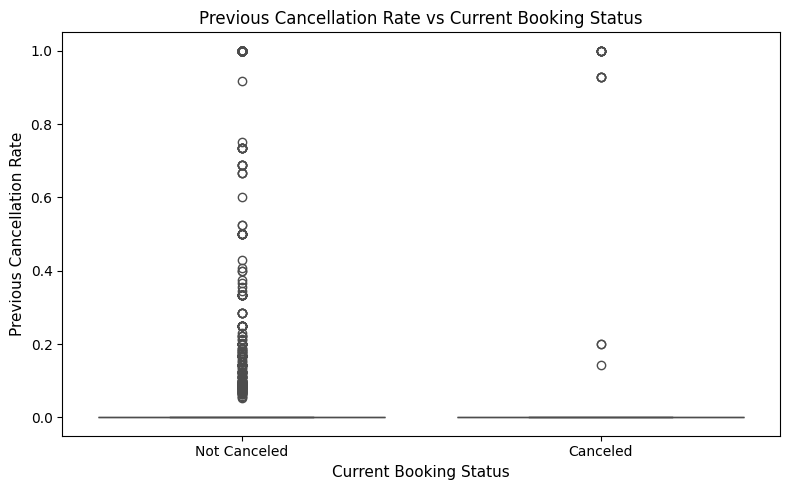

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x='booking_status_encoded',
    y='previous_cancellation_rate',
    data=hotel,
    palette=['skyblue','orange']
)

plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title('Previous Cancellation Rate vs Current Booking Status', fontsize=12)
plt.xlabel('Current Booking Status', fontsize=11)
plt.ylabel('Previous Cancellation Rate', fontsize=11)
plt.tight_layout()
plt.show()

#### **1-10. avg_price_per_room vs booking_status_encoded**

/tmp/ipython-input-434015153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='booking_status_encoded', y='avg_price_per_room', data=hotel, palette=['skyblue','orange'], inner='quartile')


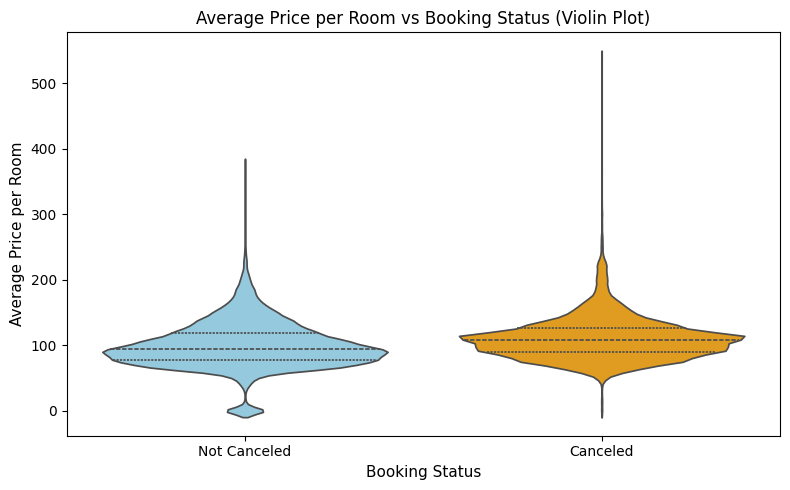

In [ ]:
plt.figure(figsize=(8,5))
sns.violinplot(x='booking_status_encoded', y='avg_price_per_room', data=hotel, palette=['skyblue','orange'], inner='quartile')
plt.xticks([0,1], ['Not Canceled', 'Canceled'])
plt.title('Average Price per Room vs Booking Status (Violin Plot)', fontsize=12)
plt.xlabel('Booking Status', fontsize=11)
plt.ylabel('Average Price per Room', fontsize=11)
plt.tight_layout()
plt.show()

## 전처리

각 모델별로 다르게 접근

1. Logistic Regression

2. LGBM

3. SVC

4. CatBoost

### 전체 모델 공통 처리 사항
1. datetime  변환
2. 범주형 변수 Label Encoding
3. binary 변수
4. 파생 변수
5. 필요 없는 변수 drop


++ KNN을 이용해서 거리가 비슷한 데이터 활용하는 방식은 tree 기반보다는 Logistic Regressiong, SVC 같이 조금 더 단순한 모델에 좋다고 해서 일단 두 모델에만 추가해놨어요!

그리고 KNN 이용한거는 무조건 train/test를 나누고 적용을 해야 한다고 해서 일단
train/test split도 제가 코드 작성해 둿어요!

날짜 이상한거 체크하기

In [ ]:
import pandas as pd
import numpy as np

for c in ["arrival_year","arrival_month","arrival_date"]:
    hotel[c] = pd.to_numeric(hotel[c], errors="coerce")

ym = pd.to_datetime(
    hotel["arrival_year"].astype("Int64").astype(str) + "-" +
    hotel["arrival_month"].astype("Int64").astype(str).str.zfill(2) + "-01",
    errors="coerce"
)
last_day = (ym + pd.offsets.MonthEnd(0)).dt.day

invalid_month = ~hotel["arrival_month"].between(1, 12)
invalid_day_low = hotel["arrival_date"] < 1
invalid_day_high = hotel["arrival_date"] > last_day
invalid_yearmonth = ym.isna()
bad_mask = invalid_month | invalid_day_low | invalid_day_high | invalid_yearmonth

ok = ~bad_mask
hotel.loc[ok, "arrival_date_full"] = pd.to_datetime({
    "year":  hotel.loc[ok, "arrival_year"],
    "month": hotel.loc[ok, "arrival_month"],
    "day":   hotel.loc[ok, "arrival_date"],
}, errors="coerce")

hotel.loc[bad_mask, "arrival_date_full"] = pd.NaT

problem_preview = hotel.loc[bad_mask, ["arrival_year","arrival_month","arrival_date"]].head(10)
print(problem_preview)
print("문제 행 수:", bad_mask.sum(), " / 전체:", len(hotel))

      arrival_year  arrival_month  arrival_date
2626          2018              2            29
3677          2018              2            29
5600          2018              2            29
6343          2018              2            29
7648          2018              2            29
8000          2018              2            29
8989          2018              2            29
9153          2018              2            29
9245          2018              2            29
9664          2018              2            29
문제 행 수: 37  / 전체: 36275


In [ ]:
import pandas as pd

for c in ["arrival_year", "arrival_month", "arrival_date"]:
    hotel[c] = pd.to_numeric(hotel[c], errors="coerce")

hotel["arrival_date_full"] = pd.to_datetime({
    "year": hotel["arrival_year"],
    "month": hotel["arrival_month"],
    "day": hotel["arrival_date"]
}, errors="coerce")

hotel = hotel.dropna(subset=["arrival_date_full"]).reset_index(drop=True)

print("남은 행 개수:", len(hotel))

남은 행 개수: 36238


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## datetime 하나로 합치는 코드
tmp = hotel.rename(columns={
    "arrival_year": "year",
    "arrival_month": "month",
    "arrival_date": "day"
})

hotel["arrival_date_full"] = pd.to_datetime(tmp[["year","month","day"]])


In [ ]:
## 범주형 변수 처리하는 코드 (binary였던 거는 그대로 냅뒀어용)
cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    hotel[col] = le.fit_transform(hotel[col])
    le_dict[col] = le


## 변수 drop
hotel = hotel.drop(columns=["Booking_ID","arrival_year", "arrival_date"])

In [ ]:
## 파생 변수
## 총 숙박일수
hotel["total_nights"] = hotel["no_of_weekend_nights"] + hotel["no_of_week_nights"]

## 리드타임 그룹화 -- 구간은 일주일, 한달, 세달, 반년, 일년, 일년 이상으로 나눴습니다!
hotel["lead_time_group"] = pd.cut(hotel["lead_time"],
                                  bins=[-1,7,30,90,180,365,800],
                                  labels=["<1w","1w-1m","1-3m","3-6m","6-12m",">1y"])

## 평균 1박당 가격 (NaN은 0으로)
hotel["avg_price_per_night"] = hotel["avg_price_per_room"] / hotel["total_nights"].replace(0, np.nan)
hotel["avg_price_per_night"] = hotel["avg_price_per_night"].fillna(0)

## 동반 인원
hotel["total_guests"] = hotel["no_of_adults"] + hotel["no_of_children"]

## 자녀
hotel["has_children"] = (hotel["no_of_children"] > 0).astype(int)

## 취소 비율
hotel["cancel_ratio"] = hotel["no_of_previous_cancellations"] / (
    hotel["no_of_previous_cancellations"] + hotel["no_of_previous_bookings_not_canceled"] + 1
)

## 이전 예약 경험
hotel["has_prev_booking"] = (
    (hotel["no_of_previous_cancellations"] + hotel["no_of_previous_bookings_not_canceled"]) > 0
).astype(int)

## 성수기
hotel["is_peak"] = hotel["arrival_month"].isin([6,7,8,12]).astype(int)

## 식사 플랜
hotel["no_meal_plan"] = (hotel["type_of_meal_plan"] == le_dict["type_of_meal_plan"].transform(["Not Selected"])[0]).astype(int)

## 2차 전처리 -- 추가 파생 변수

(sin, cos 처리 관련) & 요일 관련 변수 추가

In [ ]:
if "arrival_date_full" in hotel.columns:
    hotel["arrival_date_full"] = pd.to_datetime(hotel["arrival_date_full"], errors="coerce")

    hotel["arrival_day_of_week"] = hotel["arrival_date_full"].dt.dayofweek

In [ ]:
hotel["month_sin"] = np.sin(2 * np.pi * hotel["arrival_month"] / 12)
hotel["month_cos"] = np.cos(2 * np.pi * hotel["arrival_month"] / 12)

hotel["dow_sin"] = np.sin(2 * np.pi * hotel["arrival_dayofweek"] / 7)
hotel["dow_cos"] = np.cos(2 * np.pi * hotel["arrival_dayofweek"] / 7)

가격 관련 추가 변수
- 1인당 가격, 성수기일 경우의 방 가격

In [ ]:
hotel["price_per_guest"] = hotel["avg_price_per_room"] / (hotel["total_guests"].replace(0, np.nan))
hotel["price_per_guest"] = hotel["price_per_guest"].fillna(0)

hotel["peak_price"] = hotel["avg_price_per_room"] * hotel["is_peak"]

lead_time 비선형성 + month랑 곱해서 시즌 별 lead_Time 패턴 고려

In [ ]:
hotel["log_lead_time"] = np.log1p(hotel["lead_time"])

hotel["lead_x_month"] = hotel["lead_time"] * hotel["arrival_month"]

취소 경험 여부

In [ ]:
hotel["ever_canceled"] = (hotel["no_of_previous_cancellations"] > 0).astype(int)

## 1차 전처리 코드 -- KNN 적용 관련

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def transform_with_knn_env(
    X_train: pd.DataFrame, y_train: pd.Series,
    X_test: pd.DataFrame,
    env_features = ["type_of_meal_plan", "required_car_parking_space",
                    "room_type_reserved", "no_of_special_requests"],
    k: int = 10
):
    ## 이웃 취소율
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train[env_features], y_train)
    tr_env_cancel = knn_cls.predict_proba(X_train[env_features])[:, 1]
    te_env_cancel = knn_cls.predict_proba(X_test[env_features])[:, 1]

    ## 이웃 평균 1박 가격
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train[env_features], X_train["avg_price_per_night"])
    tr_env_price = knn_reg.predict(X_train[env_features])
    te_env_price = knn_reg.predict(X_test[env_features])

    X_train_knn = X_train.copy()
    X_test_knn  = X_test.copy()

    X_train_knn["env_cancel_rate"] = tr_env_cancel
    X_test_knn["env_cancel_rate"]  = te_env_cancel
    X_train_knn["env_avg_price"]   = tr_env_price
    X_test_knn["env_avg_price"]    = te_env_price

    return X_train_knn, X_test_knn

### LR

1. avg_price~ 에서 이상치가 있었는데 해당 데이터는 제거했어요
2. skewed 변수 로그 변환
3. 스케일링
4. 다중 공선성 때문에 파생 변수는 일부만 선택했습니다

In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.model_selection import train_test_split


df_lr = hotel.copy()

## 이상치 제거
df_lr = df_lr[df_lr["avg_price_per_room"] < 500]

## 로그 변환
for col in ["lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "no_of_children"]:
    df_lr[col] = np.log1p(df_lr[col])

X_lr = df_lr.drop(columns=["booking_status","arrival_date_full"])
y_lr = (df_lr["booking_status"] == "Canceled").astype(int)

X_tr, X_te, y_tr, y_te = train_test_split(X_lr, y_lr, test_size=0.2, random_state=42)

## KNN 적용
X_tr, X_te = transform_with_knn_env(
    X_train=X_tr, y_train=y_tr, X_test=X_te,
    env_features=["type_of_meal_plan","required_car_parking_space","room_type_reserved","no_of_special_requests"],
    k=10
)


## 스케일링
scaler = StandardScaler()
num_cols = [
    "no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights",
    "lead_time","avg_price_per_room","total_nights","avg_price_per_night",
    "total_guests","cancel_ratio","no_of_special_requests",
]

for c in ["env_cancel_rate", "env_avg_price"]:
    if c in X_tr.columns:
        num_cols.append(c)

num_cols = [c for c in num_cols if c in X_tr.columns]

X_tr[num_cols] = scaler.fit_transform(X_tr[num_cols])
X_te[num_cols] = scaler.transform(X_te[num_cols])

In [ ]:
X_lr_train, X_lr_test, y_lr_train, y_lr_test = X_tr, X_te, y_tr, y_te

### LGBM

1. 로그 변환, 스케일링, 이상치 제거 필요 없어서 안 했어요
2. 파생 변수는 다 사용했습니다!

# **전처리 적용**

## 1차 모델링 _ LGBM

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

In [ ]:
hotel = pd.read_csv('/content/drive/MyDrive/Hotel Reservations.csv')

In [ ]:
import pandas as pd
import numpy as np

for c in ["arrival_year","arrival_month","arrival_date"]:
    hotel[c] = pd.to_numeric(hotel[c], errors="coerce")

ym = pd.to_datetime(
    hotel["arrival_year"].astype("Int64").astype(str) + "-" +
    hotel["arrival_month"].astype("Int64").astype(str).str.zfill(2) + "-01",
    errors="coerce"
)
last_day = (ym + pd.offsets.MonthEnd(0)).dt.day

invalid_month = ~hotel["arrival_month"].between(1, 12)
invalid_day_low = hotel["arrival_date"] < 1
invalid_day_high = hotel["arrival_date"] > last_day
invalid_yearmonth = ym.isna()
bad_mask = invalid_month | invalid_day_low | invalid_day_high | invalid_yearmonth

ok = ~bad_mask
hotel.loc[ok, "arrival_date_full"] = pd.to_datetime({
    "year":  hotel.loc[ok, "arrival_year"],
    "month": hotel.loc[ok, "arrival_month"],
    "day":   hotel.loc[ok, "arrival_date"],
}, errors="coerce")

hotel.loc[bad_mask, "arrival_date_full"] = pd.NaT

problem_preview = hotel.loc[bad_mask, ["arrival_year","arrival_month","arrival_date"]].head(10)
print(problem_preview)
print("문제 행 수:", bad_mask.sum(), " / 전체:", len(hotel))

      arrival_year  arrival_month  arrival_date
2626          2018              2            29
3677          2018              2            29
5600          2018              2            29
6343          2018              2            29
7648          2018              2            29
8000          2018              2            29
8989          2018              2            29
9153          2018              2            29
9245          2018              2            29
9664          2018              2            29
문제 행 수: 37  / 전체: 36275


In [ ]:
import pandas as pd

for c in ["arrival_year", "arrival_month", "arrival_date"]:
    hotel[c] = pd.to_numeric(hotel[c], errors="coerce")

hotel["arrival_date_full"] = pd.to_datetime({
    "year": hotel["arrival_year"],
    "month": hotel["arrival_month"],
    "day": hotel["arrival_date"]
}, errors="coerce")

hotel = hotel.dropna(subset=["arrival_date_full"]).reset_index(drop=True)

print("남은 행 개수:", len(hotel))

남은 행 개수: 36238


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

## datetime 하나로 합치는 코드
tmp = hotel.rename(columns={
    "arrival_year": "year",
    "arrival_month": "month",
    "arrival_date": "day"
})

hotel["arrival_date_full"] = pd.to_datetime(tmp[["year","month","day"]])


In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36238 entries, 0 to 36237
Data columns (total 20 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   Booking_ID                            36238 non-null  object        
 1   no_of_adults                          36238 non-null  int64         
 2   no_of_children                        36238 non-null  int64         
 3   no_of_weekend_nights                  36238 non-null  int64         
 4   no_of_week_nights                     36238 non-null  int64         
 5   type_of_meal_plan                     36238 non-null  object        
 6   required_car_parking_space            36238 non-null  int64         
 7   room_type_reserved                    36238 non-null  object        
 8   lead_time                             36238 non-null  int64         
 9   arrival_year                          36238 non-null  int64         
 10

In [ ]:
## 범주형 변수 처리하는 코드 (binary였던 거는 그대로 냅뒀어용)
cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type"]
le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    hotel[col] = le.fit_transform(hotel[col])
    le_dict[col] = le


## 변수 drop
hotel = hotel.drop(columns=["Booking_ID","arrival_year", "arrival_date"])

In [ ]:
## 파생 변수
## 총 숙박일수
hotel["total_nights"] = hotel["no_of_weekend_nights"] + hotel["no_of_week_nights"]

## 리드타임 그룹화 -- 구간은 일주일, 한달, 세달, 반년, 일년, 일년 이상으로 나눴습니다!
hotel["lead_time_group"] = pd.cut(hotel["lead_time"],
                                  bins=[-1,7,30,90,180,365,800],
                                  labels=["<1w","1w-1m","1-3m","3-6m","6-12m",">1y"])

## 평균 1박당 가격 (NaN은 0으로)
hotel["avg_price_per_night"] = hotel["avg_price_per_room"] / hotel["total_nights"].replace(0, np.nan)
hotel["avg_price_per_night"] = hotel["avg_price_per_night"].fillna(0)

## 동반 인원
hotel["total_guests"] = hotel["no_of_adults"] + hotel["no_of_children"]

## 자녀
hotel["has_children"] = (hotel["no_of_children"] > 0).astype(int)

## 취소 비율
hotel["cancel_ratio"] = hotel["no_of_previous_cancellations"] / (
    hotel["no_of_previous_cancellations"] + hotel["no_of_previous_bookings_not_canceled"] + 1
)

## 이전 예약 경험
hotel["has_prev_booking"] = (
    (hotel["no_of_previous_cancellations"] + hotel["no_of_previous_bookings_not_canceled"]) > 0
).astype(int)

## 성수기
hotel["is_peak"] = hotel["arrival_month"].isin([6,7,8,12]).astype(int)

## 식사 플랜
hotel["no_meal_plan"] = (hotel["type_of_meal_plan"] == le_dict["type_of_meal_plan"].transform(["Not Selected"])[0]).astype(int)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor

def transform_with_knn_env(
    X_train: pd.DataFrame, y_train: pd.Series,
    X_test: pd.DataFrame,
    env_features = ["type_of_meal_plan", "required_car_parking_space",
                    "room_type_reserved", "no_of_special_requests"],
    k: int = 10
):
    ## 이웃 취소율
    knn_cls = KNeighborsClassifier(n_neighbors=k)
    knn_cls.fit(X_train[env_features], y_train)
    tr_env_cancel = knn_cls.predict_proba(X_train[env_features])[:, 1]
    te_env_cancel = knn_cls.predict_proba(X_test[env_features])[:, 1]

    ## 이웃 평균 1박 가격
    knn_reg = KNeighborsRegressor(n_neighbors=k)
    knn_reg.fit(X_train[env_features], X_train["avg_price_per_night"])
    tr_env_price = knn_reg.predict(X_train[env_features])
    te_env_price = knn_reg.predict(X_test[env_features])

    X_train_knn = X_train.copy()
    X_test_knn  = X_test.copy()

    X_train_knn["env_cancel_rate"] = tr_env_cancel
    X_test_knn["env_cancel_rate"]  = te_env_cancel
    X_train_knn["env_avg_price"]   = tr_env_price
    X_test_knn["env_avg_price"]    = te_env_price

    return X_train_knn, X_test_knn

## **CatBoost**

1. 스케일링, 이상치 제거 필요 없음
2. 카테고리 변수 자동 처리!
3. 파생변수 모두 사용

In [ ]:
df_cb = hotel.copy()

In [ ]:
cat_features = ["type_of_meal_plan", "room_type_reserved", "market_segment_type",
                "required_car_parking_space", "repeated_guest", "lead_time_group"]


X_cb = df_cb.drop(columns=["booking_status","arrival_date_full"])
y_cb = (df_cb["booking_status"] == "Canceled").astype(int)

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36238 entries, 0 to 36237
Data columns (total 38 columns):
 #   Column                                Non-Null Count  Dtype         
---  ------                                --------------  -----         
 0   no_of_adults                          36238 non-null  int64         
 1   no_of_children                        36238 non-null  int64         
 2   no_of_weekend_nights                  36238 non-null  int64         
 3   no_of_week_nights                     36238 non-null  int64         
 4   type_of_meal_plan                     36238 non-null  int64         
 5   required_car_parking_space            36238 non-null  int64         
 6   room_type_reserved                    36238 non-null  int64         
 7   lead_time                             36238 non-null  int64         
 8   arrival_month                         36238 non-null  int64         
 9   market_segment_type                   36238 non-null  int64         
 10

###1. CatBoost 학습

In [ ]:
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier, Pool

# 타깃
y = (hotel["booking_status"] == "Canceled").astype(int)

# 입력 컬럼 (불필요 컬럼 제외)
drop_cols = ["booking_status", "arrival_date_full"]  # 필요시 "Booking_ID","arrival_year","arrival_date"도 제외
X = hotel.drop(columns=drop_cols).copy()

# 범주형 컬럼 표시
cat_cols = ["type_of_meal_plan","room_type_reserved","market_segment_type","lead_time_group"]
for c in cat_cols:
    if c in X.columns:
        X[c] = X[c].astype("category")

# train/test 분리 (규칙 고정: test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)


## 1차 학습 내용

In [ ]:

# 클래스 가중치 계산
N  = len(y_train)
n1 = int(y_train.sum())
n0 = N - n1
class_weights = [N/(2*n0), N/(2*n1)]

# CatBoost Pool 생성
cat_idx = [X_train.columns.get_loc(c) for c in cat_cols if c in X_train.columns]
train_pool = Pool(X_train, y_train, cat_features=cat_idx)
valid_pool = Pool(X_test,  y_test,  cat_features=cat_idx)

#학습
params = dict(
    iterations=500,
    depth=6,
    learning_rate=0.07,
    l2_leaf_reg=3.0,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    early_stopping_rounds=100,
    verbose=False,
    class_weights=class_weights
)
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=valid_pool, verbose=False)

print("best iter:", model.get_best_iteration())
print("best score:", model.get_best_score())


- 'learn': {'Logloss': 0.248...}

→ 학습(train) 데이터에서의 로그손실(Logloss).

(0.248 → 꽤 낮음): 모델이 잘 맞췄다

- 'validation': {'Logloss': 0.288..., 'AUC': 0.949...}

→ 검증(validation) 데이터에서의 성능 지표

Logloss = 0.288 : 모델 예측 확률이 정답에 얼마나 잘 맞는지 보여줌 → 낮을수록 좋음.

AUC = 0.949 : 매우 높은 성능

###2. 테스트셋 성능 평가

In [ ]:
from sklearn.metrics import (roc_auc_score, average_precision_score, log_loss,
                             accuracy_score, precision_recall_fscore_support,
                             confusion_matrix)

proba = model.predict_proba(X_test)[:, 1]
pred05 = (proba >= 0.50).astype(int)

print("AUC       :", roc_auc_score(y_test, proba))
print("PR-AUC    :", average_precision_score(y_test, proba))
print("LogLoss   :", log_loss(y_test, proba))
print("Accuracy  :", accuracy_score(y_test, pred05))
p,r,f,_ = precision_recall_fscore_support(y_test, pred05, average="binary")
print("Precision :", p, "  Recall:", r, "  F1:", f)
print("Confusion Matrix\n", confusion_matrix(y_test, pred05))


AUC       : 0.9494502444394687
PR-AUC    : 0.9161922572019766
LogLoss   : 0.2872328302057037
Accuracy  : 0.8733443708609272
Precision : 0.7788829380260138   Recall: 0.8569023569023569   F1: 0.8160320641282565
Confusion Matrix
 [[4294  578]
 [ 340 2036]]


**<결과 해석(임계값 0.50 기준)>**



AUC = 0.949 / PR-AUC = 0.916

→ 확률 점수의 순위화 품질이 매우 높음(랜덤 0.5 대비 훨씬 우수). 불균형 상황에서도 양성(취소) 구분을 잘함.

LogLoss = 0.287

→ 예측 확률이 실제 라벨과 잘 맞음(확률 보정 수준도 양호한 편).

Accuracy = 0.873

→ 전체의 87.3%를 맞춤(하지만 비용이 다른 문제에선 Accuracy만으론 판단 불가).

Precision = 0.779 / Recall = 0.857 / F1 = 0.816

→ 취소라고 알린 예약 중 77.9%가 실제 취소, 실제 취소 중 85.7%를 잡아냄.

Confusion Matrix (y=0: Not_Canceled, y=1: Canceled)

[[TN  FP],

 [FN  TP]]

[[4294  578],

 [ 340 2036]]


TN=4294: 정상 예약을 정상으로 판단

FP=578: 정상인데 취소라고 경고(과잉 경보)

FN=340: 실제 취소를 놓침

TP=2036: 취소를 정확히 잡음

**[해석]**

“취소를 놓치지 않겠다”가 중요하면 Recall 0.857은 꽤 좋음. 다만 FP=578건의 과잉 경보가 있어 운영비용(불필요한 연락/보증요청 등)을 고려해 임계값을 조정할 수 있음.

랭킹 품질(AUC, PR-AUC)이 매우 높으므로, 상위 k% 고객에 집중하는 운영(예: 상위 10%에 사전확인/알림 강화)으로도 효과적.

###3. 임계값(Threshold) 튜닝 (F1 기준)

In [ ]:
import numpy as np
from sklearn.metrics import precision_recall_fscore_support

ths = np.linspace(0.1, 0.9, 81)
stats = []
for t in ths:
    pred = (proba >= t).astype(int)
    p,r,f,_ = precision_recall_fscore_support(y_test, pred, average="binary")
    stats.append((t,p,r,f))
best_t, best_p, best_r, best_f = sorted(stats, key=lambda x: x[3], reverse=True)[0]
print(f"Best threshold by F1: {best_t:.3f}  (P={best_p:.3f}, R={best_r:.3f}, F1={best_f:.3f})")

# 최적 임계값에서 혼동행렬
best_pred = (proba >= best_t).astype(int)
print("Confusion @ best_t\n", confusion_matrix(y_test, best_pred))


Best threshold by F1: 0.640  (P=0.846, R=0.806, F1=0.825)
Confusion @ best_t
 [[4524  348]
 [ 462 1914]]


**<의미>**

임계값을 0.50 → 0.64로 올리면

오탐(FP): 578 → 348 (↓230) → 쓸데없는 경보가 많이 줄었음.

미탐(FN): 340 → 462 (↑122) → 실제 취소를 더 많이 놓침.

정밀도↑(0.78 ⇒ 0.85), 재현율↓(0.86 ⇒ 0.81), F1 소폭↑(0.816 ⇒ 0.825).

특이도 0.881 ⇒ 0.928, FPR 0.119 ⇒ 0.071로 개선.



**“과잉 경보를 줄이고 싶다”** 면 t=0.64가 더 적합(Precision↑, FP↓).

**“실제 취소를 절대 놓치면 안 된다”** 면 t=0.50처럼 더 낮은 임계값이 낫다(Recall↑, FN↓).

F1은 정밀도와 재현율을 동일 가중으로 본 지표라, 두 비용이 비슷하다고 볼 때 t=0.64 채택이 합리적.

###4. 변수 중요도 & SHAP (해석)

- FeatureImportance: 트리를 분할할 때 손실을 얼마나 줄였는지의 누적 기여도(모델 내부 기준).

- SHAP mean_abs_shap: 각 피처가 예측(로짓)에 미친 평균 절대 영향량. 값이 클수록 “영향이 큰 피처”.

| 항목        | Feature Importance(CatBoost)    | Global SHAP Importance                     |
| --------- | ------------------------------- | ------------------------------------------ |
| 기준        | **학습 중 분할 이득(손실 감소)** 누적        | **예측 결과의 기여도(샘플별 SHAP)의 평균 크기**            |
| 관점        | **모델이 트리를 어떻게 만들었는가**(학습 과정 중심) | **완성된 모델 예측을 누가 움직였는가**(예측 결과 중심)          |
| 국소 vs. 전역 | 일부 구간에서 큰 이득이면 높아질 수 있음         | **전 샘플 평균**이므로 **넓게 고르게** 영향 주면 높아짐        |
| 방향(↑/↓)   | 제공 안 함                          | 전역 막대는 방향 X, **개별 SHAP**으로 방향/비선형 확인       |
| 상관/중복 변수  | 한 변수에 중요도가 **쏠리거나 분산**될 수 있음    | 상관 변수끼리는 **기여를 나눠 가짐**(완벽하진 않음)            |
| 일관성       | 파라미터/시드 변화에 다소 민감할 수 있음         | 대체로 **설명 일관성**이 좋음(트리 모델은 TreeSHAP로 정확 계산) |



Feature Importance ↑ & SHAP ↑: 모델도 자주/크게 썼고, 예측에도 넓게 큰 영향 → 핵심 피처.

Feature Importance ↑ & SHAP ↓: 일부 구간에서만 큰 이득(스플릿)

Feature Importance ↓ & SHAP ↑: 분할 이득은 작게 여러 번이지만 전반에 걸쳐 고르게 영향 → 규칙적으로 넓게 작동하는 피처.

In [ ]:
import pandas as pd

# 1) 표준 중요도
imp = model.get_feature_importance(train_pool, type="FeatureImportance")
fi = (pd.DataFrame({"feature": X_train.columns, "importance": imp})
        .sort_values("importance", ascending=False))
print(fi.head(20))

# 2) SHAP 전역 중요도
shap_vals = model.get_feature_importance(data=train_pool, type="ShapValues")
shap_abs_mean = np.abs(shap_vals[:, :-1]).mean(axis=0)
shap_df = (pd.DataFrame({"feature": X_train.columns, "mean_abs_shap": shap_abs_mean})
             .sort_values("mean_abs_shap", ascending=False))
print(shap_df.head(20))



                       feature  importance
14      no_of_special_requests   17.848313
13          avg_price_per_room   12.154827
7                    lead_time   11.644195
9          market_segment_type   10.909389
31               log_lead_time    7.147316
32                lead_x_month    5.197806
8                arrival_month    4.981733
26                   month_cos    4.200087
16             lead_time_group    3.773147
29             price_per_guest    3.234266
17         avg_price_per_night    3.068046
3            no_of_week_nights    2.295416
30                  peak_price    2.004316
2         no_of_weekend_nights    1.943269
5   required_car_parking_space    1.857147
25                   month_sin    1.683130
0                 no_of_adults    0.773884
27                     dow_sin    0.695861
15                total_nights    0.540137
4            type_of_meal_plan    0.526304
                       feature  mean_abs_shap
14      no_of_special_requests       1.262906
9    

**핵심 변수 요약(공통 상위권)**

(Feature Importance가 높다는 건 그 변수가 취소/비취소를 가르는 데 강한 구분력을 제공한다는 뜻)

1. no_of_special_requests

- 최상위. “요청을 많이 남긴 예약”이 모델 예측에 큰 영향. (일반적으로는 취소 ↓ 쪽으로 작용하는 경우가 많음—의도/몰입도가 높으니)

2. lead_time / log_lead_time (+ lead_time_group)

- 리드타임 관련 변수가 모두 상위권 → 비선형성/구간 효과까지 유의미. 보통 리드타임이 길수록 취소 위험 ↑ 경향.

3. market_segment_type

- 세그먼트(Online/Offline 등)별 취소 패턴 차이가 큼.

4. avg_price_per_room / price_per_guest / avg_price_per_night

- 가격 수준이 취소에 의미 있게 관여.

5. seasonality 변수: arrival_month, month_cos/sin, lead_x_month

- 월·시즌 효과가 존재(성수기/비성수기).

6. required_car_parking_space

- 중상위권. 주차 필요 여부도 신호.

- (상대적으로 하위) no_of_adults, total_guests, room_type_reserved 등은 영향이 작음.


###5. 시각화

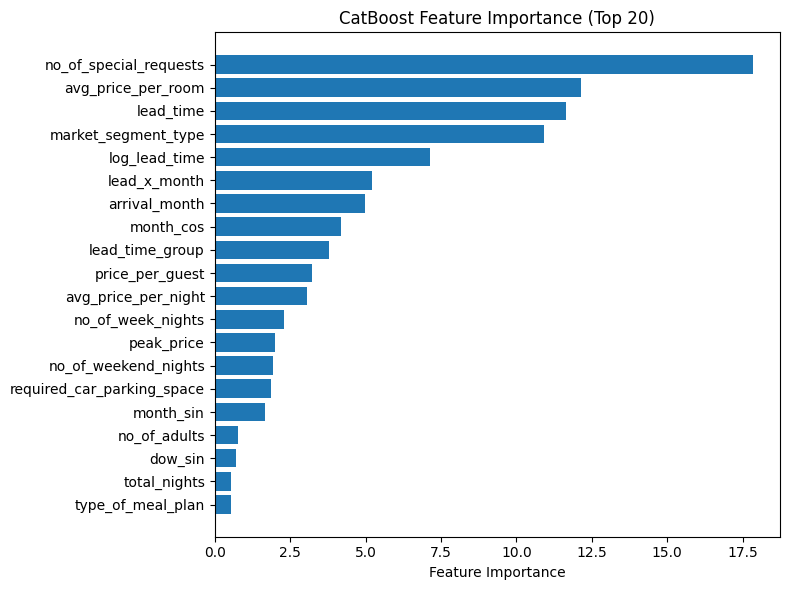

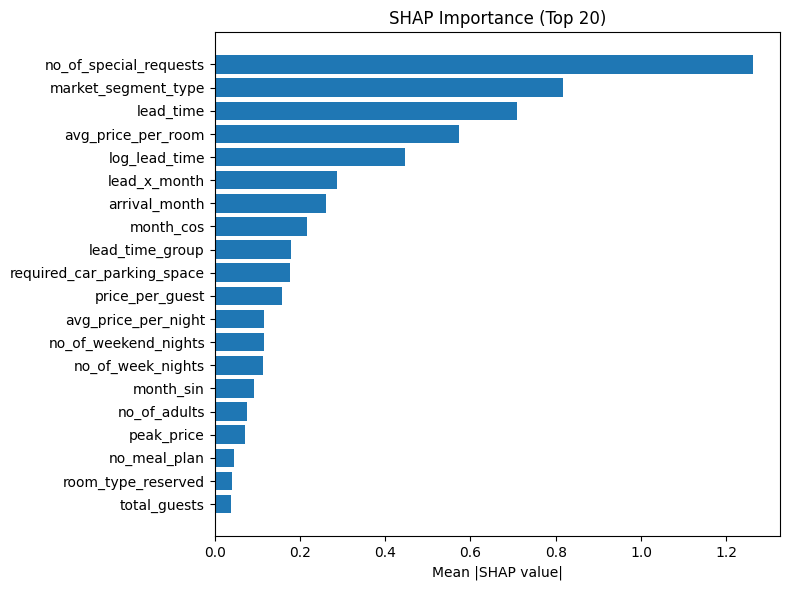

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 0) 필요 객체 확인 후 준비
# FeatureImportance DataFrame(fi) 없으면 새로 계산
try:
    fi
except NameError:
    imp = model.get_feature_importance(train_pool, type="FeatureImportance")
    fi  = (pd.DataFrame({"feature": X_train.columns, "importance": imp})
             .sort_values("importance", ascending=False))

# SHAP 요약 DataFrame(shap_df) 없으면 빠르게 샘플링해서 계산
try:
    shap_df
except NameError:
    # 과부하 방지: 학습 데이터 일부만 사용 (최대 3000행)
    n = min(len(X_train), 3000)
    idx = np.random.RandomState(42).choice(len(X_train), size=n, replace=False)
    sub_pool = train_pool.slice(idx)
    shap_vals = model.get_feature_importance(data=sub_pool, type="ShapValues")
    shap_abs_mean = np.abs(shap_vals[:, :-1]).mean(axis=0)
    shap_df = (pd.DataFrame({"feature": X_train.columns, "mean_abs_shap": shap_abs_mean})
                 .sort_values("mean_abs_shap", ascending=False))

# 1) Feature Importance (Top 20)
topk = 20
fi_top = fi.head(topk).iloc[::-1]  # barh 가독성 위해 역순

plt.figure(figsize=(8, 6))
plt.barh(fi_top["feature"], fi_top["importance"])
plt.xlabel("Feature Importance")
plt.title("CatBoost Feature Importance (Top 20)")
plt.tight_layout()
plt.show()

# 2) SHAP Mean |value| (Top 20)
shap_top = shap_df.head(topk).iloc[::-1]

plt.figure(figsize=(8, 6))
plt.barh(shap_top["feature"], shap_top["mean_abs_shap"])
plt.xlabel("Mean |SHAP value|")
plt.title("SHAP Importance (Top 20)")
plt.tight_layout()
plt.show()


# **LGBM**

In [ ]:
df_lgbm = hotel.copy()

df_lgbm["room_type_reserved"] = df_lgbm["room_type_reserved"].astype("category")
df_lgbm['type_of_meal_plan'] = df_lgbm['type_of_meal_plan'].astype('category')
df_lgbm["arrival_weekday"] = df_lgbm["arrival_date_full"].dt.weekday.astype("category")
df_lgbm["arrival_month"] = df_lgbm["arrival_date_full"].dt.month.astype("category")

X_lgbm = df_lgbm.drop(columns=["booking_status", "arrival_date_full"])
y_lgbm = (df_lgbm["booking_status"] == "Canceled").astype(int)

In [ ]:
df_sorted = hotel.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train = (train_df['booking_status'] == 'Canceled').astype(int)

X_test = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test = (test_df['booking_status'] == 'Canceled').astype(int)

In [ ]:
X_train.shape, y_train.shape

((28990, 34), (28990,))

In [ ]:
X_test.shape, y_test.shape

((7248, 34), (7248,))

### randomized search

In [ ]:
y_train.value_counts()

,count
booking_status,
0,19617
1,9373


In [ ]:
# 클래스 불균형 해소
class_weight = (y_train == 0).sum() / (y_train ==1).sum()
class_weight

np.float64(2.0929264909847434)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 파라미터 범위
param_dist = {
    "n_estimators": randint(100, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 15),
    "num_leaves": randint(20, 150),
    "min_child_samples": randint(10, 100),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

# 모델 정의
model = LGBMClassifier(
    random_state=42,
    scale_pos_weight= class_weight
)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=500,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits
[LightGBM] [Info] Number of positive: 9531, number of negative: 19459
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005957 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 955
[LightGBM] [Info] Number of data points in the train set: 28990, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.328769 -> initscore=-0.713760
[LightGBM] [Info] Start training from score -0.713760
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
best_hyp = {
    'colsample_bytree': float(0.6070063963448249),
    'learning_rate': float(0.05882945808447486),
    'max_depth': 12,
    'min_child_samples': 17,
    'n_estimators': 1500,
    'num_leaves': 132,
    'reg_alpha': float(0.03038705969683686),
    'reg_lambda': float(0.9309486955069778),
    'subsample': float(0.8758107004126244)
}


### model fitting

In [ ]:
from lightgbm import LGBMClassifier

model = LGBMClassifier(
    random_state=42,
    scale_pos_weight= class_weight
)

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
model = LGBMClassifier(
    **best_hyp,
    random_state=42,
    scale_pos_weight= class_weight
)

In [ ]:
from lightgbm import early_stopping, log_evaluation

In [ ]:
model.fit(X_tr, y_tr, eval_set = [(X_val, y_val)], eval_metric='auc',
          callbacks=[early_stopping(stopping_rounds=80), log_evaluation(period=80)])

[LightGBM] [Info] Number of positive: 7480, number of negative: 15712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008175 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1976
[LightGBM] [Info] Number of data points in the train set: 23192, number of used features: 34
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322525 -> initscore=-0.742192
[LightGBM] [Info] Start training from score -0.742192
Training until validation scores don't improve for 80 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's auc: 0.951859	valid_0's binary_logloss: 0.272163
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warnin

LGBMClassifier(colsample_bytree=0.6070063963448249,
               learning_rate=0.05882945808447486, max_depth=12,
               min_child_samples=17, n_estimators=1500, num_leaves=132,
               random_state=42, reg_alpha=0.03038705969683686,
               reg_lambda=0.9309486955069778,
               scale_pos_weight=np.float64(2.0929264909847434),
               subsample=0.8758107004126244)

In [ ]:
model.best_iteration_

292

### Evaluate

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=0.66)
conf = confusion_matrix(y_test, y_pred)

print('#####LGBM#####')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####LGBM#####
Accuracy: 0.8278145695364238
Precision: 0.8320126782884311
F-Beta(beta=0.66): 0.7576860361546799
confusion matrix:
 [[4425  318]
 [ 930 1575]]


### Feature Importance

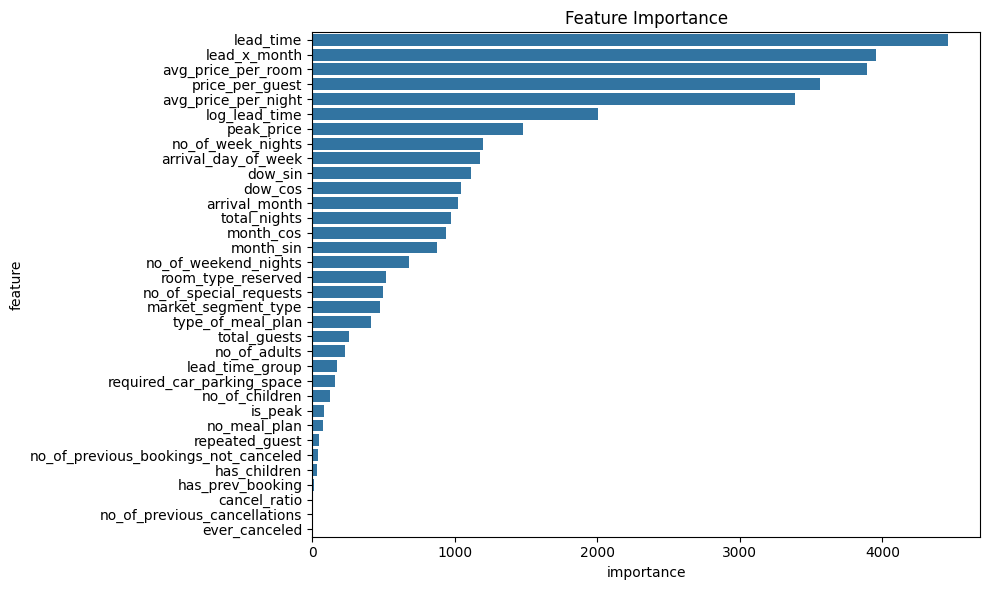

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


importances = model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

fi_df = fi_df.sort_values(by="importance", ascending=False)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


## 중요도가 높은 피쳐만 선택

In [ ]:
importances = model.feature_importances_
feature_names = X_train.columns
feature_importance = pd.DataFrame({"feature": feature_names, "importance": importances})
feature_importance = feature_importance.sort_values(by="importance", ascending=False)
feature_importance.head()

,feature,importance
7,lead_time,6493
32,lead_x_month,5555
13,avg_price_per_room,5203
29,price_per_guest,5181
17,avg_price_per_night,5140


In [ ]:
top_features = feature_importance.head(22)["feature"].tolist()
top_features

['lead_time',
 'lead_x_month',
 'avg_price_per_room',
 'price_per_guest',
 'avg_price_per_night',
 'log_lead_time',
 'peak_price',
 'arrival_day_of_week',
 'dow_sin',
 'no_of_week_nights',
 'dow_cos',
 'arrival_month',
 'total_nights',
 'month_cos',
 'month_sin',
 'no_of_weekend_nights',
 'room_type_reserved',
 'no_of_special_requests',
 'type_of_meal_plan',
 'market_segment_type',
 'total_guests',
 'no_of_adults']

In [ ]:
X_train_2 = X_train[top_features]
X_test_2 = X_test[top_features]

In [ ]:
X_tr_2, X_val_2, y_tr_2, y_val_2 = train_test_split(X_train_2, y_train, test_size=0.2, random_state=42)

### Model Fitting

In [ ]:
model_2 = LGBMClassifier(
    **best_hyp,
    random_state=42,
    scale_pos_weight= class_weight
)

In [ ]:
model_2.fit(X_train_2,y_train, eval_set = [(X_val_2, y_val_2)], eval_metric='auc',
            callbacks = ([early_stopping(stopping_rounds=50), log_evaluation(period=80)]))

[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] Number of positive: 9373, number of negative: 19617
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.024203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1887
[LightGBM] [Info] Number of data points in the train set: 28990, number of used features: 22
[LightGBM] [Warning] Unknown parameter: n_estimator
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323318 -> initscore=-0.738563
[LightGBM] [Info] Start training from score -0.738563
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[80]	valid_0's auc: 0.97313	valid_0's binary_logloss: 0.235396
[L

LGBMClassifier(colsample_bytree=0.6070063963448249,
               learning_rate=0.05882945808447486, max_depth=12,
               min_child_samples=17, n_estimator=1500, n_estimators=402,
               num_leaves=132, random_state=42, reg_alpha=0.03038705969683686,
               reg_lambda=0.9309486955069778,
               scale_pos_weight=np.float64(2.0929264909847434),
               subsample=0.8758107004126244)

In [ ]:
model_2.best_iteration_

402

### Evaluate

In [ ]:
y_pred2 = model_2.predict(X_test_2)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred2)
fbeta = fbeta_score(y_test, y_pred2, beta=0.66)
conf = confusion_matrix(y_test, y_pred2)

print('#####LGBM(feature selection)#####')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####LGBM(feature selection)#####
Accuracy: 0.82560706401766
Precision: 0.8193515182707154
F-Beta(beta=0.66): 0.7532436132619773
confusion matrix:
 [[4392  351]
 [ 913 1592]]


## **2차 전처리 이용**

In [ ]:
df_lgbm = hotel.copy()

df_lgbm["room_type_reserved"] = df_lgbm["room_type_reserved"].astype("category")
df_lgbm['type_of_meal_plan'] = df_lgbm['type_of_meal_plan'].astype('category')
df_lgbm["arrival_weekday"] = df_lgbm["arrival_date_full"].dt.weekday.astype("category")
df_lgbm["arrival_month"] = df_lgbm["arrival_date_full"].dt.month.astype("category")

In [ ]:
df_sorted = df_lgbm.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train = (train_df['booking_status'] == 'Canceled').astype(int)

X_test = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test = (test_df['booking_status'] == 'Canceled').astype(int)

In [ ]:
X_tr, X_te = transform_with_knn_env(
    X_train=X_train, y_train=y_train, X_test=X_test,
    env_features=["type_of_meal_plan","required_car_parking_space","room_type_reserved","no_of_special_requests"],
    k=10
)

In [ ]:
# 클래스 불균형 해소
class_weight = (y_train == 0).sum() / (y_train ==1).sum()
class_weight

np.float64(2.0929264909847434)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform

# 파라미터 범위
param_dist = {
    "n_estimators": randint(100, 1500),
    "learning_rate": uniform(0.01, 0.2),
    "max_depth": randint(3, 15),
    "num_leaves": randint(20, 150),
    "min_child_samples": randint(10, 100),
    "subsample": uniform(0.6, 0.4),
    "colsample_bytree": uniform(0.6, 0.4),
    "reg_alpha": uniform(0, 1),
    "reg_lambda": uniform(0, 1)
}

# 모델 정의
model = LGBMClassifier(
    random_state=42,
    scale_pos_weight= class_weight
)

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    scoring="roc_auc",
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)

print("Best Params:", random_search.best_params_)
print("Best CV Score:", random_search.best_score_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[LightGBM] [Info] Number of positive: 9373, number of negative: 19617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009881 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 28990, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323318 -> initscore=-0.738563
[LightGBM] [Info] Start training from score -0.738563
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Ligh

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

### **Model Fitting**

In [ ]:
model = LGBMClassifier(
    **random_search.best_params_,
    random_state=42,
    scale_pos_weight= class_weight
)

In [ ]:
from lightgbm import early_stopping, log_evaluation

In [ ]:
model.fit(X_train, y_train, eval_set = [(X_val, y_val)], eval_metric='auc',
          callbacks=[early_stopping(stopping_rounds=50), log_evaluation(period=80)])

[LightGBM] [Info] Number of positive: 9373, number of negative: 19617
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006541 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1993
[LightGBM] [Info] Number of data points in the train set: 28990, number of used features: 35
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323318 -> initscore=-0.738563
[LightGBM] [Info] Start training from score -0.738563
Training until validation scores don't improve for 50 rounds
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightG

LGBMClassifier(colsample_bytree=np.float64(0.6364008364205321),
               learning_rate=np.float64(0.15527940653004565), max_depth=11,
               min_child_samples=47, n_estimators=1083, num_leaves=98,
               random_state=42, reg_alpha=np.float64(0.39654278232127016),
               reg_lambda=np.float64(0.6220867002278735),
               scale_pos_weight=np.float64(2.0929264909847434),
               subsample=np.float64(0.9449454834986981))

In [ ]:
model.best_iteration_

1078

### Evaluate

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, confusion_matrix

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
fbeta = fbeta_score(y_test, y_pred, beta=0.66)
conf = confusion_matrix(y_test, y_pred)

print('#####LGBM(KNN 적용)#####')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####LGBM(KNN 적용)#####
Accuracy: 0.8016004415011038
Precision: 0.7952407304925291
F-Beta(beta=0.66): 0.7118117658749739
confusion matrix:
 [[4373  370]
 [1068 1437]]


### Feature Importance

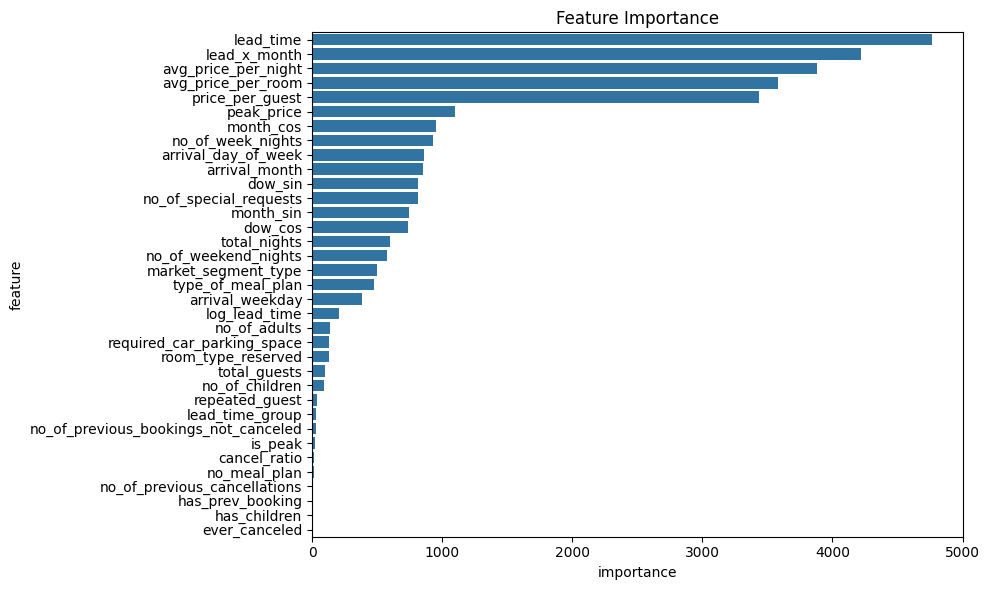

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


importances = model.feature_importances_
feature_names = X_train.columns

fi_df = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
})

fi_df = fi_df.sort_values(by="importance", ascending=False)

# 시각화
plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=fi_df)
plt.title("Feature Importance")
plt.tight_layout()
plt.show()


### 1차 모델링 _ SVC

1. 스케일링, 로그 변환
2. 이상치 제거!


In [ ]:
df_svc = hotel.copy()

 ## 이상치 제거
df_svc = df_svc[df_svc["avg_price_per_room"] < 500]

## 로그 변환
for col in ["lead_time", "no_of_previous_cancellations", "no_of_previous_bookings_not_canceled", "no_of_children"]:
    df_svc[col] = np.log1p(df_svc[col])

X_svc = df_svc.drop(columns=["booking_status","arrival_date_full"])
y_svc = (df_svc["booking_status"] == "Canceled").astype(int)

X_tr_svc, X_te_svc, y_tr_svc, y_te_svc = train_test_split(X_svc, y_svc, test_size=0.2, random_state=42)

X_tr_svc, X_te_svc = transform_with_knn_env(
    X_tr_svc, y_tr_svc, X_te_svc,
    env_features=["type_of_meal_plan","required_car_parking_space","room_type_reserved","no_of_special_requests"],
    k=10
)

## 스케일링
scaler = StandardScaler()

num_cols_svc = [
    "no_of_adults","no_of_children","no_of_weekend_nights","no_of_week_nights",
    "lead_time","avg_price_per_room","total_nights","avg_price_per_night",
    "total_guests","cancel_ratio","no_of_special_requests"
]

for c in ["env_cancel_rate", "env_avg_price"]:
    if c in X_tr_svc.columns:
        num_cols_svc.append(c)

num_cols_svc = [c for c in num_cols_svc if c in X_tr_svc.columns]

X_tr_svc.loc[:, num_cols_svc] = scaler.fit_transform(X_tr_svc[num_cols_svc])
X_te_svc.loc[:, num_cols_svc] = scaler.transform(X_te_svc[num_cols_svc])

X_svc_train, X_svc_test, y_svc_train, y_svc_test = X_tr_svc, X_te_svc, y_tr_svc, y_te_svc

/tmp/ipython-input-244587835.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.30472003 -1.6277956   0.30472003 ...  2.23723566  0.30472003
 -1.6277956 ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_tr_svc.loc[:, num_cols_svc] = scaler.fit_transform(X_tr_svc[num_cols_svc])
/tmp/ipython-input-244587835.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[ 0.22263076  0.22263076 -0.92635322 ... -0.92635322 -0.92635322
 -0.92635322]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  X_tr_svc.loc[:, num_cols_svc] = scaler.fit_transform(X_tr_svc[num_cols_svc])
/tmp/ipython-input-244587835.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[-0.14509919 -0.14509919 -0.14509919 ... -0.14

## 1차 모델링 _ CatBoost

1. 스케일링, 이상치 제거 필요 없음
2. 카테고리 변수 자동 처리!
3. 파생변수 모두 사용

In [ ]:
df_cb = hotel.copy()

In [ ]:
cat_features = ["type_of_meal_plan", "room_type_reserved", "market_segment_type",
                "required_car_parking_space", "repeated_guest", "lead_time_group"]


X_cb = df_cb.drop(columns=["booking_status","arrival_date_full"])
y_cb = (df_cb["booking_status"] == "Canceled").astype(int)

## 2차 모델링 _ Random Forest

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score
)
import pandas as pd

# ----- 데이터 준비 -----
# Drop the 'arrival_date_full' column as it's a datetime object and not suitable for the model
X = hotel.drop(columns=["booking_status", "arrival_date_full"], errors='ignore')
y = hotel["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})


# train/test 분할 (층화 샘플링)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- 모델 정의 -----
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    min_samples_split=5,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

# ----- 학습 -----
rf.fit(X_train, y_train)

# ----- 예측 -----
y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]  # ROC AUC 계산용 확률값

# ----- 평가 -----
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
fb = fbeta_score(y_test, y_pred, beta=7/3)  # β = 7/3 사용

roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8979028697571744
Precision: 0.8619469026548673
Recall: 0.8198653198653199
F2.3333333333333335 Score (β = 7/3): 0.8261238337574215
ROC AUC Score: 0.9539094765387869


### 최적 threshold 찾기

In [ ]:
from sklearn.metrics import precision_score, recall_score, fbeta_score

def evaluate_threshold(y_true, y_proba, beta=7/3):
    thresholds = np.linspace(0.0, 1.0, 200)
    best_threshold = 0.5
    best_prec = 0
    best_fbeta = 0

    for t in thresholds:
        y_pred = (y_proba >= t).astype(int)
        prec = precision_score(y_true, y_pred)
        rec = recall_score(y_true, y_pred)
        fbeta = fbeta_score(y_true, y_pred, beta=beta)

        # 조건: precision과 fbeta 둘 다 기존보다 높아야 함
        if prec > best_prec and fbeta > best_fbeta:
            best_prec = prec
            best_fbeta = fbeta
            best_threshold = t

    return best_threshold, best_prec, best_fbeta

### rf의 최적

In [ ]:
best_t, best_p, best_f = evaluate_threshold(y_test, y_proba)
print(f"Best Threshold: {best_t:.3f}")
print(f"Precision at Best Threshold: {best_p:.3f}")
print(f"Fβ Score at Best Threshold: {best_f:.3f}")

Best Threshold: 0.201
Precision at Best Threshold: 0.645
Fβ Score at Best Threshold: 0.884


### 시각화

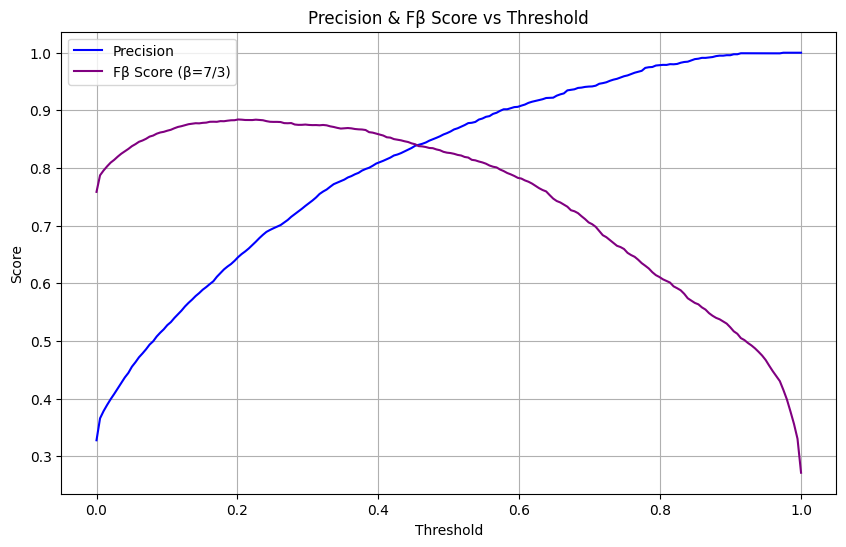

In [ ]:
import matplotlib.pyplot as plt

thresholds = np.linspace(0.0, 1.0, 200)
precisions = []
fb_scores = []

for t in thresholds:
    y_pred = (y_proba >= t).astype(int)
    precisions.append(precision_score(y_test, y_pred))
    fb_scores.append(fbeta_score(y_test, y_pred, beta=7/3))

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precisions, label="Precision", color="blue")
plt.plot(thresholds, fb_scores, label="Fβ Score (β=7/3)", color="purple")
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision & Fβ Score vs Threshold")
plt.legend()
plt.grid(True)
plt.show()


precision, f beta 모두 고려

In [ ]:
# ----- 예측 -----
y_proba = rf.predict_proba(X_test)[:, 1]  # ROC AUC 계산용 확률값
threshold = 0.201
y_pred_thresh = (y_proba >= threshold).astype(int)

# ----- 평가 -----
acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)  # β = 7/3 사용
roc_auc = roc_auc_score(y_test, y_proba)  # ROC AUC는 threshold와 무관

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8123620309050773
Precision: 0.645475372279496
Recall: 0.9486531986531986
F2.3333333333333335 Score (β = 7/3): 0.8842085328571817
ROC AUC Score: 0.9539094765387869


### RF 기본에 precision 기준 최적 (여기)

In [ ]:
# ----- 예측 -----
y_proba = rf.predict_proba(X_test)[:, 1]  # ROC AUC 계산용 확률값
threshold = 0.645
y_pred_thresh = (y_proba >= threshold).astype(int)

# ----- 평가 -----
acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)  # β = 7/3 사용
roc_auc = roc_auc_score(y_test, y_proba)  # ROC AUC는 threshold와 무관

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8901766004415012
Precision: 0.9220085470085471
Recall: 0.7264309764309764
F2.3333333333333335 Score (β = 7/3): 0.7511555315445105
ROC AUC Score: 0.9539094765387869


f beta 기준 최적

In [ ]:
# ----- 예측 -----
y_proba = rf.predict_proba(X_test)[:, 1]  # ROC AUC 계산용 확률값
threshold = 0.884
y_pred_thresh = (y_proba >= threshold).astype(int)

# ----- 평가 -----
acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)  # β = 7/3 사용
roc_auc = roc_auc_score(y_test, y_proba)  # ROC AUC는 threshold와 무관

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8340231788079471
Precision: 0.9949367088607595
Recall: 0.4962121212121212
F2.3333333333333335 Score (β = 7/3): 0.5380638764959988
ROC AUC Score: 0.9539094765387869


### **Random Forest smote, randomsearch,precision&fbeta 고려한 threshold**

둘 다 최적

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

X = hotel.drop(columns=["booking_status", "arrival_date_full"], errors='ignore')
y = hotel["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

param_dist = {
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='precision',  # precision 중심 튜닝
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

threshold = 0.201
y_pred_thresh = (y_proba >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.8036699779249448
Precision: 0.6338107273237854
Recall: 0.9499158249158249
F2.3333333333333335 Score (β = 7/3): 0.8816821913748629
ROC AUC Score: 0.9545125412582309


### RF smote, randomsearch, threshold 고려 (여기)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

X = hotel.drop(columns=["booking_status", "arrival_date_full"], errors='ignore')
y = hotel["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

param_dist = {
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='precision',  # precision 중심 튜닝
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

threshold = 0.645
y_pred_thresh = (y_proba >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.8967991169977925
Precision: 0.9102822580645161
Recall: 0.76010101010101
F2.3333333333333335 Score (β = 7/3): 0.780071492403932
ROC AUC Score: 0.9545125412582309


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, fbeta_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
import pandas as pd
import numpy as np

X = hotel.drop(columns=["booking_status", "arrival_date_full"], errors='ignore')
y = hotel["booking_status"].map({"Canceled": 1, "Not_Canceled": 0})

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipe = Pipeline([
    ('smote', SMOTE(random_state=42)),
    ('rf', RandomForestClassifier(class_weight='balanced', random_state=42))
])

param_dist = {
    'rf__n_estimators': [100, 200, 300, 400],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4]
}

search = RandomizedSearchCV(
    pipe,
    param_distributions=param_dist,
    n_iter=20,
    scoring='precision',  # precision 중심 튜닝
    cv=3,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

search.fit(X_train, y_train)

best_model = search.best_estimator_
y_proba = best_model.predict_proba(X_test)[:, 1]

threshold = 0.884
y_pred_thresh = (y_proba >= threshold).astype(int)

acc = accuracy_score(y_test, y_pred_thresh)
prec = precision_score(y_test, y_pred_thresh)
rec = recall_score(y_test, y_pred_thresh)
fb = fbeta_score(y_test, y_pred_thresh, beta=7/3)
roc_auc = roc_auc_score(y_test, y_proba)

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print(f"F{7/3} Score (β = 7/3):", fb)
print("ROC AUC Score:", roc_auc)

Fitting 3 folds for each of 20 candidates, totalling 60 fits
Accuracy: 0.8377483443708609
Precision: 0.9918032786885246
Recall: 0.5092592592592593
F2.3333333333333335 Score (β = 7/3): 0.5508461272801483
ROC AUC Score: 0.9545125412582309


## 2차 모델링 _ Stacking

### Stacking (LGBM + RF + LogisticRegression / LogisticRegression)

#### **preprocessing**

In [ ]:
numeric_cols = [
    "no_of_adults", "no_of_children", "no_of_weekend_nights","no_of_week_nights",
    "lead_time","no_of_previous_cancellations","no_of_previous_bookings_not_canceled",
    "avg_price_per_room","total_nights","avg_price_per_night",
    "total_guests","cancel_ratio","price_per_guest","peak_price",
    "log_lead_time","month_sin","month_cos","dow_sin","dow_cos"
]

categorical_cols = [
    "type_of_meal_plan", "required_car_parking_space", "room_type_reserved",
    "market_segment_type","repeated_guest", "no_of_special_requests",
    "lead_time_group","has_children","has_prev_booking",
    "is_peak","no_meal_plan","lead_x_month","ever_canceled"
]


In [ ]:
df2 = hotel.copy()

df2 = df2.drop(columns=['arrival_month'])

## 이상치 제거
df2 = df2[df2["avg_price_per_room"] < 500]

## 로그 변환
for col in ["lead_time", "no_of_previous_cancellations",
            "no_of_previous_bookings_not_canceled", "no_of_children"]:
    df2[col] = np.log1p(df2[col])


In [ ]:
## train_test_split
df_sorted = df2.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_tr = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_tr = (train_df['booking_status'] == 'Canceled').astype(int)

X_te = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_te = (test_df['booking_status'] == 'Canceled').astype(int)

In [ ]:
## KNN 적용
X_tr, X_te = transform_with_knn_env(
    X_train=X_tr, y_train=y_tr, X_test=X_te,
    env_features=["type_of_meal_plan","required_car_parking_space","room_type_reserved","no_of_special_requests"],
    k=10
)

In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


X_tr = preprocessor.fit_transform(X_tr)
X_te = preprocessor.transform(X_te)

In [ ]:
# sparse → DataFrame
feature_names = preprocessor.get_feature_names_out()

X_tr = pd.DataFrame(X_tr.toarray(), columns=feature_names)
X_te = pd.DataFrame(X_te.toarray(), columns=feature_names)

#### **Base Model**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds=5):
    kf = KFold(n_splits=n_folds, shuffle=True, random_state=42)
    train_fold_pred = np.zeros((X_train_n.shape[0], 1))
    test_pred = np.zeros((X_test_n.shape[0], n_folds))

    print(model.__class__.__name__, "model 시작")

    for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
        X_tr = X_train_n[train_index]
        y_tr = y_train_n[train_index]
        X_val = X_train_n[valid_index]

        model.fit(X_tr, y_tr)
        train_fold_pred[valid_index, :] = model.predict(X_val).reshape(-1, 1)
        test_pred[:, folder_counter] = model.predict(X_test_n)

    test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)
    return train_fold_pred, test_pred_mean

In [ ]:
# 클래스 불균형 해소
class_weight = (y_tr == 0).sum() / (y_tr ==1).sum()
class_weight

np.float64(2.0931498079385404)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=300, class_weight="balanced",
                                  random_state=42)
lgbm_model = LGBMClassifier(n_estimators=400, learning_rate=0.05, scale_pos_weight= class_weight,
                            max_depth= 12, min_child_samples= 17, random_state=42)
lr_model = LogisticRegression(max_iter=1000, C=1, penalty='l2',
                              solver='lbfgs', random_state=42)

In [ ]:
train_rf, test_rf = get_stacking_base_datasets(rf_model, X_tr.values, y_tr.values, X_te.values)
train_lgb, test_lgb = get_stacking_base_datasets(lgbm_model, X_tr.values, y_tr.values, X_te.values)
train_lr, test_lr = get_stacking_base_datasets(lr_model, X_tr.values, y_tr.values, X_te.values)

RandomForestClassifier model 시작
LGBMClassifier model 시작
[LightGBM] [Info] Number of positive: 7504, number of negative: 15687
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010949 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2520
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 440
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.323574 -> initscore=-0.737396
[LightGBM] [Info] Start training from score -0.737396
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] 

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 7448, number of negative: 15743
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007316 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2533
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 446
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321159 -> initscore=-0.748450
[LightGBM] [Info] Start training from score -0.748450
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 7532, number of negative: 15659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007396 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2538
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 447
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324781 -> initscore=-0.731885
[LightGBM] [Info] Start training from score -0.731885
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 7487, number of negative: 15704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008260 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2539
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 448
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322841 -> initscore=-0.740747
[LightGBM] [Info] Start training from score -0.740747
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 7517, number of negative: 15675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007158 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 23192, number of used features: 441
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324120 -> initscore=-0.734900
[LightGBM] [Info] Start training from score -0.734900
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LogisticRegression model 시작


#### **Meta Model**

In [ ]:
stack_x = np.concatenate((train_rf, train_lgb, train_lr), axis=1)
stack_x_test = np.concatenate((test_rf, test_lgb, test_lr), axis=1)

meta_model = LogisticRegression(max_iter=1000, C=1, penalty='l2',
                                solver='lbfgs', random_state=42)
meta_model.fit(stack_x, y_tr)

LogisticRegression(C=1, max_iter=1000, random_state=42)

#### **Evaluation**

In [ ]:
y_test_pred = meta_model.predict(stack_x_test)

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, confusion_matrix

accuracy = accuracy_score(y_te, y_test_pred)
precision = precision_score(y_te, y_test_pred)
fbeta = fbeta_score(y_te, y_test_pred, beta=0.66)
conf = confusion_matrix(y_te, y_test_pred)

print('#####스태킹(LGBM+LR+RF/LR)#####')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####스태킹(LGBM+LR+RF/LR)#####
Accuracy: 0.8258830022075055
Precision: 0.8796579108124618
F-Beta(beta=0.66): 0.7577452790836963
confusion matrix:
 [[4546  197]
 [1065 1440]]


#### **Evaluation** (threshold 조정)

In [ ]:
# 확률 출력
y_proba = meta_model.predict_proba(stack_x_test)[:, 1]

threshold = 0.82
y_pred_th = (y_proba >= threshold).astype(int)

# 평가
accuracy = accuracy_score(y_te, y_pred_th)
precision = precision_score(y_te, y_pred_th)
fbeta = fbeta_score(y_te, y_pred_th, beta=0.66)
conf = confusion_matrix(y_te, y_pred_th)

print('#####스태킹(LGBM+LR+RF/LR)#####')
print('-------threshold=0.82-------')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####스태킹(LGBM+LR+RF/LR)#####
-------threshold=0.82-------
Accuracy: 0.8187086092715232
Precision: 0.9042769857433809
F-Beta(beta=0.66): 0.7457435482248113
confusion matrix:
 [[4602  141]
 [1173 1332]]


## **Ensemble**

#### **preprocessing**

In [ ]:
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import log_loss
from itertools import product
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
numeric_cols = [
    "no_of_adults", "no_of_children", "no_of_weekend_nights","no_of_week_nights",
    "lead_time","no_of_previous_cancellations","no_of_previous_bookings_not_canceled",
    "avg_price_per_room","total_nights","avg_price_per_night",
    "total_guests","cancel_ratio","price_per_guest","peak_price",
    "log_lead_time","month_sin","month_cos","dow_sin","dow_cos"
]

categorical_cols = [
    "type_of_meal_plan", "required_car_parking_space", "room_type_reserved",
    "market_segment_type","repeated_guest", "no_of_special_requests",
    "lead_time_group","has_children","has_prev_booking",
    "is_peak","no_meal_plan","lead_x_month","ever_canceled"
]


In [ ]:
df3 = hotel.copy()

df3 = df3.drop(columns=['arrival_month'])

## 이상치 제거
df3 = df3[df3["avg_price_per_room"] < 500]

## 로그 변환
for col in ["lead_time", "no_of_previous_cancellations",
            "no_of_previous_bookings_not_canceled", "no_of_children"]:
    df3[col] = np.log1p(df3[col])


In [ ]:
## train_test_split
df_sorted = df3.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_tr = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_tr = (train_df['booking_status'] == 'Canceled').astype(int)

X_te = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_te = (test_df['booking_status'] == 'Canceled').astype(int)

In [ ]:
## KNN 적용
X_tr, X_te = transform_with_knn_env(
    X_train=X_tr, y_train=y_tr, X_test=X_te,
    env_features=["type_of_meal_plan","required_car_parking_space","room_type_reserved","no_of_special_requests"],
    k=10
)

In [ ]:
preprocessor = ColumnTransformer([
    ("num", StandardScaler(), numeric_cols),
    ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_cols)
])


X_tr = preprocessor.fit_transform(X_tr)
X_te = preprocessor.transform(X_te)

In [ ]:
# sparse → DataFrame
feature_names = preprocessor.get_feature_names_out()

X_tr = pd.DataFrame(X_tr.toarray(), columns=feature_names)
X_te = pd.DataFrame(X_te.toarray(), columns=feature_names)

#### **model fitting**

In [ ]:
def get_oof_proba(model, X, y, X_test, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)
    oof_proba = np.zeros((X.shape[0],))   # train OOF prob
    test_proba = np.zeros((X_test.shape[0], n_splits))  # test pred per fold

    for i, (train_idx, valid_idx) in enumerate(kf.split(X)):
        X_train, X_val = X[train_idx], X[valid_idx]
        y_train, y_val = y[train_idx], y[valid_idx]

        print(model, 'fitting 시작')
        model.fit(X_train, y_train)
        oof_proba[valid_idx] = model.predict_proba(X_val)[:, 1]
        test_proba[:, i] = model.predict_proba(X_test)[:, 1]
        print(model, 'fitting 완료')

    return oof_proba, test_proba.mean(axis=1)

In [ ]:
rf_model = RandomForestClassifier(n_estimators=500, class_weight="balanced",
                                  random_state=42)
lgbm_model = LGBMClassifier(n_estimators=500, learning_rate=0.05, scale_pos_weight= class_weight,
                            max_depth= 12, min_child_samples= 17, random_state=42)
lr_model = LogisticRegression(max_iter=1000, C=1, penalty='l2',
                              solver='lbfgs', random_state=42)

In [ ]:
oof_rf, test_rf = get_oof_proba(rf_model, X_tr.values, y_tr.values, X_te.values)
oof_lgb, test_lgb = get_oof_proba(lgbm_model, X_tr.values, y_tr.values, X_te.values)
oof_lr, test_lr = get_oof_proba(lr_model, X_tr.values, y_tr.values, X_te.values)

RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 시작
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 완료
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 시작
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 완료
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 시작
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 완료
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 시작
RandomForestClassifier(class_weight='balanced', n_estimators=500,
                       random_state=42) fitting 완료
RandomForestClassifier(class_weight='balanced', n_estimators=500

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 완료
LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 시작
[LightGBM] [Info] Number of positive: 7448, number of negative: 15743
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007336 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2533
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 446
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.321159 -> initscore=-0.748450
[LightGBM] [Info] Start training from score -0.748450
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 완료
LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 시작
[LightGBM] [Info] Number of positive: 7532, number of negative: 15659
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.010943 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2538
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 447
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324781 -> initscore=-0.731885
[LightGBM] [Info] Start training from score -0.731885
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 완료
LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 시작
[LightGBM] [Info] Number of positive: 7487, number of negative: 15704
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007559 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2539
[LightGBM] [Info] Number of data points in the train set: 23191, number of used features: 448
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.322841 -> initscore=-0.740747
[LightGBM] [Info] Start training from score -0.740747
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 완료
LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 시작
[LightGBM] [Info] Number of positive: 7517, number of negative: 15675
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007245 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2526
[LightGBM] [Info] Number of data points in the train set: 23192, number of used features: 441
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.324120 -> initscore=-0.734900
[LightGBM] [Info] Start training from score -0.734900
[LightGBM] [Warning] No further splits with positi

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LGBMClassifier(learning_rate=0.05, max_depth=12, min_child_samples=17,
               n_estimators=500, random_state=42,
               scale_pos_weight=np.float64(2.0931498079385404)) fitting 완료
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 시작
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 완료
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 시작
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 완료
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 시작
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 완료
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 시작
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 완료
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 시작
LogisticRegression(C=1, max_iter=1000, random_state=42) fitting 완료


In [ ]:
best_score = 999
best_w = None

for w_rf, w_lgb, w_lr in product([0.1,0.2,0.3,0.4,0.5,0.6], repeat=3):
    if abs((w_rf+w_lgb+w_lr) - 1.0) > 1e-6:
        continue

    # Train (OOF)
    blend_train = w_rf*oof_rf + w_lgb*oof_lgb + w_lr*oof_lr
    score = log_loss(y_tr, blend_train)

    if score < best_score:
        best_score = score
        best_w = (w_rf, w_lgb, w_lr)

print("최적 가중치:", best_w, "OOF LogLoss:", best_score)

최적 가중치: (0.6, 0.3, 0.1) OOF LogLoss: 0.25620315697391016


In [ ]:
final_test_proba = best_w[0]*test_rf + best_w[1]*test_lgb + best_w[2]*test_lr
y_test_pred = (final_test_proba >= 0.5).astype(int)

#### **Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, fbeta_score, confusion_matrix

accuracy = accuracy_score(y_te, y_test_pred)
precision = precision_score(y_te, y_test_pred)
fbeta = fbeta_score(y_te, y_test_pred, beta=0.66)
conf = confusion_matrix(y_te, y_test_pred)

print('#####가중치앙상블(LGBM+LR+RF)#####')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####가중치앙상블(LGBM+LR+RF)#####
Accuracy: 0.8302980132450332
Precision: 0.8783382789317508
F-Beta(beta=0.66): 0.7653284479597491
confusion matrix:
 [[4538  205]
 [1025 1480]]


#### **Evaluation** (threshold 조정)

In [ ]:
final_test_proba = best_w[0]*test_rf + best_w[1]*test_lgb + best_w[2]*test_lr
threshold = 0.63
y_test_th = (final_test_proba >= threshold).astype(int)

# 평가
accuracy = accuracy_score(y_te, y_test_th)
precision = precision_score(y_te, y_test_th)
fbeta = fbeta_score(y_te, y_test_th, beta=0.66)
conf = confusion_matrix(y_te, y_test_th)

print('#####가중치앙상블(LGBM+LR+RF)#####')
print('----------threshold=0.65----------')
print("Accuracy:", accuracy)
print("Precision:", precision)
print("F-Beta(beta=0.66):", fbeta)
print("confusion matrix:\n", conf)

#####가중치앙상블(LGBM+LR+RF)#####
----------threshold=0.65----------
Accuracy: 0.8097406181015453
Precision: 0.9073806078147613
F-Beta(beta=0.66): 0.727906523509428
confusion matrix:
 [[4615  128]
 [1251 1254]]


## CatBoost 단독 모델 (1)

###시간기반 split + CatBoost 학습
(early stopping은 valid만 사용)

In [ ]:
import pandas as pd
from catboost import CatBoostClassifier, Pool


df = hotel.copy()
df["arrival_date_full"] = pd.to_datetime(df["arrival_date_full"], errors="coerce")
df = df.dropna(subset=["arrival_date_full"])
df = df.sort_values("arrival_date_full").reset_index(drop=True)

y_all = (df["booking_status"] == "Canceled").astype(int)
drop_cols = ["booking_status", "arrival_date_full"]
X_all = df.drop(columns=drop_cols).copy()

cat_cols = ["type_of_meal_plan", "room_type_reserved",
            "market_segment_type", "lead_time_group",
            "required_car_parking_space", "repeated_guest"]
for c in cat_cols:
    if c in X_all.columns:
        X_all[c] = X_all[c].astype("category")


days = X_all.index.to_series()
day_series = df["arrival_date_full"].dt.normalize()
unique_days = pd.to_datetime(day_series.unique())

cut_idx = max(1, int(len(unique_days) * 0.8))
cutoff_day = unique_days[cut_idx - 1]

trval_mask = day_series <= cutoff_day
test_mask  = day_series >  cutoff_day

X_trval, y_trval = X_all[trval_mask], y_all[trval_mask]
X_test,  y_test  = X_all[test_mask],  y_all[test_mask]


day_trval = df.loc[trval_mask, "arrival_date_full"].dt.normalize()
ud_trval = pd.to_datetime(day_trval.unique())
vidx     = max(1, int(len(ud_trval) * 0.9))
val_cut  = ud_trval[vidx - 1]

train_mask = day_trval <= val_cut
valid_mask = day_trval >  val_cut

X_train, y_train = X_trval[train_mask], y_trval[train_mask]
X_valid, y_valid = X_trval[valid_mask], y_trval[valid_mask]

print(f"[Split] Train: {df.loc[X_train.index,'arrival_date_full'].min().date()} ~ "
      f"{df.loc[X_train.index,'arrival_date_full'].max().date()} (n={len(X_train)})")
print(f"[Split] Valid: {df.loc[X_valid.index,'arrival_date_full'].min().date()} ~ "
      f"{df.loc[X_valid.index,'arrival_date_full'].max().date()} (n={len(X_valid)})")
print(f"[Split] Test : {df.loc[X_test.index,'arrival_date_full'].min().date()}  ~ "
      f"{df.loc[X_test.index,'arrival_date_full'].max().date()} (n={len(X_test)})")


N  = len(y_train)
n1 = int(y_train.sum())
n0 = N - n1
class_weights = [N/(2*n0), N/(2*n1)]


cat_idx = [X_train.columns.get_loc(c) for c in cat_cols if c in X_train.columns]
train_pool = Pool(X_train, y_train, cat_features=cat_idx)
valid_pool = Pool(X_valid, y_valid, cat_features=cat_idx)
test_pool  = Pool(X_test,  y_test,  cat_features=cat_idx)


params = dict(
    iterations=500,
    depth=6,
    learning_rate=0.07,
    l2_leaf_reg=3.0,
    loss_function="Logloss",
    eval_metric="AUC",
    random_seed=42,
    early_stopping_rounds=100,
    verbose=False,
    class_weights=class_weights
)
model = CatBoostClassifier(**params)
model.fit(train_pool, eval_set=valid_pool, verbose=False)

print("best iter:", model.get_best_iteration())
print("best score(valid):", model.get_best_score())

# 테스트셋 AUC 확인만 빠르게
from sklearn.metrics import roc_auc_score
p_test = model.predict_proba(X_test)[:, 1]
print("Test AUC:", roc_auc_score(y_test, p_test))


[Split] Train: 2017-07-01 ~ 2018-07-30 (n=22590)
[Split] Valid: 2018-07-31 ~ 2018-09-12 (n=3933)
[Split] Test : 2018-09-13  ~ 2018-12-31 (n=9715)
best iter: 255
best score(valid): {'learn': {'Logloss': 0.2594525581233367}, 'validation': {'Logloss': 0.354734442411345, 'AUC': 0.9105031272225244}}
Test AUC: 0.8751320436927887


### Precision & F-beta 스코어로 테스트셋 평가

###1. 기본 세팅

In [ ]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, fbeta_score, confusion_matrix, precision_recall_curve

P_weight, R_weight = 7, 3
beta = (R_weight / P_weight) ** 0.5

p_test = model.predict_proba(X_test)[:, 1]

###2. 고정 임계값(0.50)에서의 Precision & F-β

In [ ]:
t = 0.50
pred = (p_test >= t).astype(int)

prec = precision_score(y_test, pred, zero_division=0)
rec  = recall_score(y_test, pred, zero_division=0)
fbet = fbeta_score(y_test, pred, beta=beta, zero_division=0)
cm   = confusion_matrix(y_test, pred)

print(f"[t={t:.2f}]  Precision={prec:.3f}  Recall={rec:.3f}  Fβ(β={beta:.3f})={fbet:.3f}")
print("Confusion Matrix\n", cm)


[t=0.50]  Precision=0.838  Recall=0.563  Fβ(β=0.655)=0.731
Confusion Matrix
 [[5578  407]
 [1631 2099]]


###3. F-β 최대가 되는 임계값

In [ ]:
ths = np.linspace(0, 1, 1001)
best = None
for t in ths:
    pred = (p_test >= t).astype(int)
    f = fbeta_score(y_test, pred, beta=beta, zero_division=0)
    if (best is None) or (f > best[1]):
        best = (t, f)

t_fbest, fbest = best
pred_best = (p_test >= t_fbest).astype(int)
prec_best = precision_score(y_test, pred_best, zero_division=0)
rec_best  = recall_score(y_test, pred_best, zero_division=0)
cm_best   = confusion_matrix(y_test, pred_best)

print(f"[Fβ 최대] t*={t_fbest:.3f}  Fβ={fbest:.3f}  Precision={prec_best:.3f}  Recall={rec_best:.3f}")
print("Confusion @ t*\n", cm_best)

[Fβ 최대] t*=0.335  Fβ=0.734  Precision=0.769  Recall=0.663
Confusion @ t*
 [[5241  744]
 [1257 2473]]


###4. Precision 목표치를 만족하는 최적 임계값(정밀도 우선)

제가 아래에 쓴 코드는 최소 Precision 0.80을 만족하면서 Recall을 최대화하는 임계값입니다. 필요에 따라 다르게 조정하셔도 됩니당.

In [ ]:
target_P = 0.80  # 필요에 맞게 조정
pr, rc, th = precision_recall_curve(y_test, p_test)

candidates = []
for i in range(len(th)):
    P = pr[i]
    R = rc[i]
    if P >= target_P:
        candidates.append((th[i], P, R))

if candidates:
    t_pstar, P_pstar, R_pstar = sorted(candidates, key=lambda x: x[2], reverse=True)[0]
    pred_pstar = (p_test >= t_pstar).astype(int)
    Fbeta_pstar = fbeta_score(y_test, pred_pstar, beta=beta, zero_division=0)
    print(f"[Precision≥{target_P:.2f}]  t={t_pstar:.3f}  Precision={P_pstar:.3f}  Recall={R_pstar:.3f}  Fβ={Fbeta_pstar:.3f}")
else:
    print(f"Precision≥{target_P:.2f} 를 만족하는 임계값 없음")

[Precision≥0.80]  t=0.422  Precision=0.800  Recall=0.597  Fβ=0.726


###5. 상위 k%만 ‘취소 의심’으로 태깅

In [ ]:
def precision_at_topk(p, y, k=0.10):
    """상위 k 비율만 1로 태깅했을 때의 Precision/Recall/Fβ 및 임계값"""
    n = len(p)
    topn = max(1, int(n * k))
    idx = np.argsort(-p)
    thr = p[idx][topn-1]
    pred = (p >= thr).astype(int)

    P = precision_score(y, pred, zero_division=0)
    R = recall_score(y, pred, zero_division=0)
    F = fbeta_score(y, pred, beta=beta, zero_division=0)
    return thr, P, R, F

for k in [0.05, 0.10, 0.20]:
    thr, P, R, F = precision_at_topk(p_test, y_test, k=k)
    print(f"[Top-{int(k*100)}%] t≈{thr:.3f}  Precision={P:.3f}  Recall={R:.3f}  Fβ={F:.3f}")

[Top-5%] t≈0.978  Precision=0.977  Recall=0.127  Fβ=0.326
[Top-10%] t≈0.920  Precision=0.940  Recall=0.250  Fβ=0.514
[Top-20%] t≈0.672  Precision=0.914  Recall=0.476  Fβ=0.716


Top-5% → t≈0.978, P=0.977, R=0.127, Fβ=0.326

거의 틀리지 않지만(오탐 매우 적음) 12.7%만 포착. 초정밀 극상위 위험만 잡음.

Top-10% → t≈0.920, P=0.940, R=0.250, Fβ=0.514

여전히 매우 높은 정밀도, 커버리지 25%로 두 배 확대.

Top-20% → t≈0.672, P=0.914, R=0.476, Fβ=0.716

정밀도 0.91을 유지하면서 취소의 절반 가까이 포착. 세 가지 중 Fβ 최고.

(참고로 같은 세트의 t=0.50 고정은 P=0.838, R=0.563, Fβ=0.731 이었음.
즉, 정밀도 우선이라면 Top-20%는 P를 0.91까지 끌어올리면서 여전히 넓은 커버리지를 확보하는 좋은 절충점.)

- 제 생각엔 Top-20%가 가장 균형이 좋은 것 같습니다..!!

###6. 요약 테이블

In [ ]:
import pandas as pd

rows = []

# 기본 0.5
t = 0.50
pred = (p_test >= t).astype(int)
rows.append(("Fixed@0.50", t,
             precision_score(y_test, pred, zero_division=0),
             recall_score(y_test, pred, zero_division=0),
             fbeta_score(y_test, pred, beta=beta, zero_division=0)))

# Fβ 최적
rows.append(("Fbeta-max", t_fbest, prec_best, rec_best, fbest))

# Precision 목표치 (있으면)
try:
    rows.append((f"P≥{target_P:.2f}", t_pstar, P_pstar, R_pstar, Fbeta_pstar))
except NameError:
    pass

# Top-k
for k in [0.05, 0.10, 0.20]:
    thr, P, R, F = precision_at_topk(p_test, y_test, k=k)
    rows.append((f"Top-{int(k*100)}%", thr, P, R, F))

report = pd.DataFrame(rows, columns=["Setting","Threshold","Precision","Recall",f"Fbeta(β={beta:.3f})"])
report

,Setting,Threshold,Precision,Recall,Fbeta(β=0.655)
0,Fixed@0.50,0.500000,0.837590,0.562735,0.730544
1,Fbeta-max,0.335000,0.768729,0.663003,0.733632
2,P≥0.80,0.421706,0.800144,0.596783,0.725933
3,Top-5%,0.977606,0.977366,0.127346,0.325521
4,Top-10%,0.919598,0.940464,0.249866,0.514150
5,Top-20%,0.672205,0.913580,0.476139,0.716187


Precision 최우선이라면 4.(Precision 목표치)와 5.(Top-K%) 결과가 실무적으로 가장 유용할 것 같아요!!

## CatBoost 단독 모델 _ (2)

### 추가 전처리 3차

In [ ]:
price_qcut = pd.qcut(hotel['avg_price_per_room'], q=4, labels=False, duplicates='drop')
hotel['market_price_interaction'] = hotel['market_segment_type'].astype(str) + '_' + price_qcut.astype(str)

lead_time_cut = pd.cut(hotel['lead_time'], bins=[-1, 30, 90, 800], labels=['short', 'medium', 'long'])
hotel['lead_repeat_interaction'] = lead_time_cut.astype(str) + '_' + hotel['repeated_guest'].astype(str)


for col in ['market_price_interaction', 'lead_repeat_interaction']:
    le = LabelEncoder()
    hotel[col] = le.fit_transform(hotel[col])

1차 CatBoost 모델 기반 진행

In [ ]:
import optuna
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

cat_cols = ["type_of_meal_plan", "room_type_reserved", "market_segment_type", "lead_time_group"]
class_weights = [len(y_train) / (2 * (len(y_train) - y_train.sum())), len(y_train) / (2 * y_train.sum())]

def objective(trial):
    params = {
        'objective': 'Logloss',
        'eval_metric': 'AUC',
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0,
        'random_seed': 42,
        'class_weights': class_weights
    }

    model = CatBoostClassifier(**params)
    model.fit(X_train, y_train, cat_features=cat_cols,
              eval_set=[(X_test, y_test)], early_stopping_rounds=50, verbose=False)

    preds = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, preds)
    return auc


study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=30) # 예시로 30번 시도

print("\nBest trial found:")
print(f"  Value (AUC): {study.best_value:.5f}")
print("  Params: ")
for key, value in study.best_params.items():
    print(f"    {key}: {value}")


best_params = study.best_params

[I 2025-09-23 08:20:56,906] A new study created in memory with name: no-name-6d717cc8-29c4-4a79-9d0f-08d958789b69
[I 2025-09-23 08:21:57,116] Trial 0 finished with value: 0.9484057010996666 and parameters: {'iterations': 884, 'depth': 4, 'learning_rate': 0.11499885148868973, 'l2_leaf_reg': 1.0084868812887735, 'random_strength': 3.4082754726960696e-08, 'bagging_temperature': 0.3085807258873454}. Best is trial 0 with value: 0.9484057010996666.
[I 2025-09-23 08:22:26,654] Trial 1 finished with value: 0.9526649050715142 and parameters: {'iterations': 1542, 'depth': 7, 'learning_rate': 0.186820877963484, 'l2_leaf_reg': 4.389321794727426, 'random_strength': 2.3478522617065458e-07, 'bagging_temperature': 0.322284110017129}. Best is trial 1 with value: 0.9526649050715142.
[I 2025-09-23 08:23:25,019] Trial 2 finished with value: 0.9466140002239142 and parameters: {'iterations': 1178, 'depth': 5, 'learning_rate': 0.03426104159446902, 'l2_leaf_reg': 6.145308494814105, 'random_strength': 1.0235586


Best trial found:
  Value (AUC): 0.95625
  Params: 
    iterations: 1969
    depth: 10
    learning_rate: 0.022805232370838254
    l2_leaf_reg: 9.183752823346836
    random_strength: 4.894284899035871e-05
    bagging_temperature: 0.263602794112436


In [ ]:
best_params = {
    'iterations': 1969,
    'depth': 10,
    'learning_rate': 0.022805232370838254,
    'l2_leaf_reg': 9.183752823346836,
    'random_strength': 4.894284899035871e-05,
    'bagging_temperature': 0.263602794112436,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 0,
    'class_weights': class_weights
}

final_model = CatBoostClassifier(**best_params)
final_model.fit(X_train, y_train, cat_features=cat_cols,
                eval_set=[(X_test, y_test)], early_stopping_rounds=100, verbose=False)

In [ ]:
proba = final_model.predict_proba(X_test)[:, 1]
pred = (proba >= 0.5).astype(int)

In [ ]:
print("====== 최종 모델 성능 평가 ======")
print(f"AUC       : {roc_auc_score(y_test, proba):.5f}")
print(f"PR-AUC    : {average_precision_score(y_test, proba):.5f}")
print(f"LogLoss   : {log_loss(y_test, proba):.5f}")
print(f"Accuracy  : {accuracy_score(y_test, pred):.5f}")
p, r, f, _ = precision_recall_fscore_support(y_test, pred, average="binary")
print(f"Precision : {p:.5f}")
print(f"Recall    : {r:.5f}")
print(f"F1-Score  : {f:.5f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, pred))

====== 최종 모델 성능 평가 ======
AUC       : 0.95625
PR-AUC    : 0.92846
LogLoss   : 0.25479
Accuracy  : 0.88976
Precision : 0.81252
Recall    : 0.86279
F1-Score  : 0.83691

Confusion Matrix:
[[4399  473]
 [ 326 2050]]


In [ ]:
# Feature Importance
fi = pd.DataFrame({
    'feature': X_train.columns,
    'importance': final_model.get_feature_importance()
}).sort_values('importance', ascending=False)

# SHAP Importance
train_pool_for_shap = Pool(X_train, y_train, cat_features=cat_cols)
shap_values = final_model.get_feature_importance(data=train_pool_for_shap, type="ShapValues")
shap_abs_mean = np.abs(shap_values[:, :-1]).mean(axis=0)
shap_df = pd.DataFrame({
    'feature': X_train.columns,
    'mean_abs_shap': shap_abs_mean
}).sort_values('mean_abs_shap', ascending=False)

print("====== Feature Importance (Top 10) ======")
print(fi.head(10))
print("\n====== SHAP Importance (Top 10) ======")
print(shap_df.head(10))

====== Feature Importance (Top 10) ======
                     feature  importance
14    no_of_special_requests   14.520116
13        avg_price_per_room    9.863339
34  market_price_interaction    8.833572
7                  lead_time    8.447200
31             log_lead_time    5.622361
29           price_per_guest    5.529962
32              lead_x_month    5.371469
17       avg_price_per_night    5.046163
26                 month_cos    4.775784
8              arrival_month    3.767565

====== SHAP Importance (Top 10) ======
                     feature  mean_abs_shap
14    no_of_special_requests       1.273482
7                  lead_time       0.738221
34  market_price_interaction       0.717215
13        avg_price_per_room       0.613057
31             log_lead_time       0.478801
32              lead_x_month       0.370691
8              arrival_month       0.228005
26                 month_cos       0.226378
35   lead_repeat_interaction       0.203839
29           price_per_gues

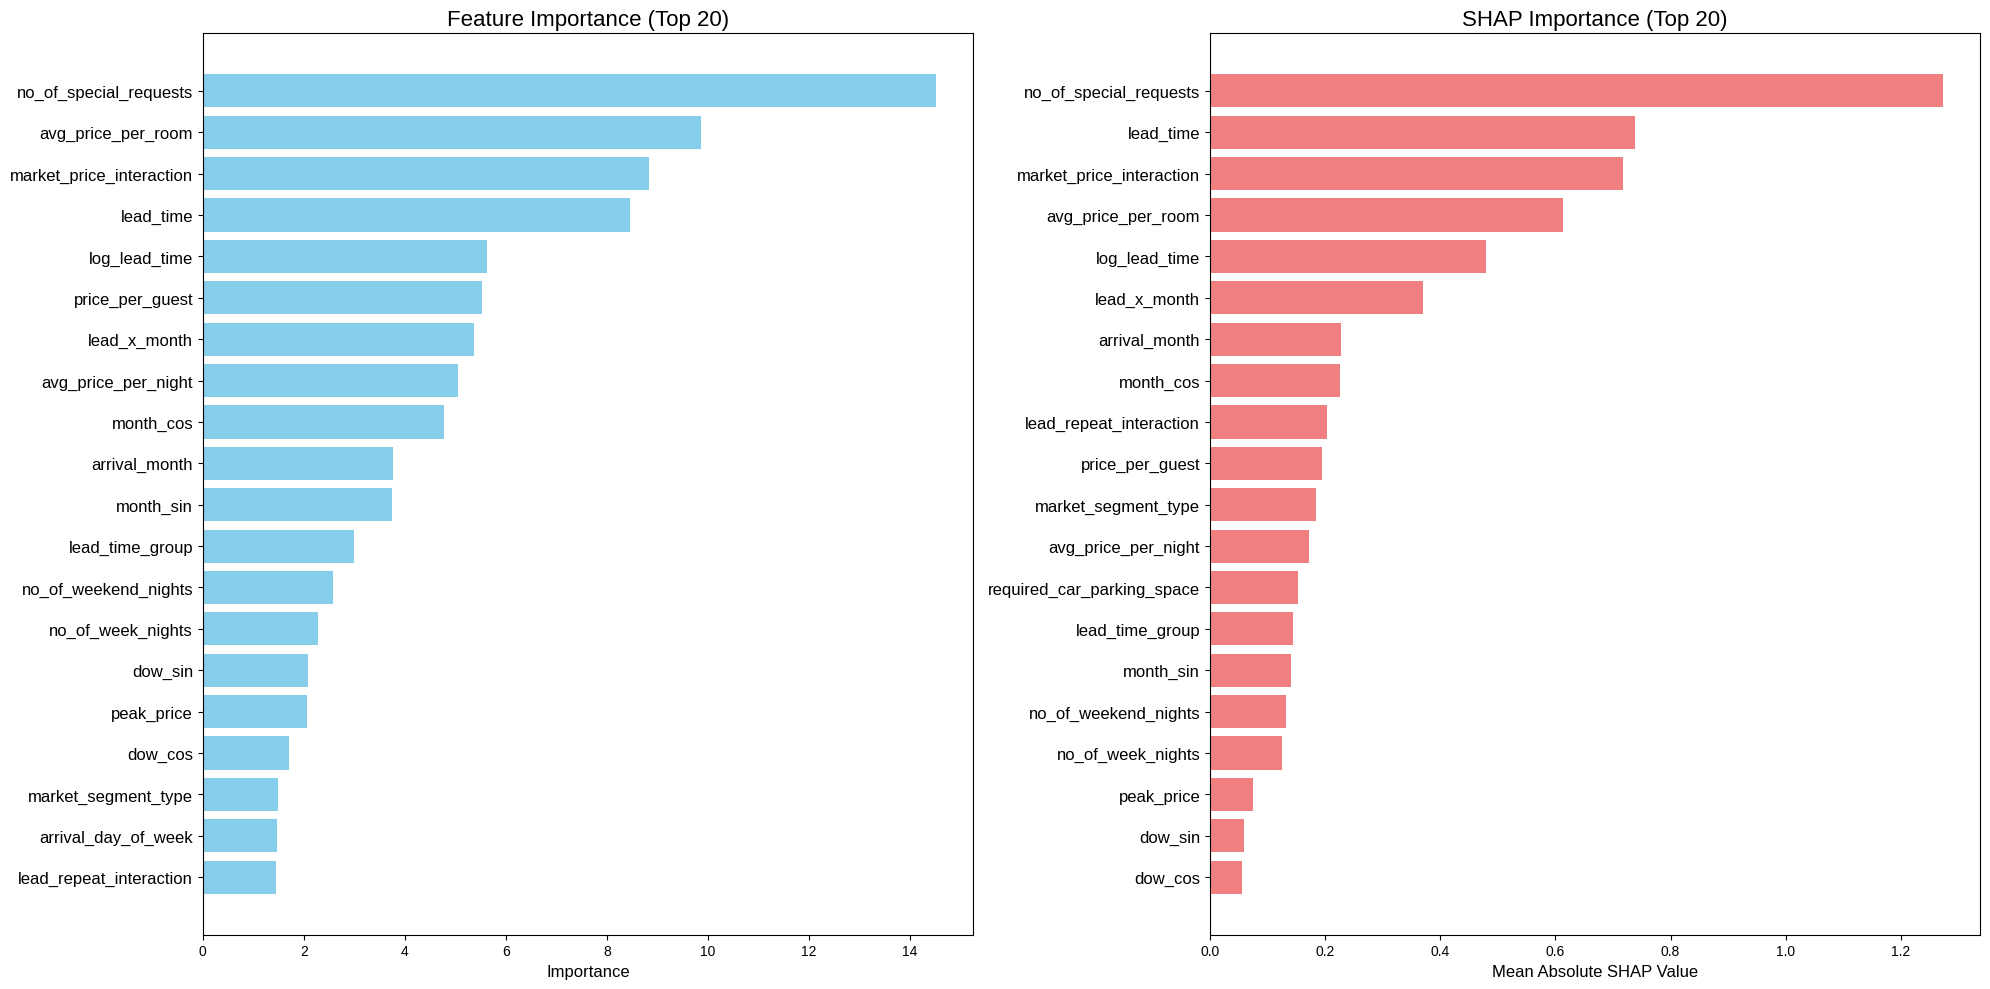

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plt.style.use('seaborn-v0_8-whitegrid')

fi_top20 = fi.head(20)
axes[0].barh(fi_top20.feature[::-1], fi_top20.importance[::-1], color='skyblue')
axes[0].set_title('Feature Importance (Top 20)', fontsize=16)
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].tick_params(axis='y', labelsize=12)

shap_top20 = shap_df.head(20)
axes[1].barh(shap_top20.feature[::-1], shap_top20.mean_abs_shap[::-1], color='lightcoral')
axes[1].set_title('SHAP Importance (Top 20)', fontsize=16)
axes[1].set_xlabel('Mean Absolute SHAP Value', fontsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

### time 기준 분할 적용 + 기존 optuna 결과

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier, Pool

from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    log_loss,
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

df_sorted = hotel.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train_ts = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train_ts = (train_df['booking_status'] == 'Canceled').astype(int)

X_test_ts = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test_ts = (test_df['booking_status'] == 'Canceled').astype(int)

cat_cols = [col for col in X_train_ts.columns if X_train_ts[col].dtype in ['category', 'object']]

N  = len(y_train_ts)
n1 = int(y_train_ts.sum())
n0 = N - n1
class_weights = [N/(2*n0), N/(2*n1)]

best_params = {
    'iterations': 1969,
    'depth': 10,
    'learning_rate': 0.022805232370838254,
    'l2_leaf_reg': 9.183752823346836,
    'random_strength': 4.894284899035871e-05,
    'bagging_temperature': 0.263602794112436,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 0,
    'class_weights': class_weights
}

final_model_ts = CatBoostClassifier(**best_params)
final_model_ts.fit(X_train_ts, y_train_ts, cat_features=cat_cols)

proba_ts = final_model_ts.predict_proba(X_test_ts)[:, 1]
pred_ts = (proba_ts >= 0.5).astype(int)

print("====== 최종 모델 성능 평가 (시간순 분할) ======")
print(f"AUC       : {roc_auc_score(y_test_ts, proba_ts):.5f}")
print(f"PR-AUC    : {average_precision_score(y_test_ts, proba_ts):.5f}")
print(f"LogLoss   : {log_loss(y_test_ts, proba_ts):.5f}")
print(f"Accuracy  : {accuracy_score(y_test_ts, pred_ts):.5f}")
p, r, f, _ = precision_recall_fscore_support(y_test_ts, pred_ts, average="binary")
print(f"Precision : {p:.5f}")
print(f"Recall    : {r:.5f}")
print(f"F1-Score  : {f:.5f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_ts, pred_ts))
print("=" * 45)


====== 최종 모델 성능 평가 (시간순 분할) ======
AUC       : 0.90434
PR-AUC    : 0.84757
LogLoss   : 0.41874
Accuracy  : 0.82699
Precision : 0.82973
Recall    : 0.62834
F1-Score  : 0.71513

Confusion Matrix:
[[4420  323]
 [ 931 1574]]


In [ ]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    log_loss,
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

df_sorted = hotel.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train_ts = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train_ts = (train_df['booking_status'] == 'Canceled').astype(int)

X_test_ts = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test_ts = (test_df['booking_status'] == 'Canceled').astype(int)

cat_cols = [col for col in X_train_ts.columns if X_train_ts[col].dtype in ['category', 'object']]

class_weights_ts = [len(y_train_ts) / (2 * (len(y_train_ts) - y_train_ts.sum())), len(y_train_ts) / (2 * y_train_ts.sum())]

def objective_ts(trial):
    params = {
        'objective': 'Logloss',
        'eval_metric': 'AUC',
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2, log=True),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1.0, 10.0, log=True),
        'random_strength': trial.suggest_float('random_strength', 1e-8, 10.0, log=True),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0.0, 1.0),
        'verbose': 0,
        'random_seed': 42,
        'class_weights': class_weights_ts
    }

    model = CatBoostClassifier(**params)

    model.fit(X_train_ts, y_train_ts, cat_features=cat_cols,
              eval_set=[(X_test_ts, y_test_ts)],
              early_stopping_rounds=50,
              verbose=False)

    preds = model.predict_proba(X_test_ts)[:, 1]
    auc = roc_auc_score(y_test_ts, preds)
    return auc

study_ts = optuna.create_study(direction='maximize')
study_ts.optimize(objective_ts, n_trials=30)

print("\nBest trial found (Time-Based Split):")
print(f"  Value (AUC): {study_ts.best_value:.5f}")
print("  Params: ")
for key, value in study_ts.best_params.items():
    print(f"    {key}: {value}")

[I 2025-09-24 07:13:30,556] A new study created in memory with name: no-name-7b44a129-a3dd-41c2-b498-08119122ac6a
[I 2025-09-24 07:13:53,450] Trial 0 finished with value: 0.8794436848419964 and parameters: {'iterations': 560, 'depth': 5, 'learning_rate': 0.023241028827877187, 'l2_leaf_reg': 1.8666782281407177, 'random_strength': 2.5692691229921125e-07, 'bagging_temperature': 0.32744650371719797}. Best is trial 0 with value: 0.8794436848419964.
[I 2025-09-24 07:14:13,196] Trial 1 finished with value: 0.8891439133118961 and parameters: {'iterations': 1263, 'depth': 6, 'learning_rate': 0.036900854855823104, 'l2_leaf_reg': 2.109255052216726, 'random_strength': 3.9979034708820824e-05, 'bagging_temperature': 0.9870179465699653}. Best is trial 1 with value: 0.8891439133118961.
[I 2025-09-24 07:14:46,364] Trial 2 finished with value: 0.9010476201297595 and parameters: {'iterations': 1023, 'depth': 9, 'learning_rate': 0.039919872884224494, 'l2_leaf_reg': 2.1827360603733976, 'random_strength': 0


Best trial found (Time-Based Split):
  Value (AUC): 0.90602
  Params: 
    iterations: 1705
    depth: 7
    learning_rate: 0.06416355921613807
    l2_leaf_reg: 8.904971618655438
    random_strength: 0.995074860691567
    bagging_temperature: 0.45831123561286374


In [ ]:
best_params_ts = study_ts.best_params

In [ ]:
import pandas as pd
import numpy as np
import optuna
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    log_loss,
    accuracy_score,
    precision_recall_fscore_support,
    confusion_matrix
)

df_sorted = hotel.sort_values(by='arrival_date_full').reset_index(drop=True)

split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train_ts = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train_ts = (train_df['booking_status'] == 'Canceled').astype(int)

X_test_ts = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test_ts = (test_df['booking_status'] == 'Canceled').astype(int)

cat_cols = [col for col in X_train_ts.columns if X_train_ts[col].dtype in ['category', 'object']]

class_weights_ts = [len(y_train_ts) / (2 * (len(y_train_ts) - y_train_ts.sum())), len(y_train_ts) / (2 * y_train_ts.sum())]


In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import (
    precision_score,
    fbeta_score,
    roc_auc_score,
    average_precision_score,
    log_loss,
    accuracy_score,
    confusion_matrix
)

best_params_ts = {
    'iterations': 1705,
    'depth': 7,
    'learning_rate': 0.06416355921613807,
    'l2_leaf_reg': 8.904971618655438,
    'random_strength': 0.995074860691567,
    'bagging_temperature': 0.45831123561286374,
    'objective': 'Logloss',
    'eval_metric': 'AUC',
    'random_seed': 42,
    'verbose': 0
}

final_model_ts = CatBoostClassifier(**best_params_ts)
final_model_ts.fit(X_train_ts, y_train_ts, cat_features=cat_cols)

proba_ts = final_model_ts.predict_proba(X_test_ts)[:, 1]
pred_ts = (proba_ts >= 0.5).astype(int)

print("====== 최종 모델 성능 평가 (시간순 분할) ======")
print(f"AUC        : {roc_auc_score(y_test_ts, proba_ts):.5f}")
print(f"PR-AUC     : {average_precision_score(y_test_ts, proba_ts):.5f}")
print(f"LogLoss    : {log_loss(y_test_ts, proba_ts):.5f}")
print(f"Accuracy   : {accuracy_score(y_test_ts, pred_ts):.5f}")

precision = precision_score(y_test_ts, pred_ts)
print(f"Precision  : {precision:.5f}")

fbeta = fbeta_score(y_test_ts, pred_ts, beta=0.666)
print(f"F-beta (0.666) : {fbeta:.5f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_ts, pred_ts))
print("=" * 45)

====== 최종 모델 성능 평가 (시간순 분할) ======
AUC        : 0.90422
PR-AUC     : 0.84478
LogLoss    : 0.45446
Accuracy   : 0.81788
Precision  : 0.85373
F-beta (0.666) : 0.74092

Confusion Matrix:
[[4498  245]
 [1075 1430]]


====== Feature Importance (Top 10) ======
                     feature  importance
14    no_of_special_requests   14.008165
13        avg_price_per_room   10.985400
7                  lead_time    9.653225
31             log_lead_time    6.828231
32              lead_x_month    6.780472
34  market_price_interaction    5.856633
17       avg_price_per_night    5.300497
29           price_per_guest    5.254441
9        market_segment_type    4.431071
16           lead_time_group    3.823964

====== SHAP Importance (Top 10) ======
                     feature  mean_abs_shap
14    no_of_special_requests       1.382845
7                  lead_time       0.745147
13        avg_price_per_room       0.631265
31             log_lead_time       0.579447
34  market_price_interaction       0.525029
9        market_segment_type       0.473757
32              lead_x_month       0.427357
16           lead_time_group       0.256482
26                 month_cos       0.242840
29           price_per_gues

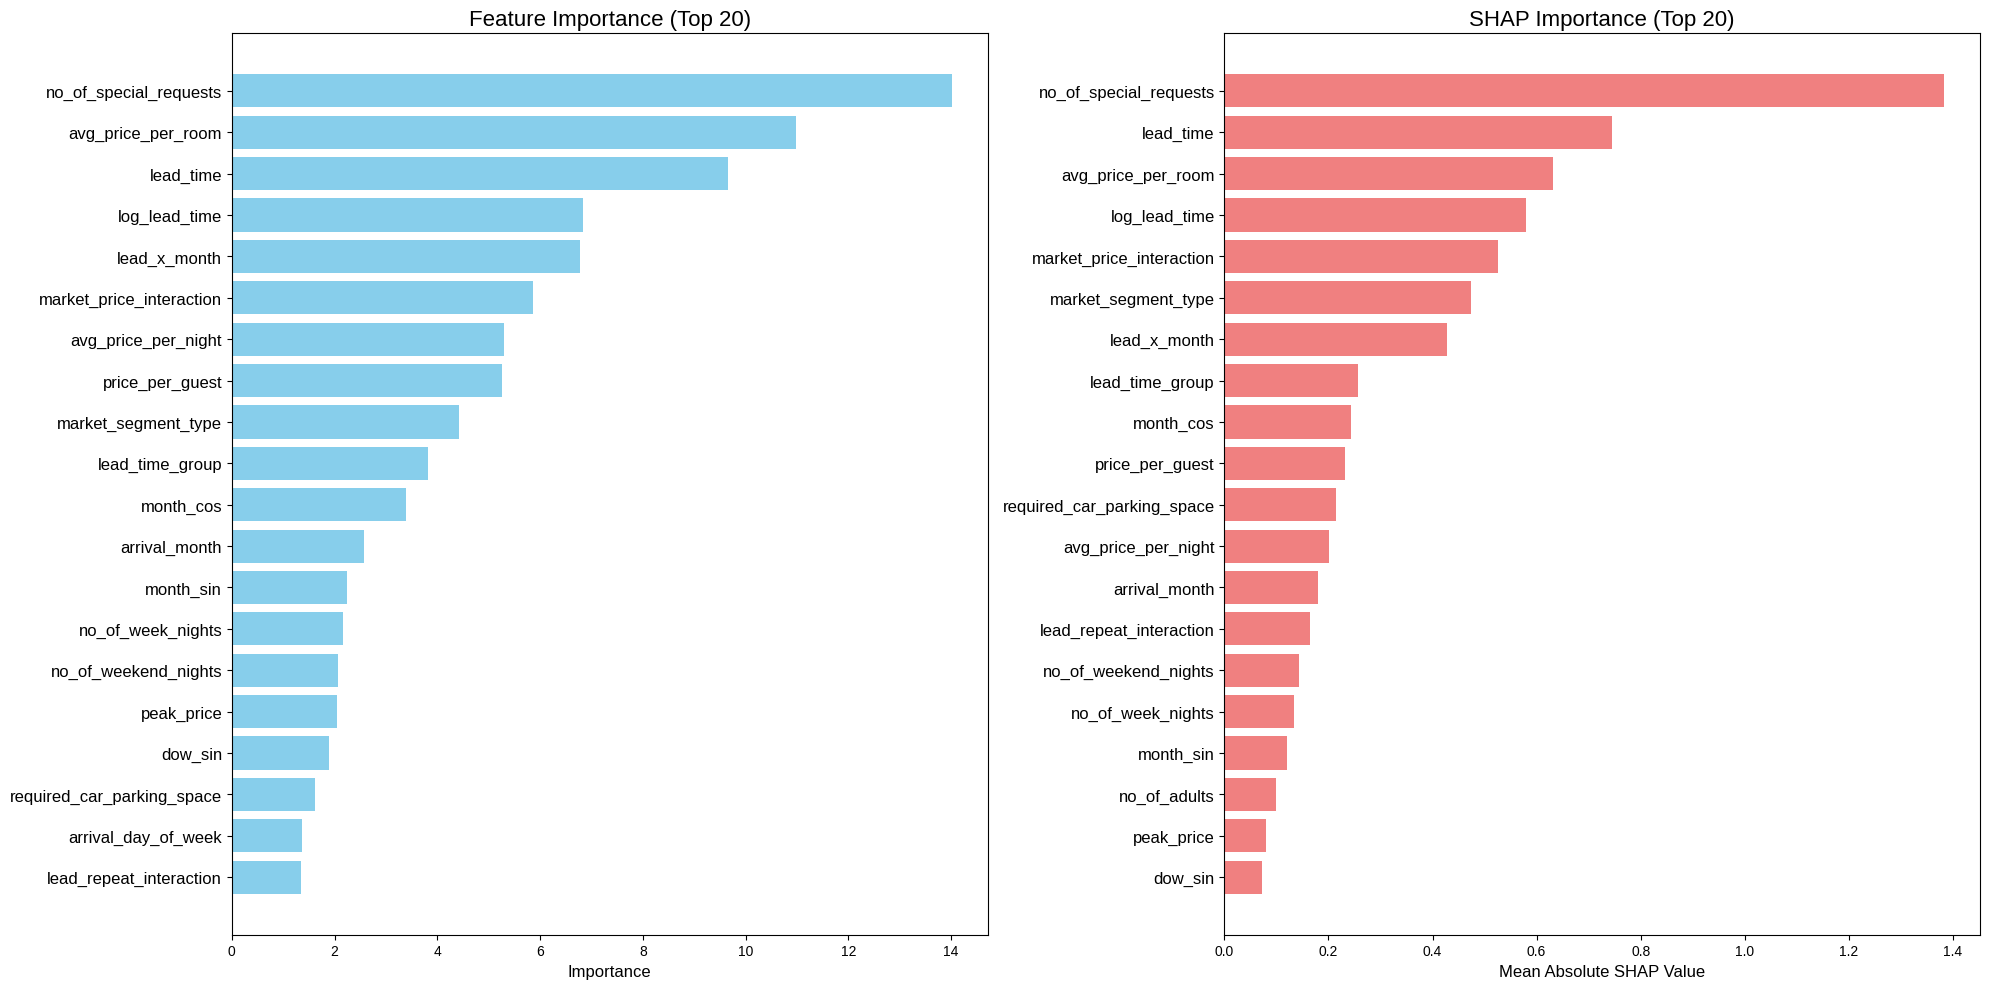

In [ ]:
fi_ts = pd.DataFrame({
    'feature': X_train_ts.columns,
    'importance': final_model_ts.get_feature_importance()
}).sort_values('importance', ascending=False)

train_pool_ts = Pool(X_train_ts, y_train_ts, cat_features=cat_cols)
shap_values_ts = final_model_ts.get_feature_importance(data=train_pool_ts, type="ShapValues")
shap_abs_mean_ts = np.abs(shap_values_ts[:, :-1]).mean(axis=0)
shap_df_ts = pd.DataFrame({
    'feature': X_train_ts.columns,
    'mean_abs_shap': shap_abs_mean_ts
}).sort_values('mean_abs_shap', ascending=False)

print("====== Feature Importance (Top 10) ======")
print(fi_ts.head(10))
print("\n====== SHAP Importance (Top 10) ======")
print(shap_df_ts.head(10))

fig, axes = plt.subplots(1, 2, figsize=(20, 10))
plt.style.use('seaborn-v0_8-whitegrid')

fi_top20 = fi_ts.head(20)
axes[0].barh(fi_top20.feature[::-1], fi_top20.importance[::-1], color='skyblue')
axes[0].set_title('Feature Importance (Top 20)', fontsize=16)
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].tick_params(axis='y', labelsize=12)

shap_top20 = shap_df_ts.head(20)
axes[1].barh(shap_top20.feature[::-1], shap_top20.mean_abs_shap[::-1], color='lightcoral')
axes[1].set_title('SHAP Importance (Top 20)', fontsize=16)
axes[1].set_xlabel('Mean Absolute SHAP Value', fontsize=12)
axes[1].tick_params(axis='y', labelsize=12)

plt.tight_layout()
plt.show()

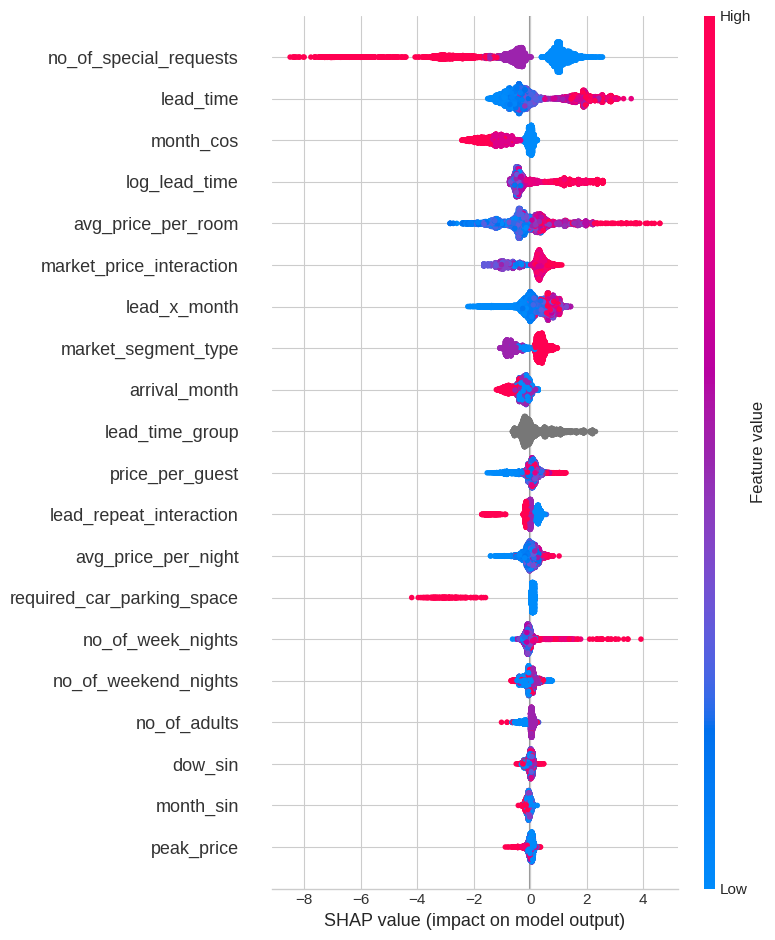

In [ ]:
import shap

explainer = shap.TreeExplainer(final_model_ts)

shap_values_for_plot = explainer.shap_values(X_test_ts)

shap.summary_plot(shap_values_for_plot, X_test_ts, plot_type="dot")

### recall 최소화 관점

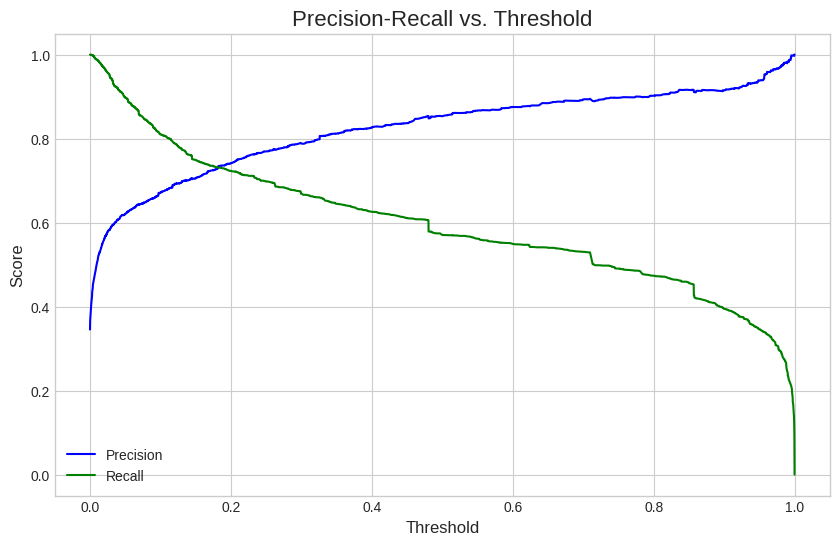

Precision이 90% 이상이 되는 임계값(Threshold): 0.7748


In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

precision, recall, thresholds = precision_recall_curve(y_test_ts, proba_ts)

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], label='Precision', color='blue')
plt.plot(thresholds, recall[:-1], label='Recall', color='green')
plt.xlabel('Threshold', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Precision-Recall vs. Threshold', fontsize=16)
plt.legend()
plt.grid(True)
plt.show()

target_precision = 0.90
threshold_idx = np.where(precision >= target_precision)[0][0]
optimal_threshold = thresholds[threshold_idx]

print(f"Precision이 {target_precision*100:.0f}% 이상이 되는 임계값(Threshold): {optimal_threshold:.4f}")

In [ ]:
pred_ts_original = (proba_ts >= 0.5).astype(int)

pred_ts_final = pred_ts_original.copy()

pred_ts_final[X_test_ts['no_of_special_requests'] > 0] = 0

print(f"규칙 적용 전 Precision: {precision_score(y_test_ts, pred_ts_original):.4f}")
print(f"규칙 적용 후 Precision: {precision_score(y_test_ts, pred_ts_final):.4f}")
print("\n규칙 적용 후 Confusion Matrix:")
print(confusion_matrix(y_test_ts, pred_ts_final))

In [ ]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    fbeta_score,
    roc_auc_score,
    accuracy_score,
    confusion_matrix
)

df_sorted = hotel.sort_values(by='arrival_date_full').reset_index(drop=True)
split_point = int(len(df_sorted) * 0.8)
train_df = df_sorted.iloc[:split_point]
test_df = df_sorted.iloc[split_point:]

X_train_ts = train_df.drop(columns=['booking_status', 'arrival_date_full'])
y_train_ts = (train_df['booking_status'] == 'Canceled').astype(int)
X_test_ts = test_df.drop(columns=['booking_status', 'arrival_date_full'])
y_test_ts = (test_df['booking_status'] == 'Canceled').astype(int)

cat_cols = [col for col in X_train_ts.columns if X_train_ts[col].dtype in ['category', 'object']]

best_params_ts = {
    'iterations': 1705, 'depth': 7, 'learning_rate': 0.06416355921613807,
    'l2_leaf_reg': 8.904971618655438, 'random_strength': 0.995074860691567,
    'bagging_temperature': 0.45831123561286374, 'objective': 'Logloss',
    'eval_metric': 'AUC', 'random_seed': 42, 'verbose': 0
}

final_model_ts = CatBoostClassifier(**best_params_ts)
final_model_ts.fit(X_train_ts, y_train_ts, cat_features=cat_cols)

proba_ts = final_model_ts.predict_proba(X_test_ts)[:, 1]

new_threshold = 0.7748
pred_after_threshold = (proba_ts >= new_threshold).astype(int)

pred_final = pred_after_threshold.copy()
pred_final[X_test_ts['no_of_special_requests'] > 0] = 0

print("====== 1. 기본 임계값(0.5) 적용시 성능 ======")
pred_original = (proba_ts >= 0.5).astype(int)
print(f"Precision: {precision_score(y_test_ts, pred_original):.4f}, Recall: {recall_score(y_test_ts, pred_original):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_ts, pred_original))

print("\n====== 2. 임계값 상향(0.7748) 적용시 성능 ======")
print(f"Precision: {precision_score(y_test_ts, pred_after_threshold):.4f}, Recall: {recall_score(y_test_ts, pred_after_threshold):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test_ts, pred_after_threshold))

print("\n====== 3. 최종 전략 (임계값+후처리) 적용시 성능 ======")
final_precision = precision_score(y_test_ts, pred_final)
final_recall = recall_score(y_test_ts, pred_final)
final_fbeta = fbeta_score(y_test_ts, pred_final, beta=0.5)
final_accuracy = accuracy_score(y_test_ts, pred_final)

print(f"Final Precision    : {final_precision:.4f}")
print(f"Final Recall       : {final_recall:.4f}")
print(f"Final F-beta (0.5) : {final_fbeta:.4f}")
print(f"Final Accuracy     : {final_accuracy:.4f}")
print("\nFinal Confusion Matrix:")
print(confusion_matrix(y_test_ts, pred_final))

====== 1. 기본 임계값(0.5) 적용시 성능 ======
Precision: 0.8537, Recall: 0.5709
Confusion Matrix:
 [[4498  245]
 [1075 1430]]

====== 2. 임계값 상향(0.7748) 적용시 성능 ======
Precision: 0.9001, Recall: 0.4858
Confusion Matrix:
 [[4608  135]
 [1288 1217]]

====== 3. 최종 전략 (임계값+후처리) 적용시 성능 ======
Final Precision    : 0.8980
Final Recall       : 0.3513
Final F-beta (0.5) : 0.6848
Final Accuracy     : 0.7620

Final Confusion Matrix:
[[4643  100]
 [1625  880]]
